## HOUSE PRICE PREDICTION DATA SCIENCE PROJECT
This project aims for a powerful house price prediction technique for the houses in Ames Housing Dataset. This notebook is prepared in R

#### 1.Load Required Libraries

In [66]:
set.seed(2222)
library(caret)
library("MASS")
library(class)
library(e1071)
library(mlbench)
library(foreach)
library(mlr)
library(randomForest)
library(Matrix)
library(ggplot2)
library(pastecs)
library(xgboost)
library(reshape2)
library(mice)
remotes::install_github("cran/multcompView")
library(Boruta)
library(gridExtra)
library(xgboost)
library(plyr)
library(grid)
library(GGally)
library(VIM)
library("lattice")
library(missForest)
setwd("C:/Users/Engin/Documents")

Skipping install of 'multcompView' from a github remote, the SHA1 (5f745cfe) has not changed since last install.
  Use `force = TRUE` to force installation


#### 2.Load Data

In [38]:
Train<-read.csv("train_house.csv",header=TRUE,sep=",")
Test<-read.csv("test_House.csv",header=TRUE,sep=",")
str(Train)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..:

The training data includes 81 different features of 1460 houses. The features consist of numerical, categorical and factor variables. Our target will be to predict sale price (SalePrice feature)
#### 2.Numerical Features Explanotary Analysis and Imputation
Below a table containing summary statistics of all numerical features. There are some missing observations. We will impute them by not changing the distribution of each feature

In [42]:
Train_cont<-Train[lapply(Train,class) != "factor"]
Test_cont<-Test[lapply(Test,class) != "factor"]
options(scipen=100)
  options(digits=2)
  Stat_desc<-stat.desc(Train_cont)
  Stat_desc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
nbr.val,1460.00,1460.00,1201.00,1460.00,1460.000,1460.000,1460.000,1460.00,1452.0,1460,...,1460.0,1460.0,1460.0,1460.00,1460.0,1460.0,1460,1460.000,1460.00000,1460.00
nbr.null,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.00,861.0,467,...,761.0,656.0,1252.0,1436.00,1344.0,1453.0,1408,0.000,0.00000,0.00
nbr.na,0.00,0.00,259.00,0.00,0.000,0.000,0.000,0.00,8.0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0,0.000,0.00000,0.00
min,1.00,20.00,21.00,1300.00,1.000,1.000,1872.000,1950.00,0.0,0,...,0.0,0.0,0.0,0.00,0.0,0.0,0,1.000,2006.00000,34900.00
max,1460.00,190.00,313.00,215245.00,10.000,9.000,2010.000,2010.00,1600.0,5644,...,857.0,547.0,552.0,508.00,480.0,738.0,15500,12.000,2010.00000,755000.00
range,1459.00,170.00,292.00,213945.00,9.000,8.000,138.000,60.00,1600.0,5644,...,857.0,547.0,552.0,508.00,480.0,738.0,15500,11.000,4.00000,720100.00
sum,1066530.00,83070.00,84130.00,15354569.00,8905.000,8140.000,2878051.000,2897904.00,150551.0,647714,...,137597.0,68124.0,32053.0,4978.00,21989.0,4028.0,63494,9230.000,2931411.00000,264144946.00
median,730.50,50.00,69.00,9478.50,6.000,5.000,1973.000,1994.00,0.0,384,...,0.0,25.0,0.0,0.00,0.0,0.0,0,6.000,2008.00000,163000.00
mean,730.50,56.90,70.05,10516.83,6.099,5.575,1971.268,1984.87,103.7,444,...,94.2,46.7,22.0,3.41,15.1,2.8,43,6.322,2007.81575,180921.20
SE.mean,11.03,1.11,0.70,261.22,0.036,0.029,0.790,0.54,4.8,12,...,3.3,1.7,1.6,0.77,1.5,1.1,13,0.071,0.03476,2079.11


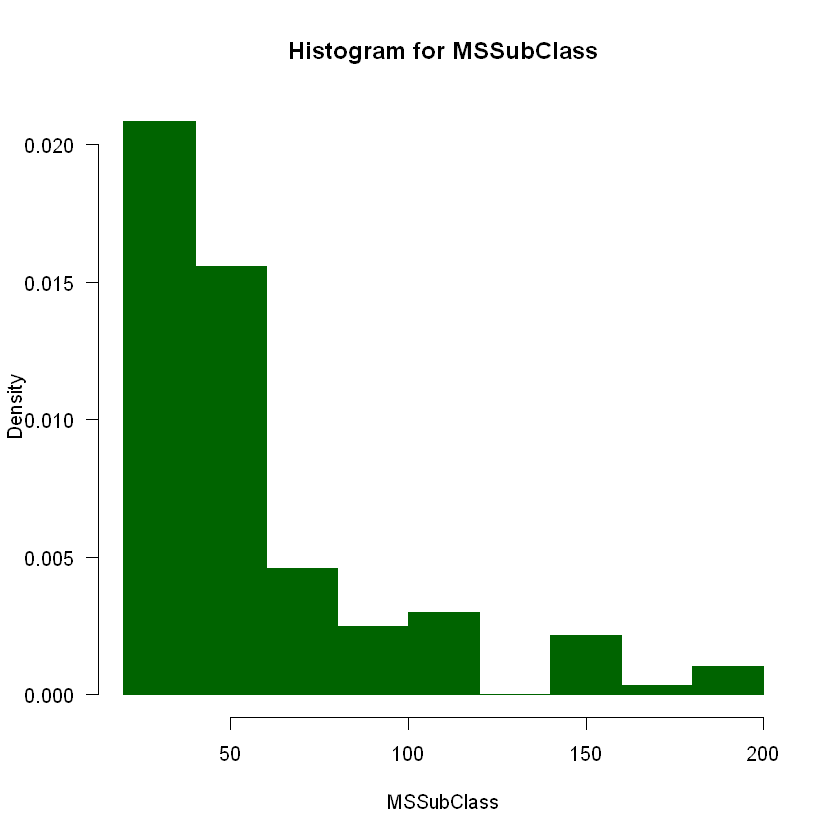

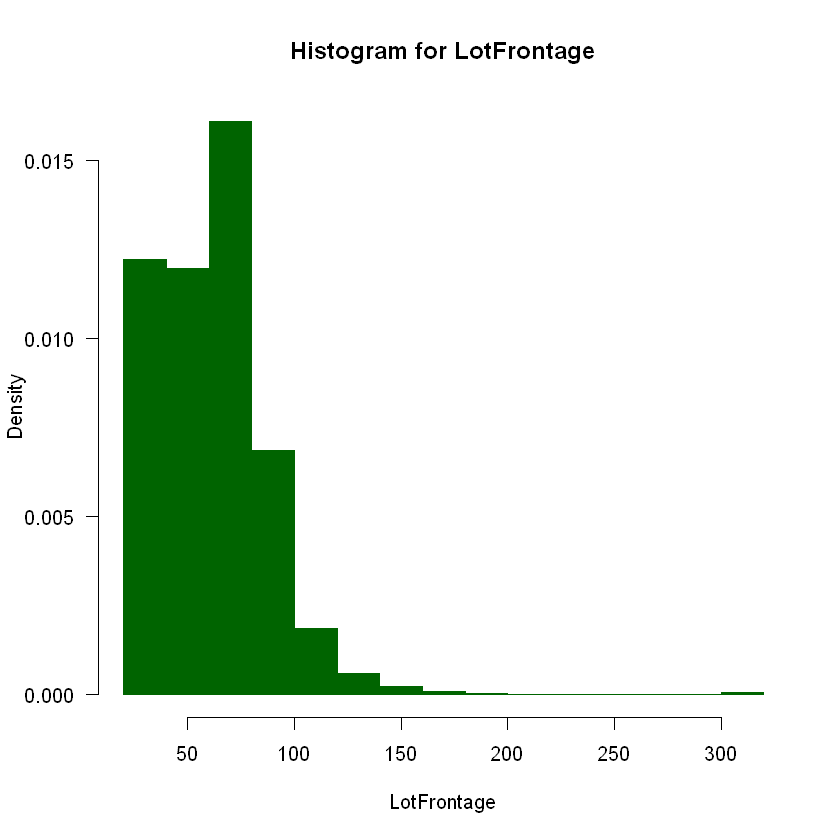

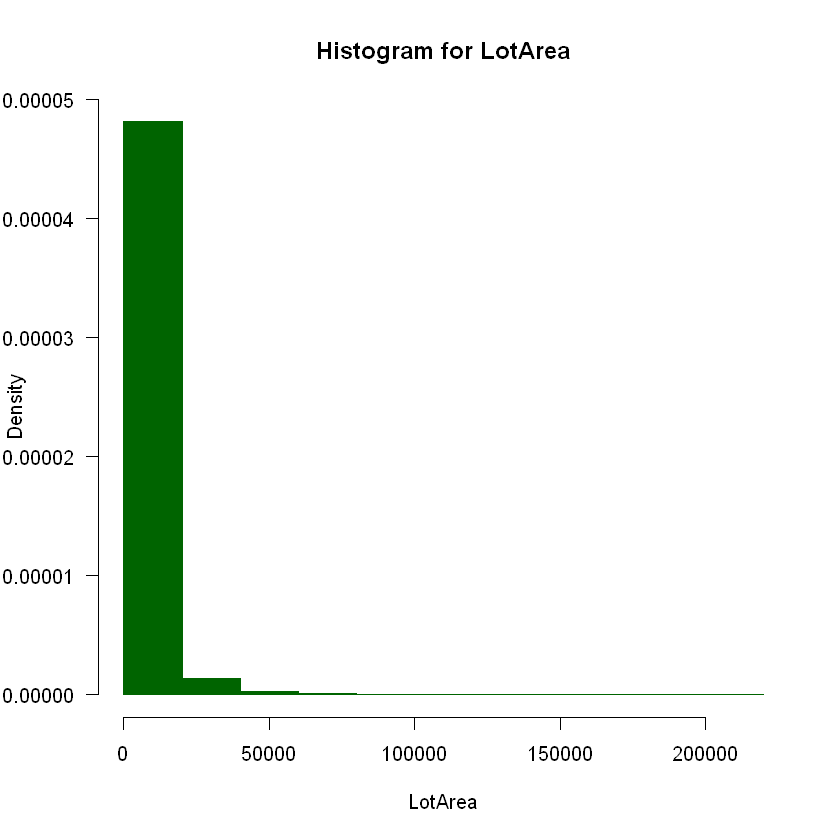

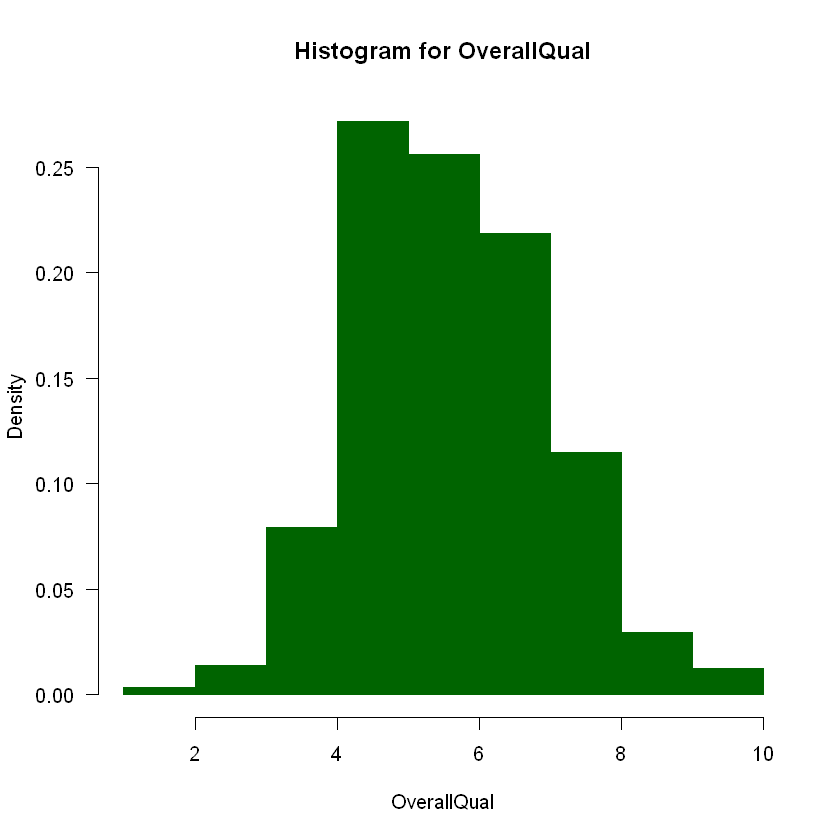

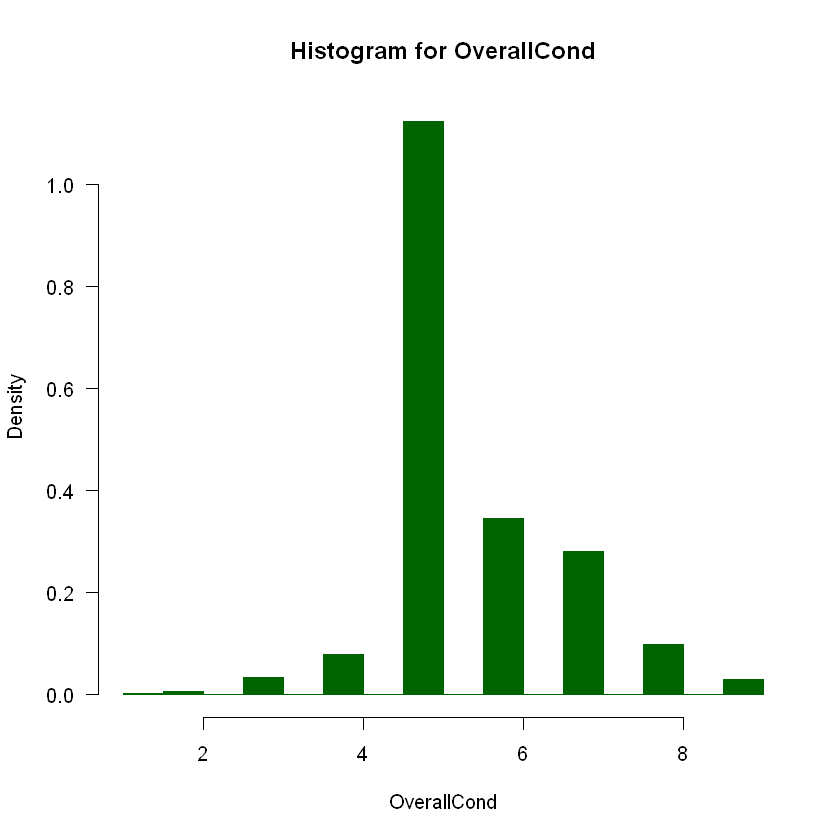

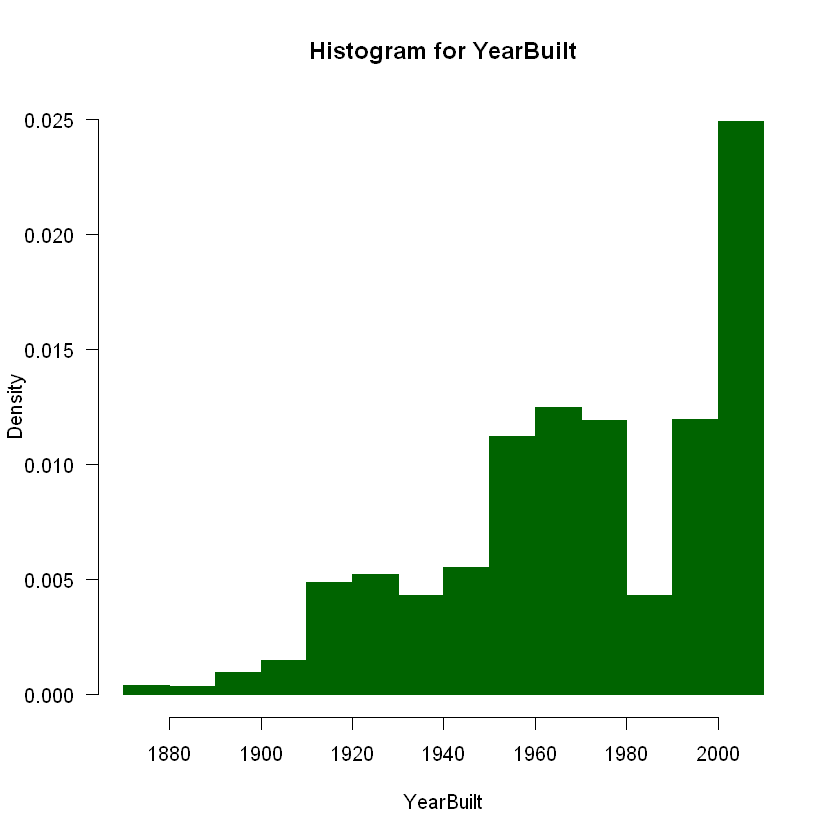

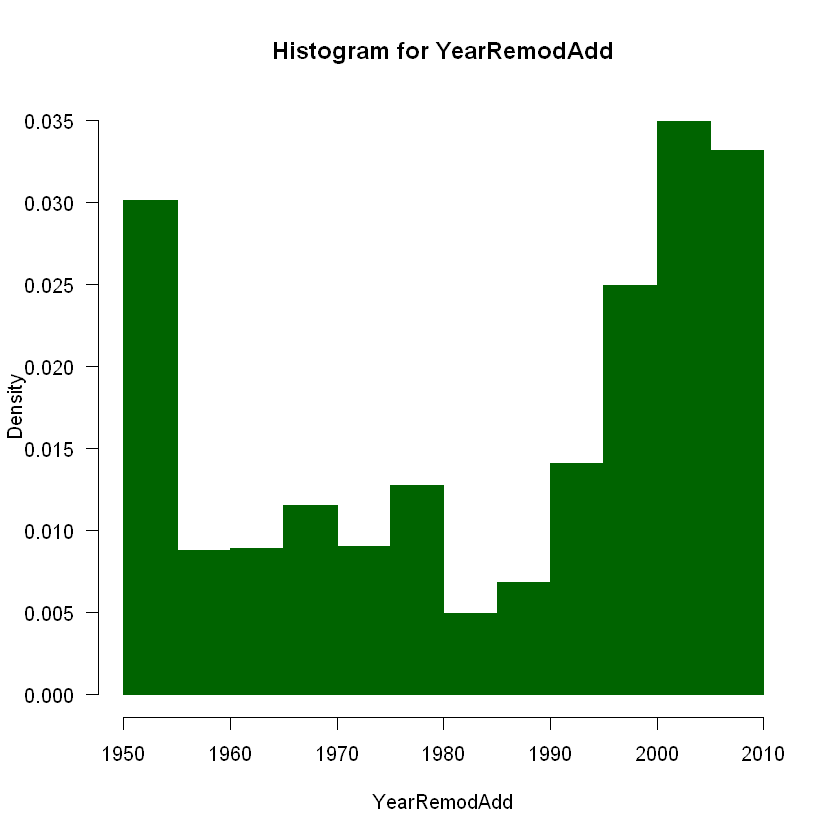

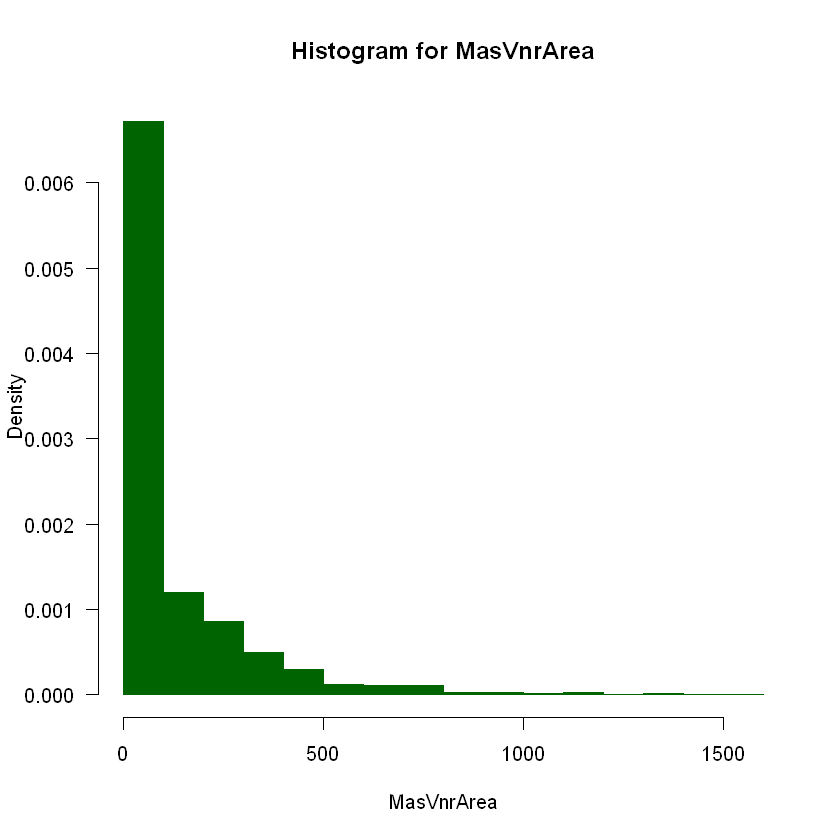

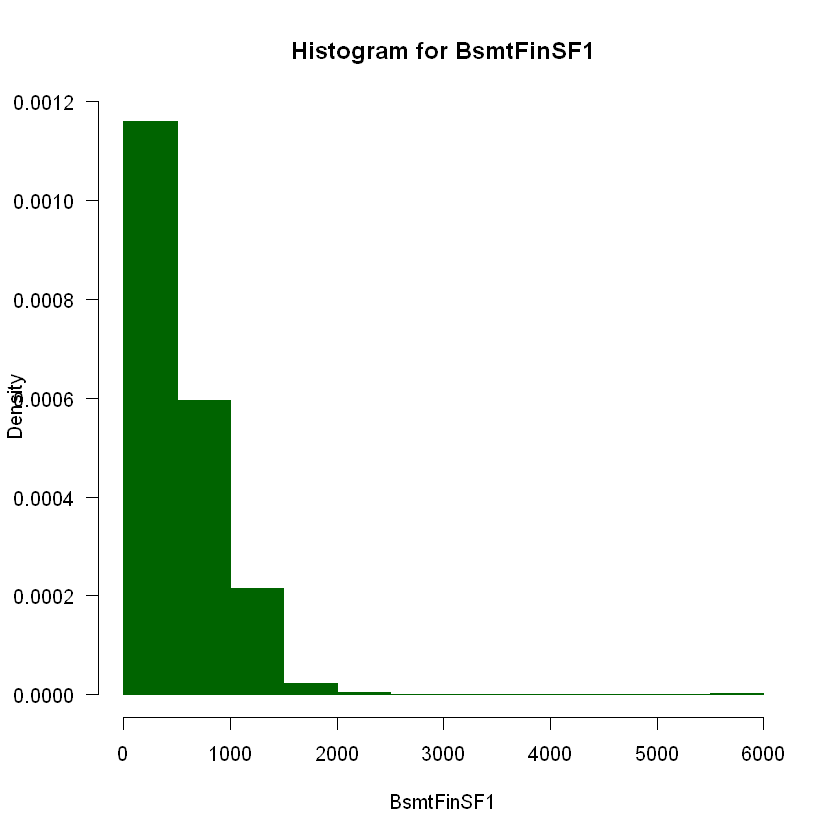

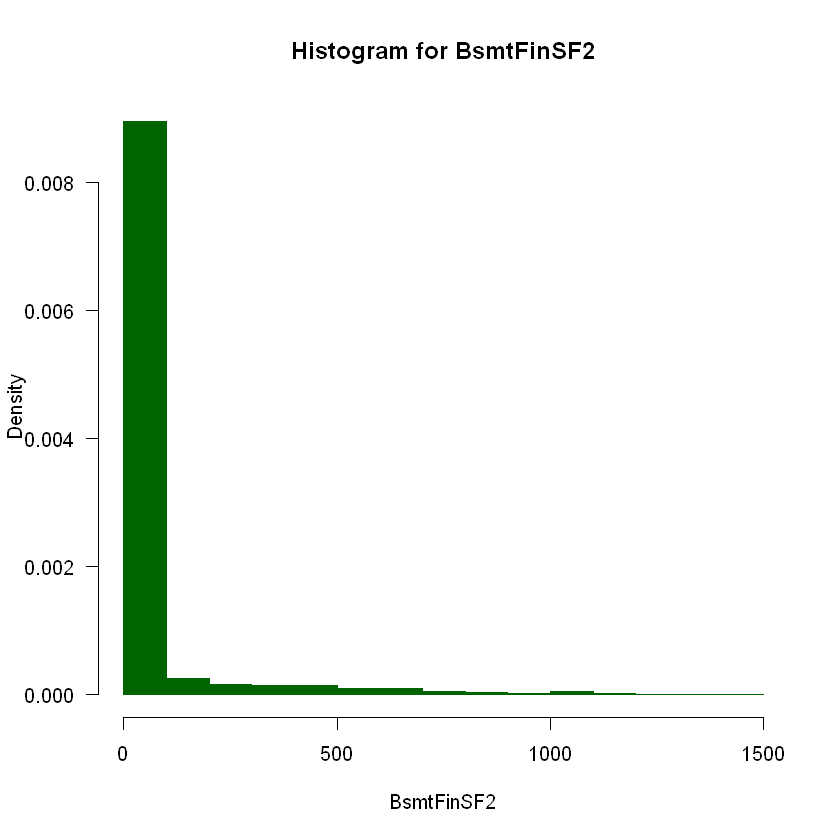

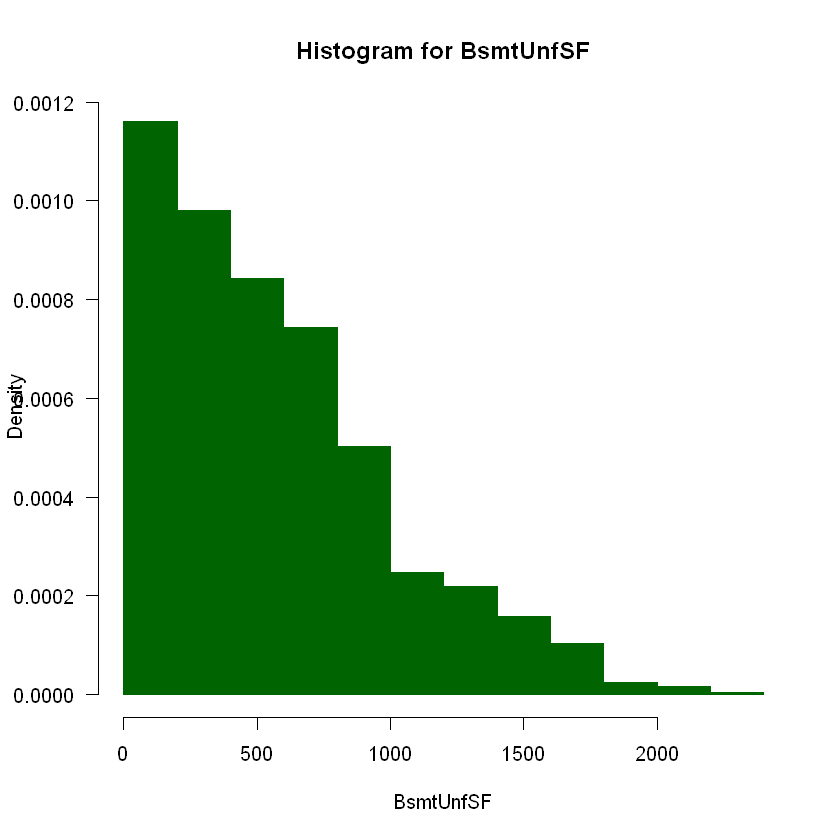

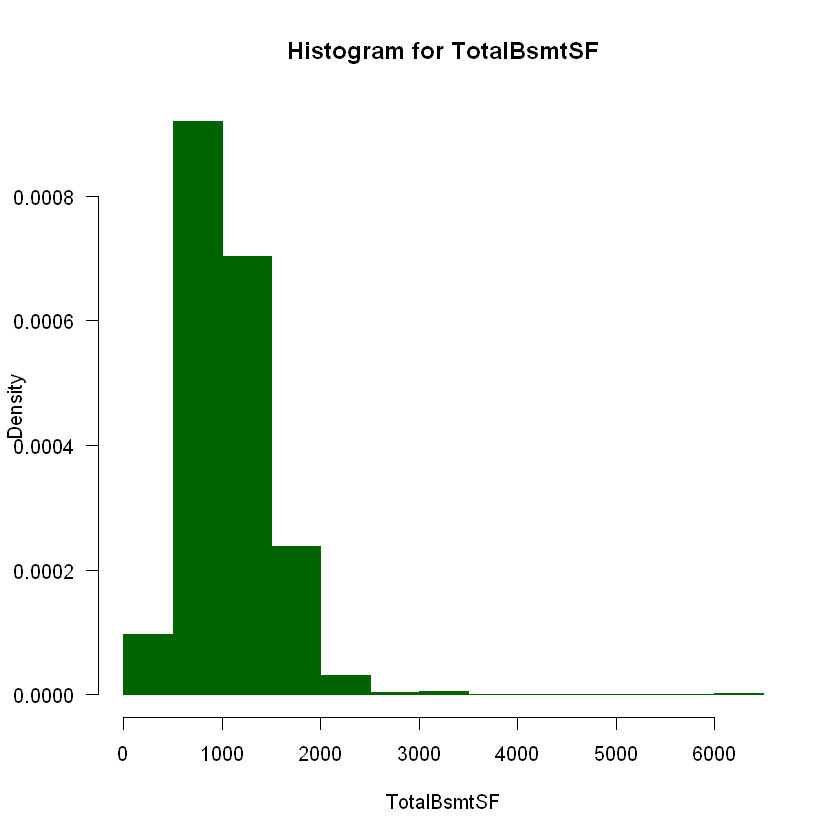

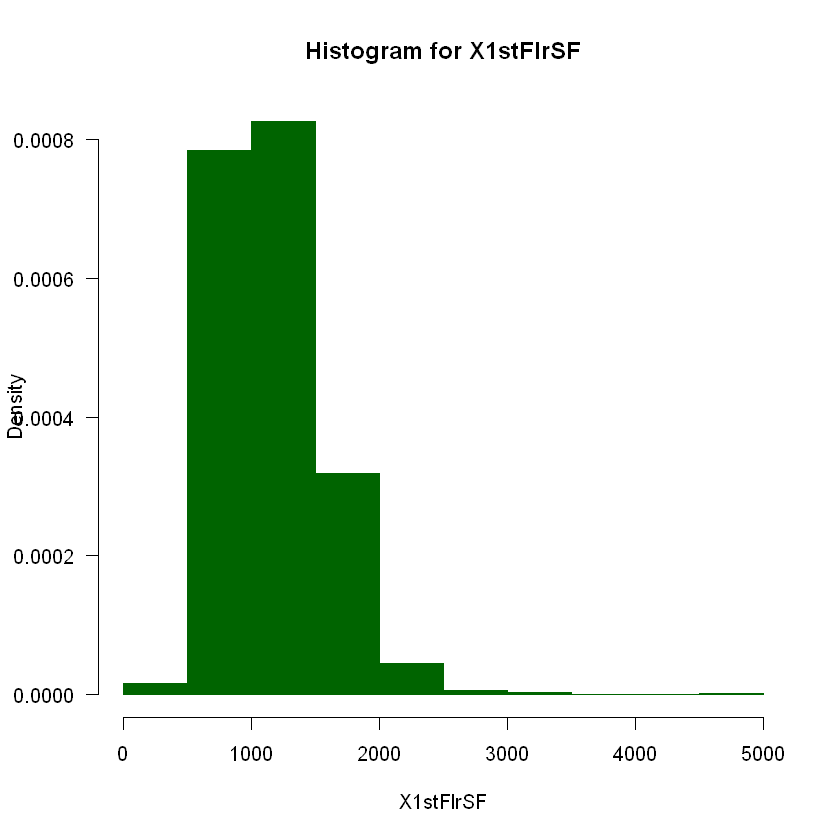

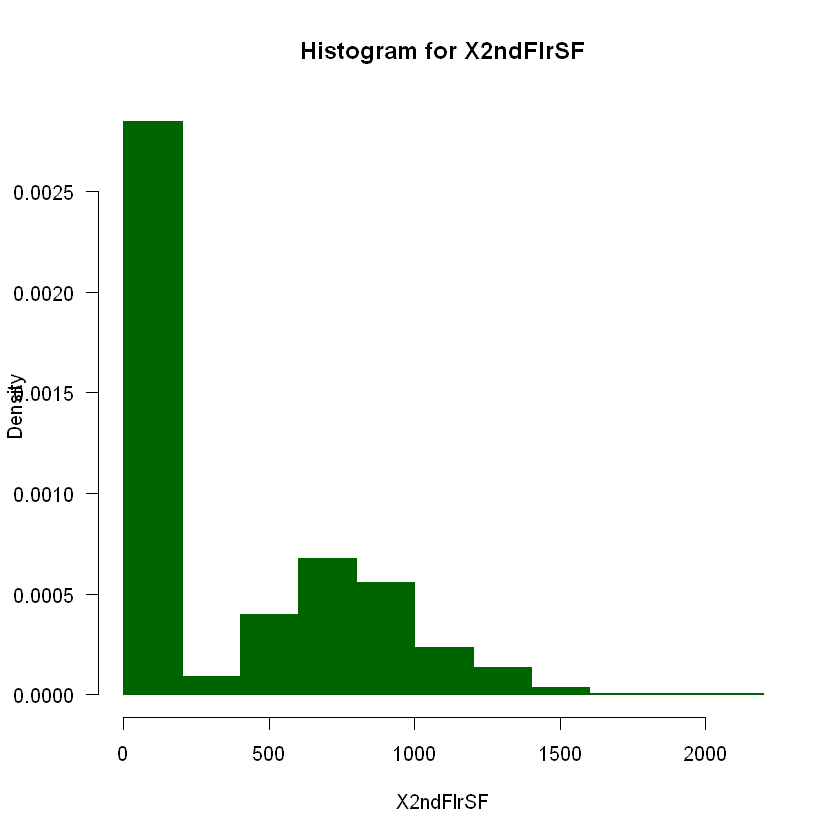

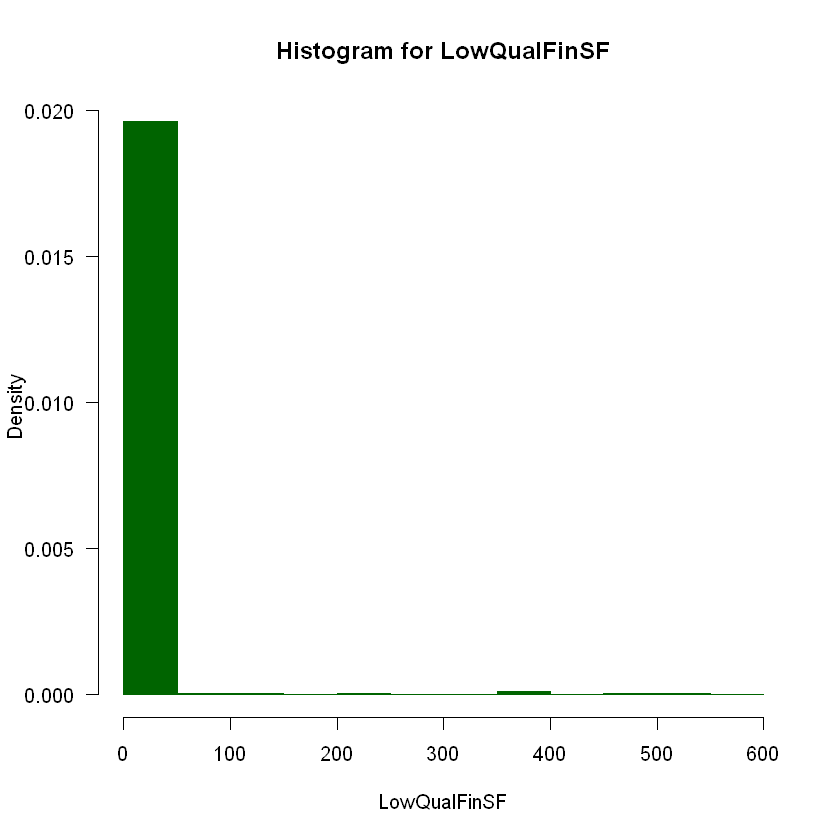

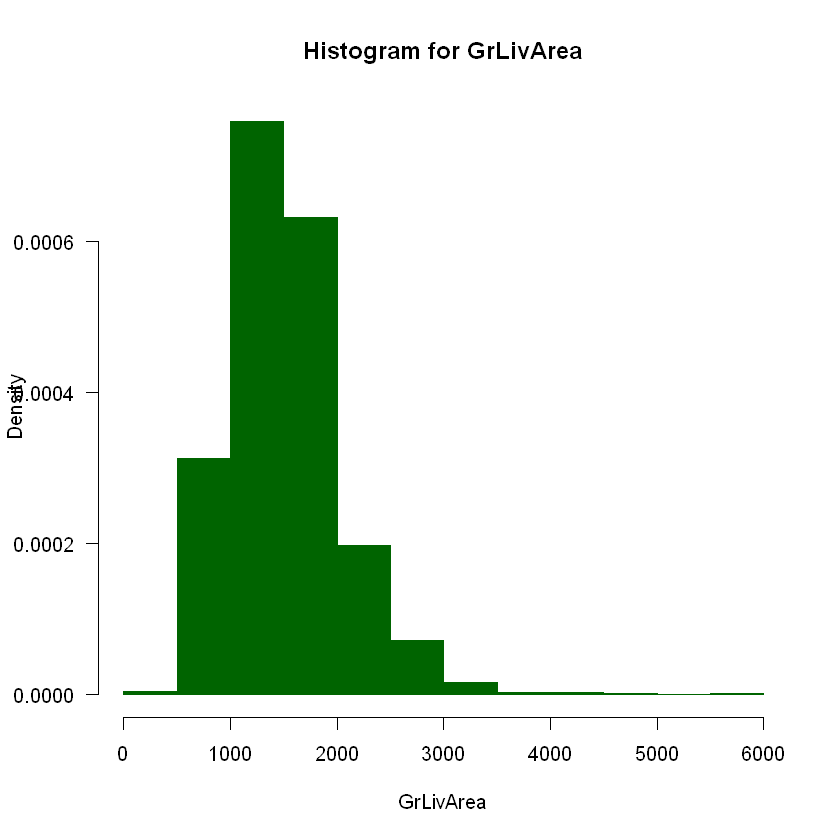

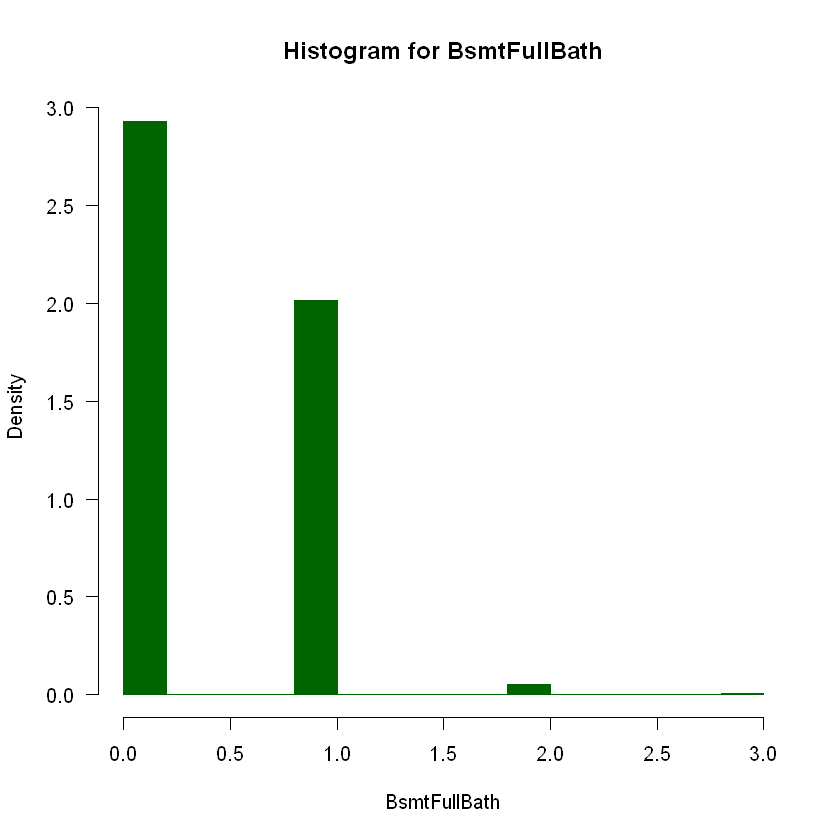

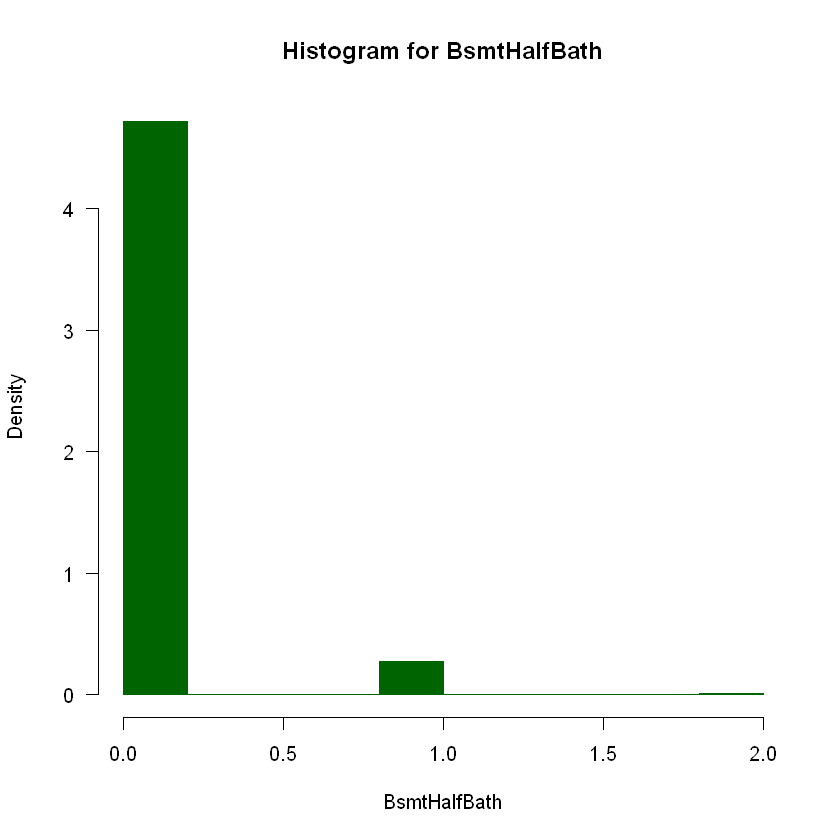

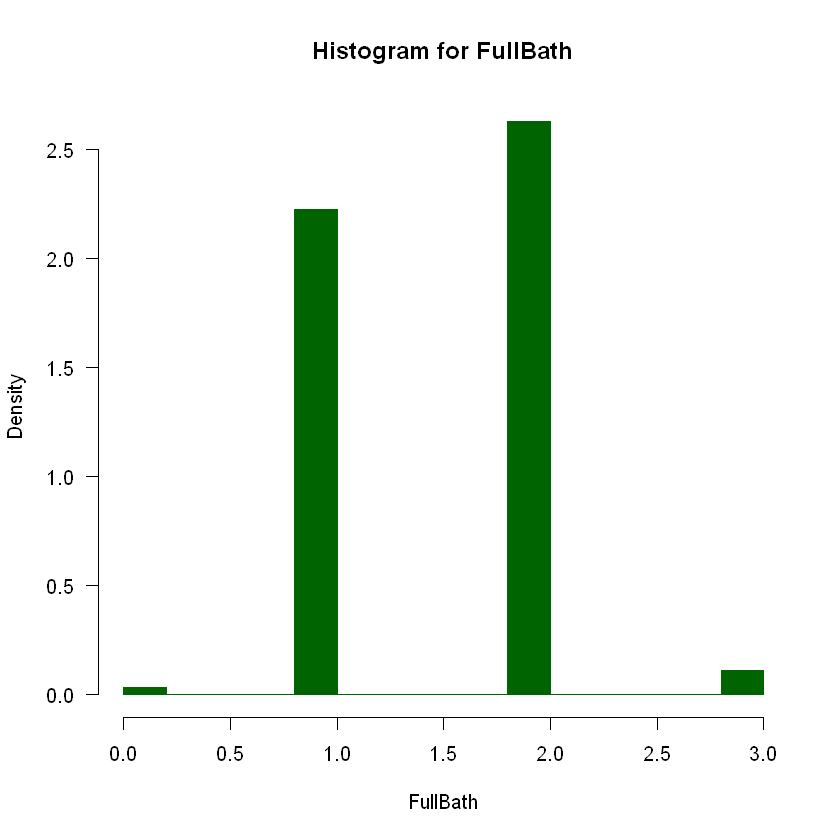

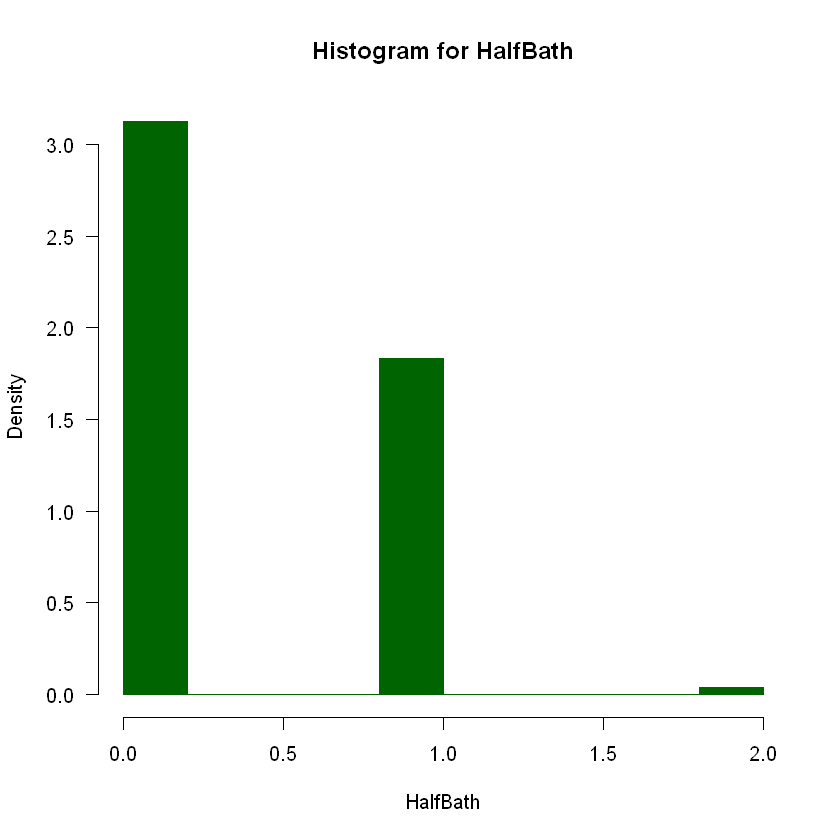

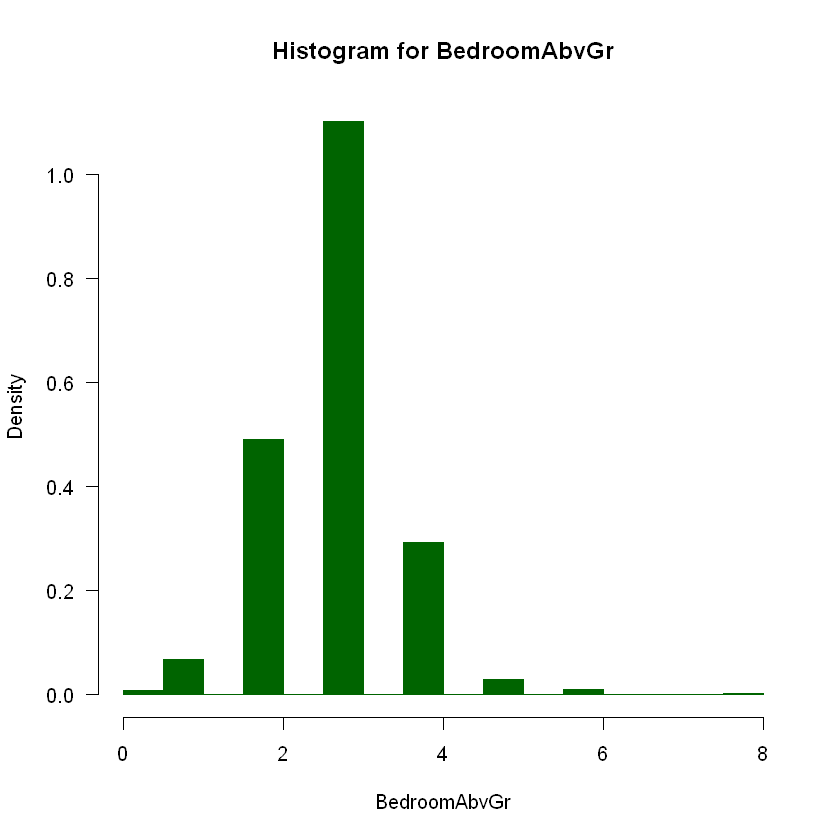

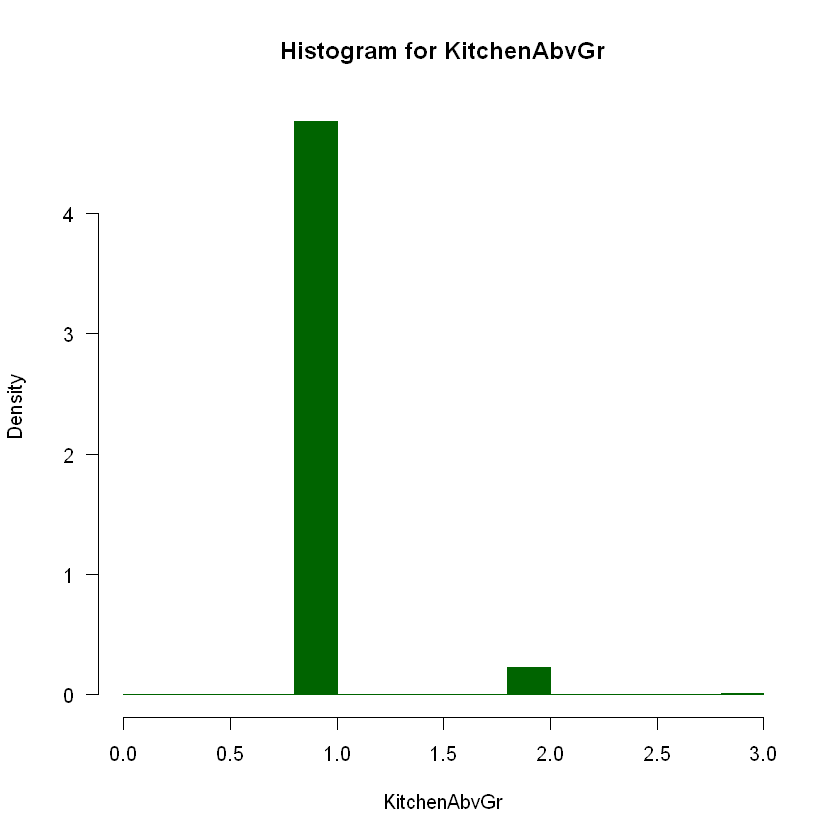

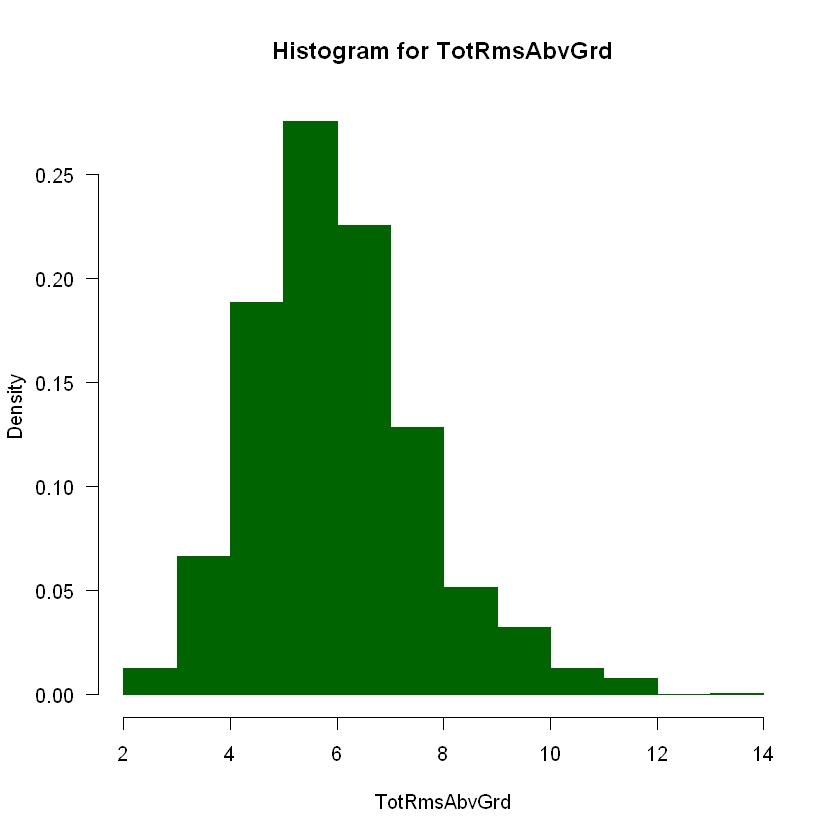

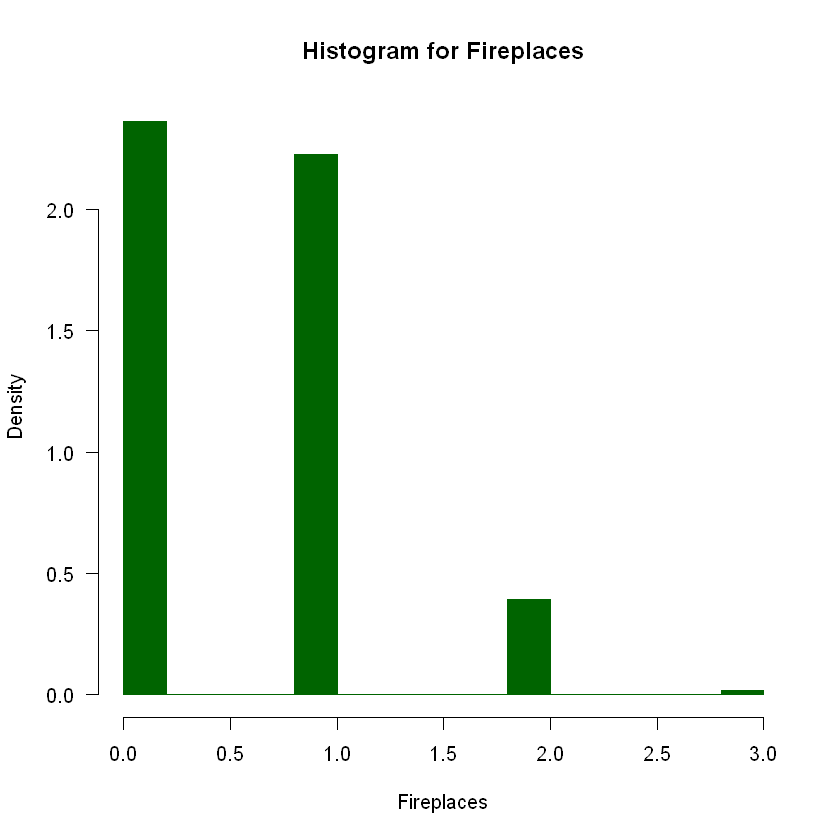

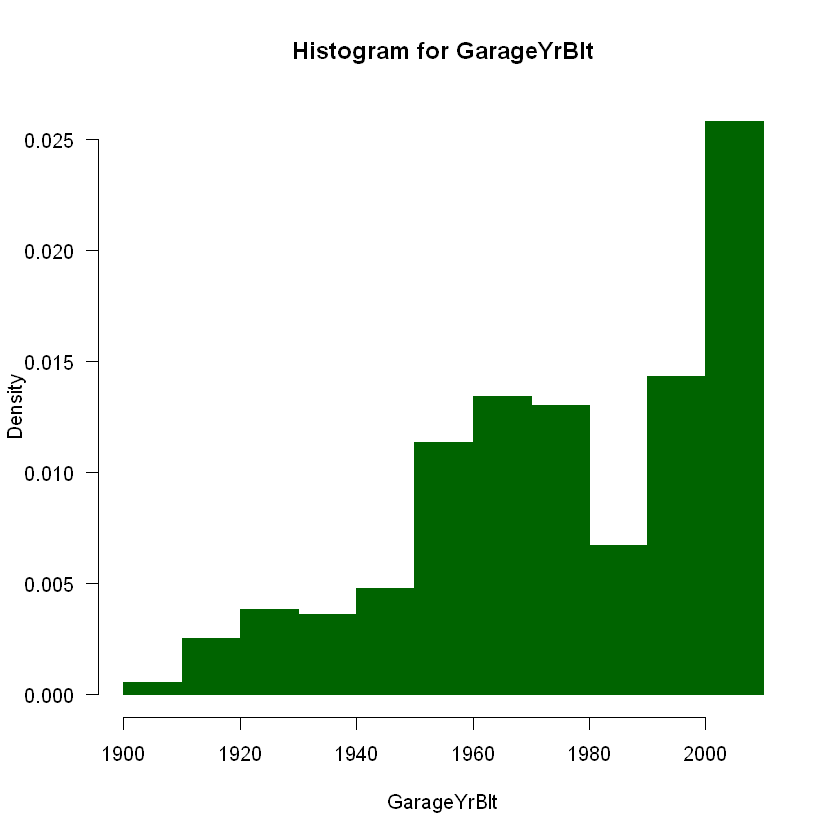

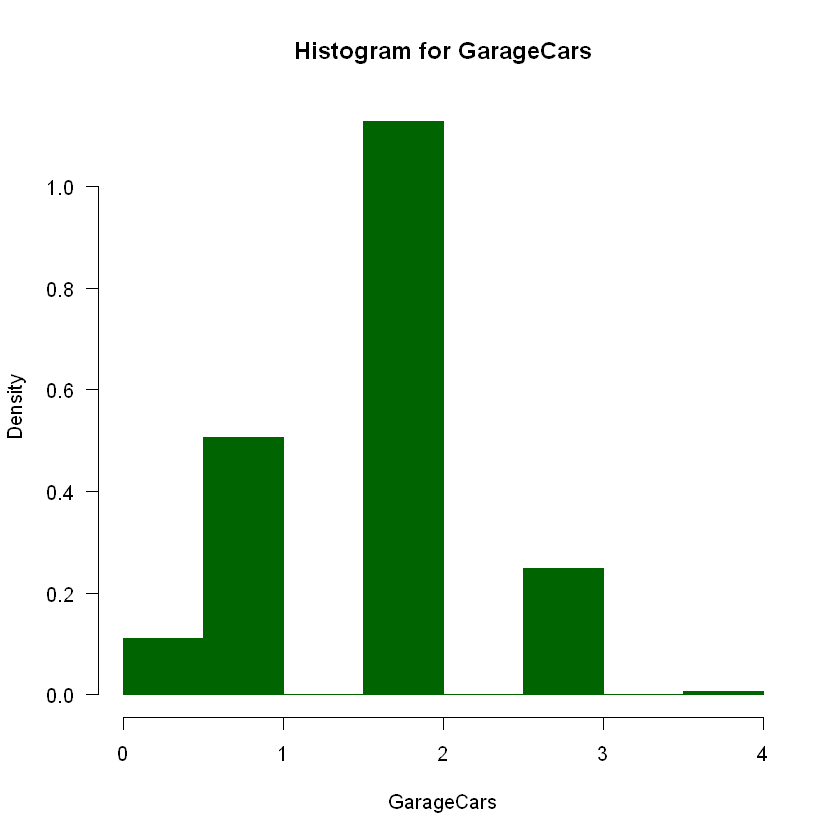

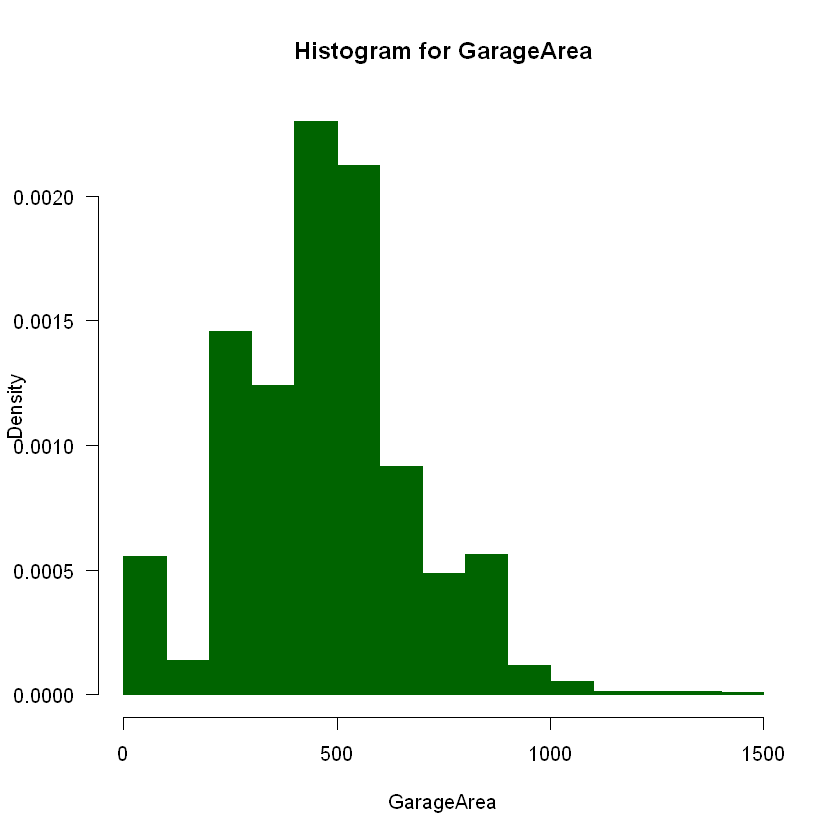

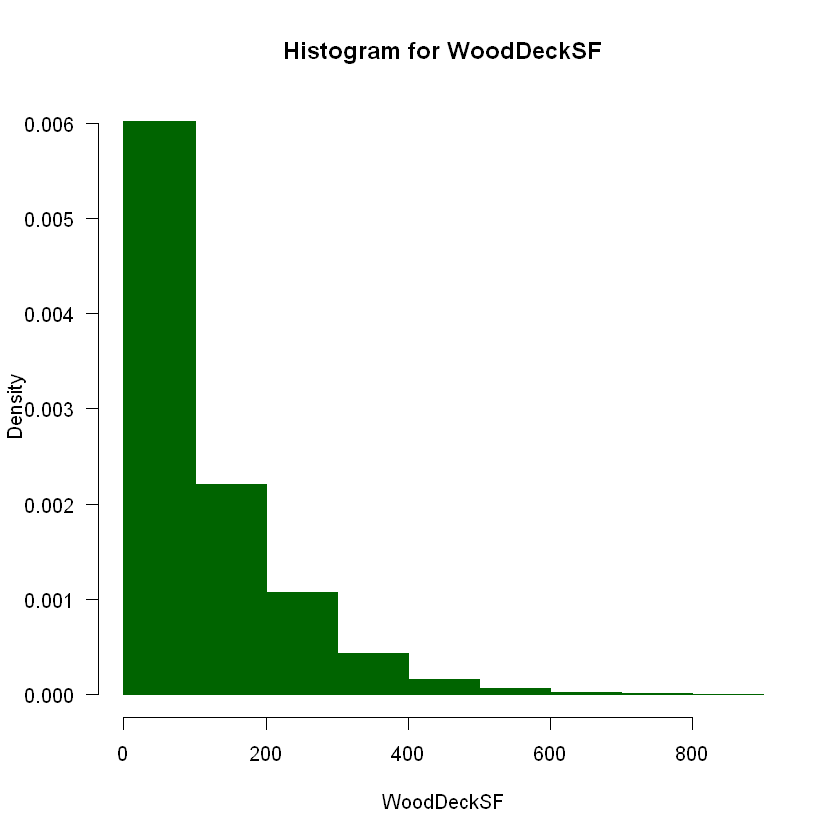

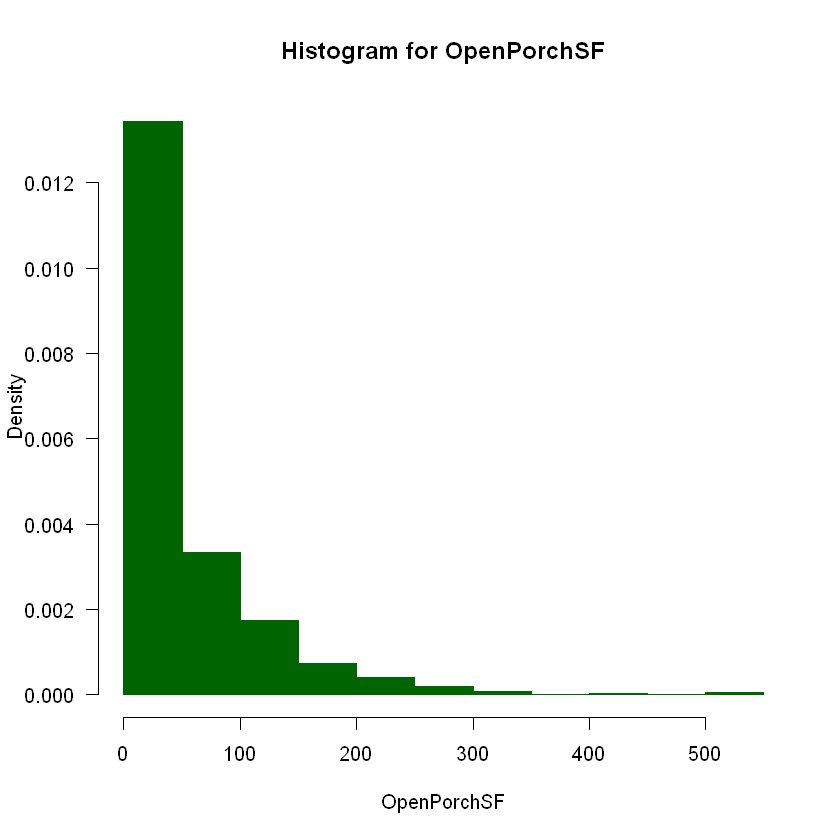

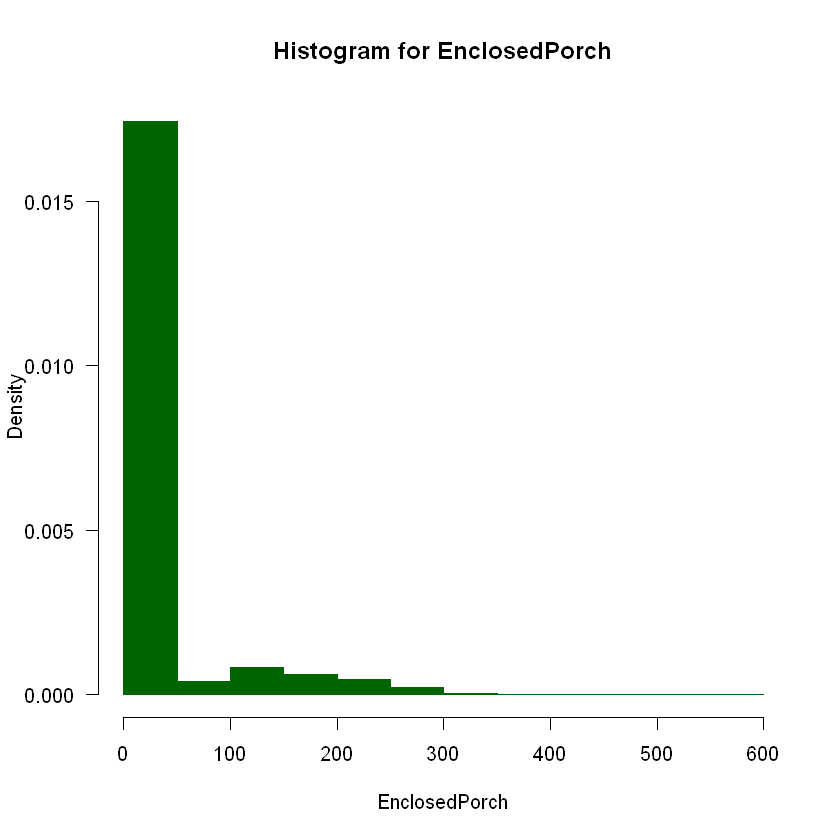

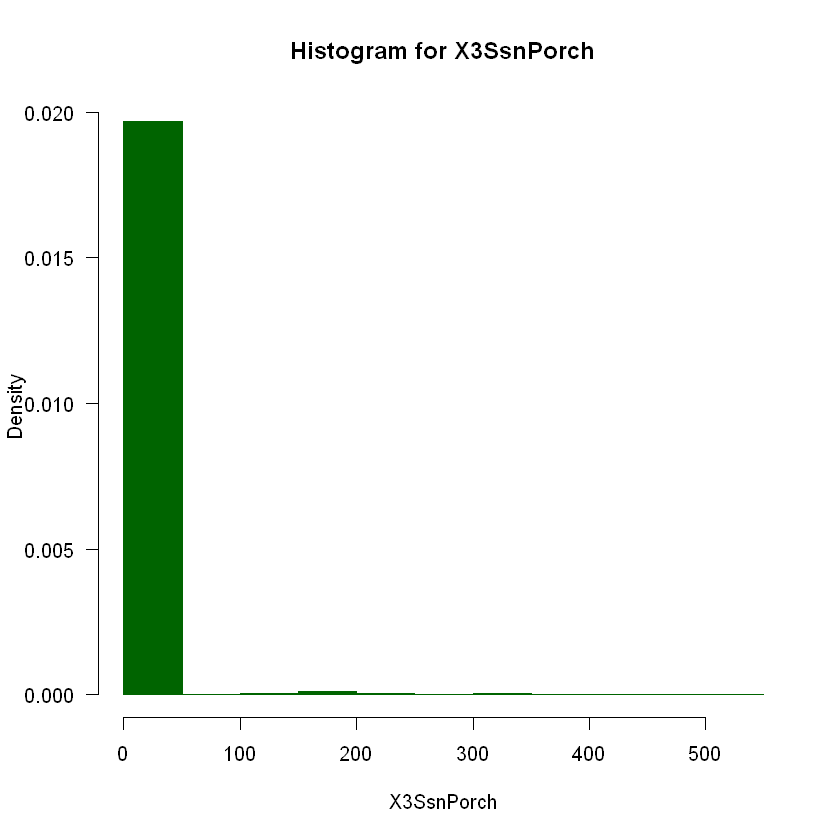

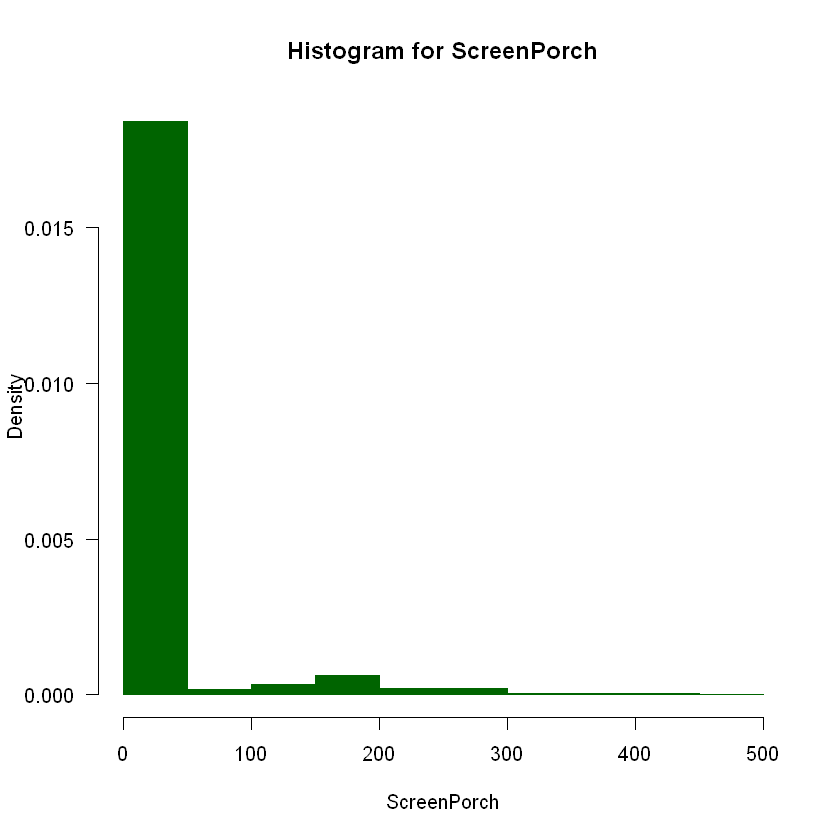

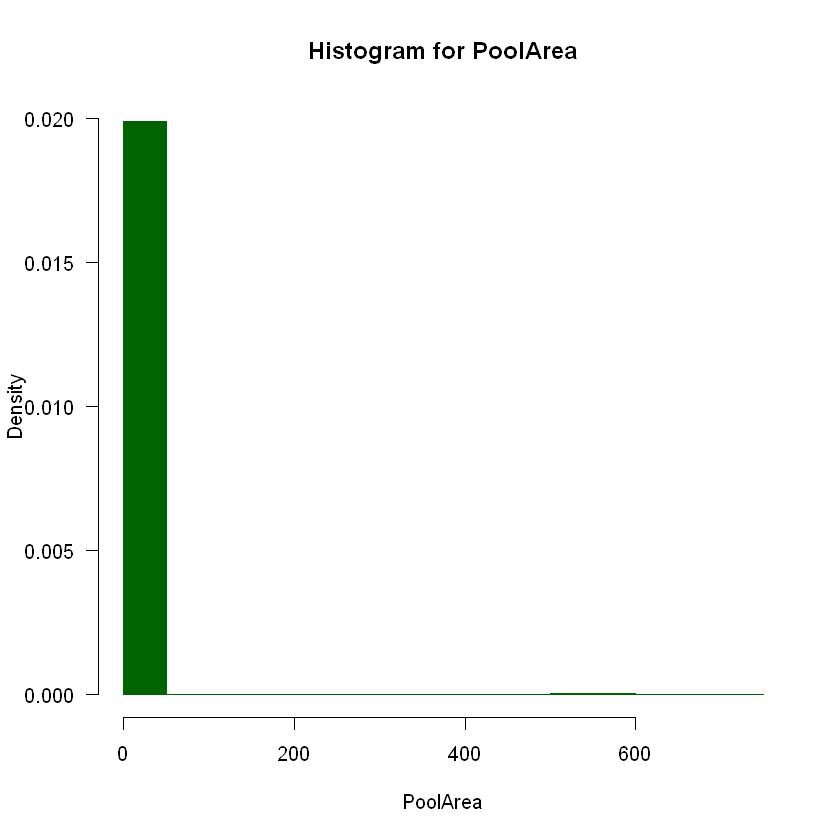

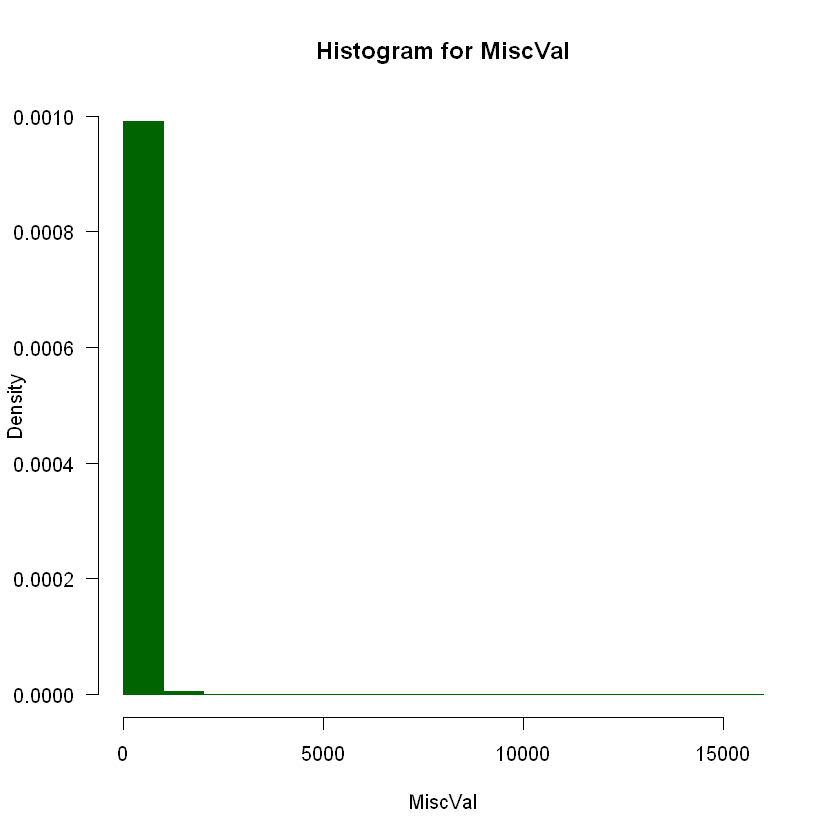

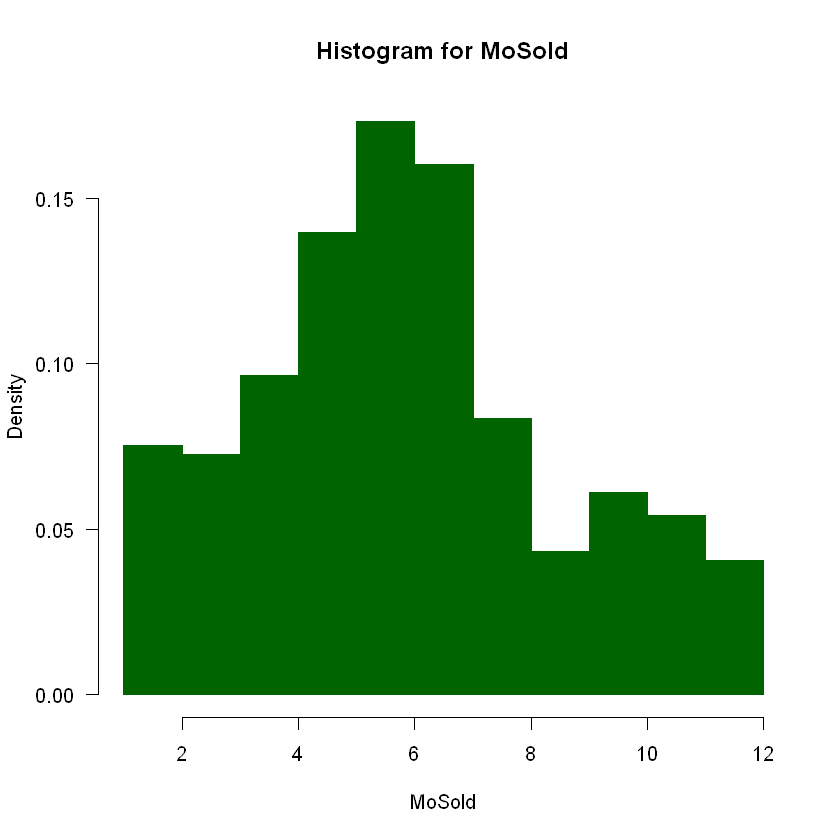

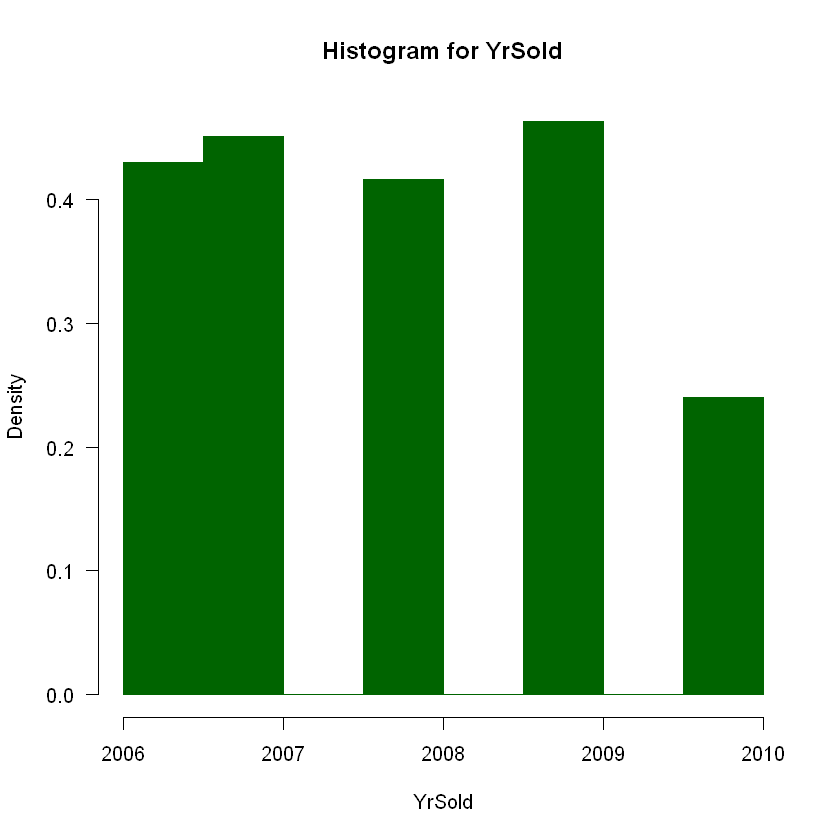

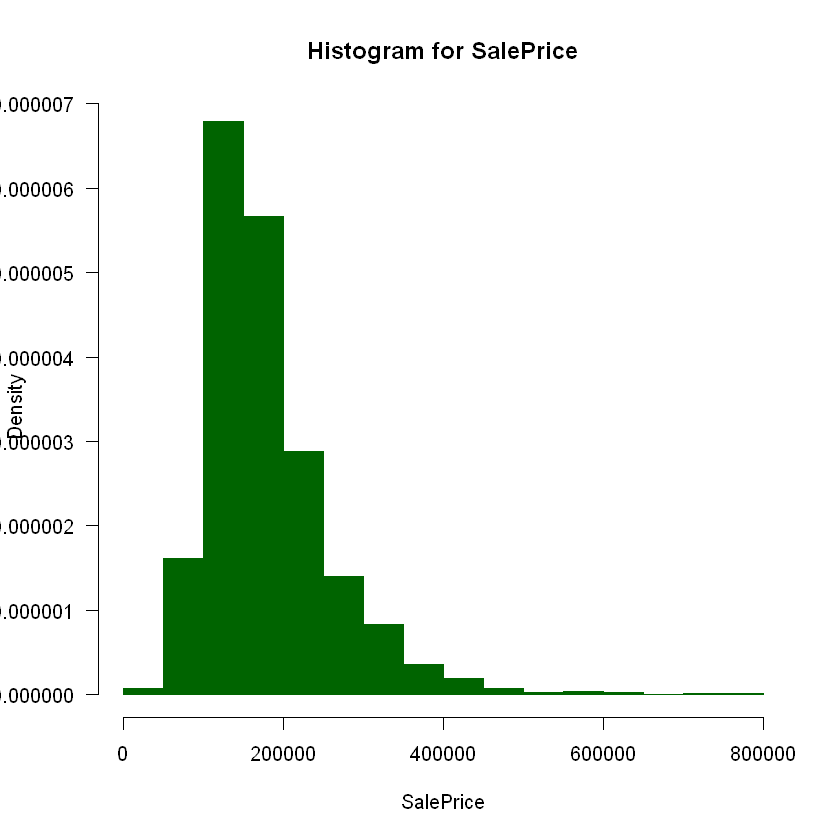


 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5

 iter imp variable
  1   1  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea
  1   2  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath*  GarageYrBlt  GarageCars  GarageArea
  1   3  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath*  BsmtHalfBath  GarageYrBlt  GarageCars*  GarageArea
  1   4  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath*  GarageYrBlt  GarageCars  GarageArea
  1   5  LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath*  GarageYrBlt  GarageCars  GarageArea
  2   1  LotFrontage  Mas

Warning message:
"Number of logged events: 314"

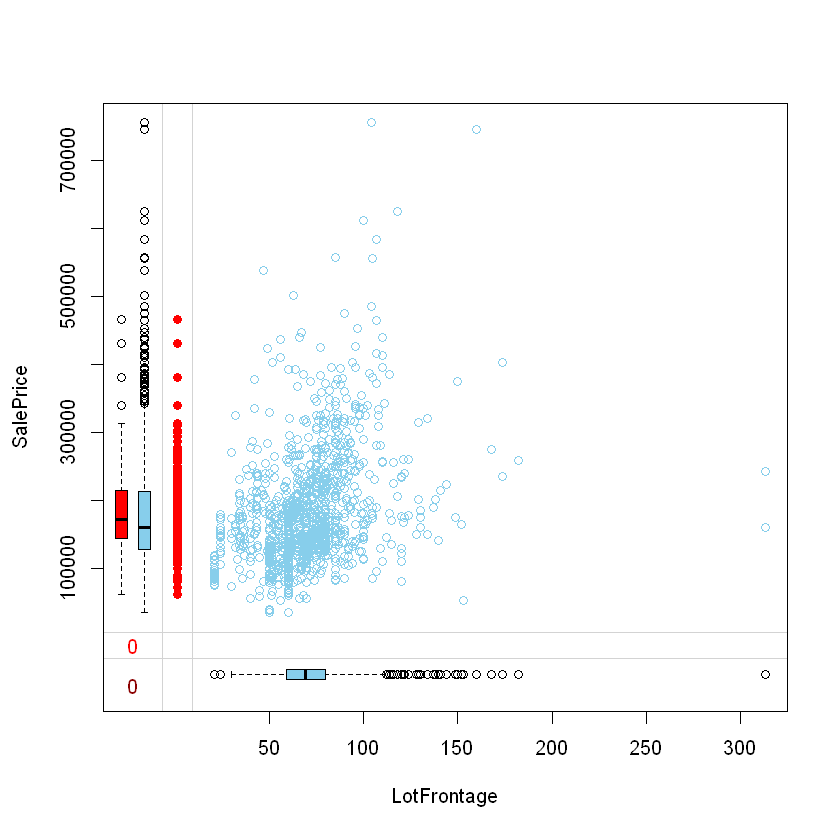

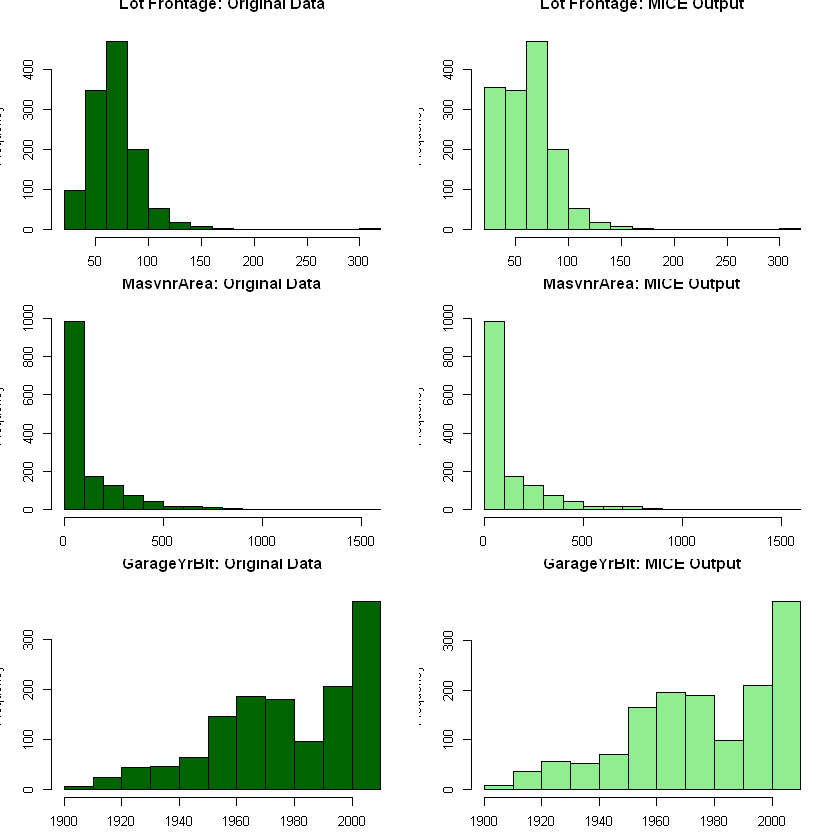

In [44]:
 for(i in 2:ncol(Train_cont)){
  a<-paste("Histogram for",colnames(Train_cont[i]))
                                  hist(Train_cont[,i], 
                                   main = a, 
                                   xlab=colnames(Train_cont[i]),
                                   las=1, 
                                   border="darkgreen", 
                                   col="darkgreen",  
                                   prob = TRUE)}

Train_factor<-Train[lapply(Train,class) == "factor"]
Train_factor<-cbind(Train$Id,Train$SalePrice,Train_factor)
Train_factor$DateSold<- as.factor(Train_cont$YrSold*100+Train_cont$MoSold)
colnames(Train_factor)[1:2]<-c("Id","SalePrice")
marginplot(Train[c(4,ncol(Train))])
Train_cont_imp<-mice(Train_cont[,!names(Train_cont) %in% c('Id','YrSold','MoSold')] )

Test_cont_imp<-mice(Test_cont[,!names(Test_cont) %in% c('Id','YrSold','MoSold')] )

mice_output<-complete(Train_cont_imp)
mice_output_test<-complete(Test_cont_imp)

par(mfrow=c(3,2))
hist(Train$LotFrontage, main='Lot Frontage: Original Data', 
     col='darkgreen')
hist(mice_output$LotFrontage, main='Lot Frontage: MICE Output', 
   col='lightgreen')
hist(Train$MasVnrArea, main='MasvnrArea: Original Data', 
     col='darkgreen')
hist(mice_output$MasVnrArea, main='MasvnrArea: MICE Output', 
     col='lightgreen')
hist(Train$GarageYrBlt, main='GarageYrBlt: Original Data', 
     col='darkgreen')
hist(mice_output$GarageYrBlt, main='GarageYrBlt: MICE Output', 
     col='lightgreen')
Train_cont$LotFrontage <- mice_output$LotFrontage
Train_cont$MasVnrArea <- mice_output$MasVnrArea
Train_cont$GarageYrBlt <- mice_output$GarageYrBlt

Test$LotFrontage <- mice_output_test$LotFrontage
Test$MasVnrArea <- mice_output_test$MasVnrArea
Test$GarageYrBlt <- mice_output_test$GarageYrBlt


#### 3.Non-numerıcal Features Analysis
We will investigate the average sale price over all subcategories of each categorical features. Then Tukey-Honesty test will be apply to reduce the subcategories. Tukey-Honesty test is used in scope of ANOVA.

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

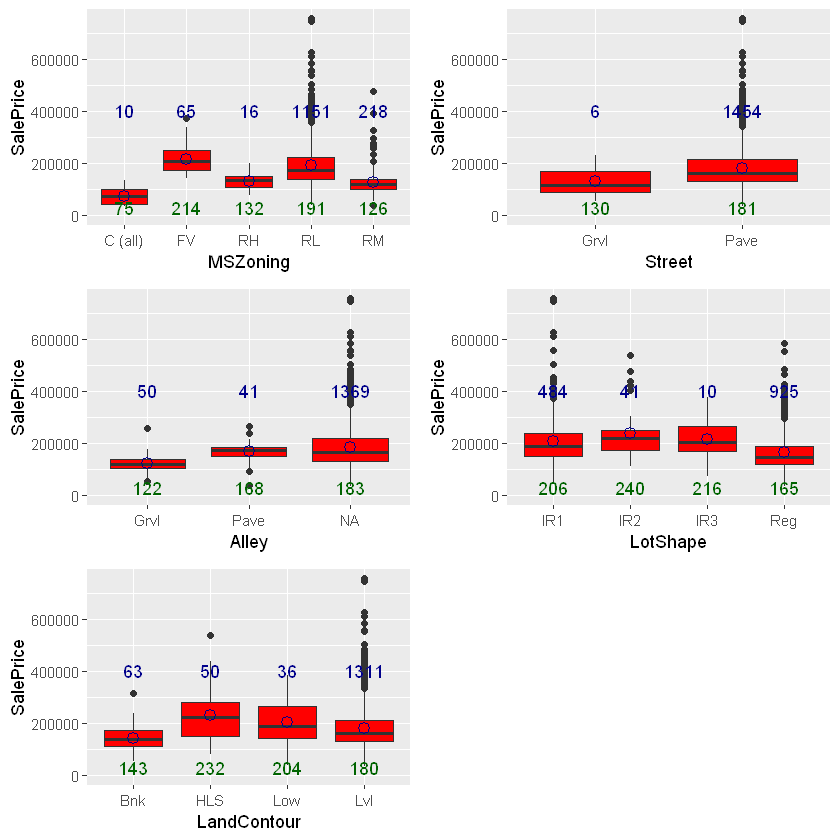

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

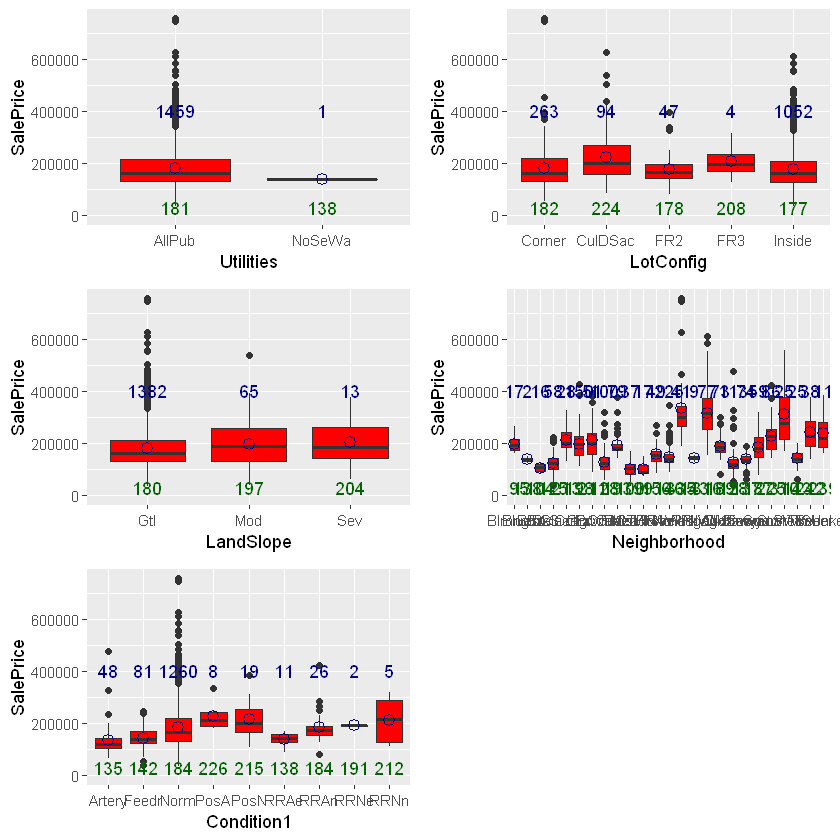

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

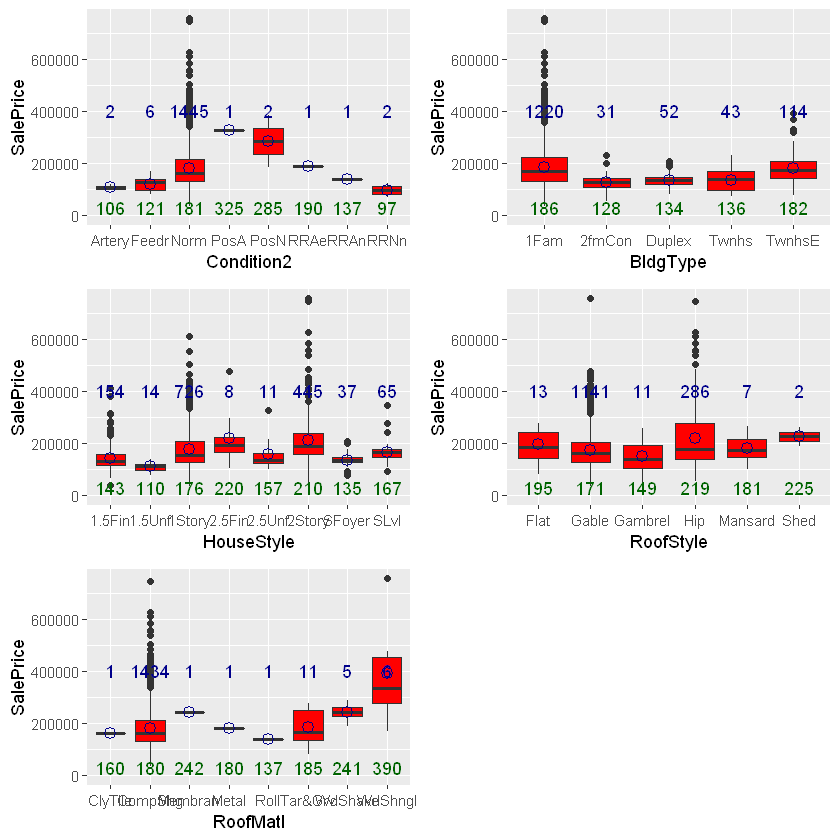

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

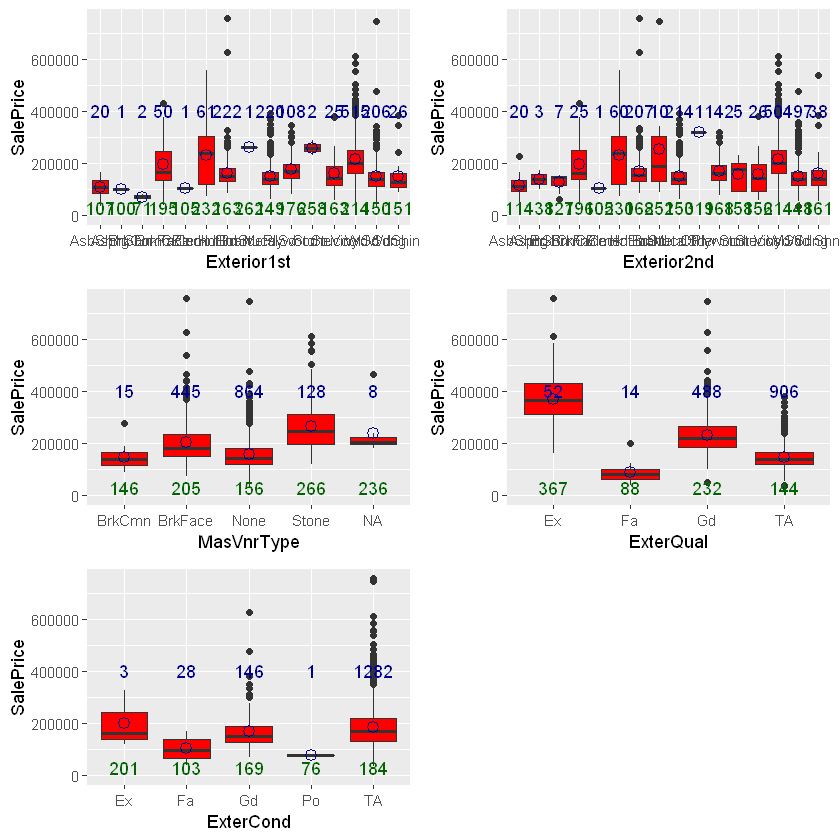

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

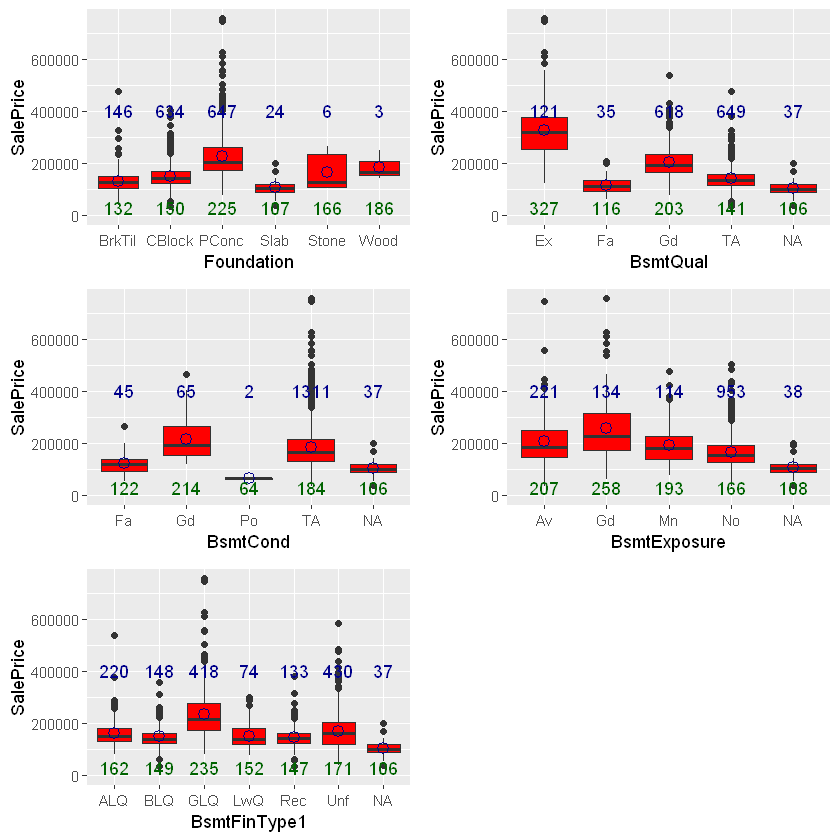

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

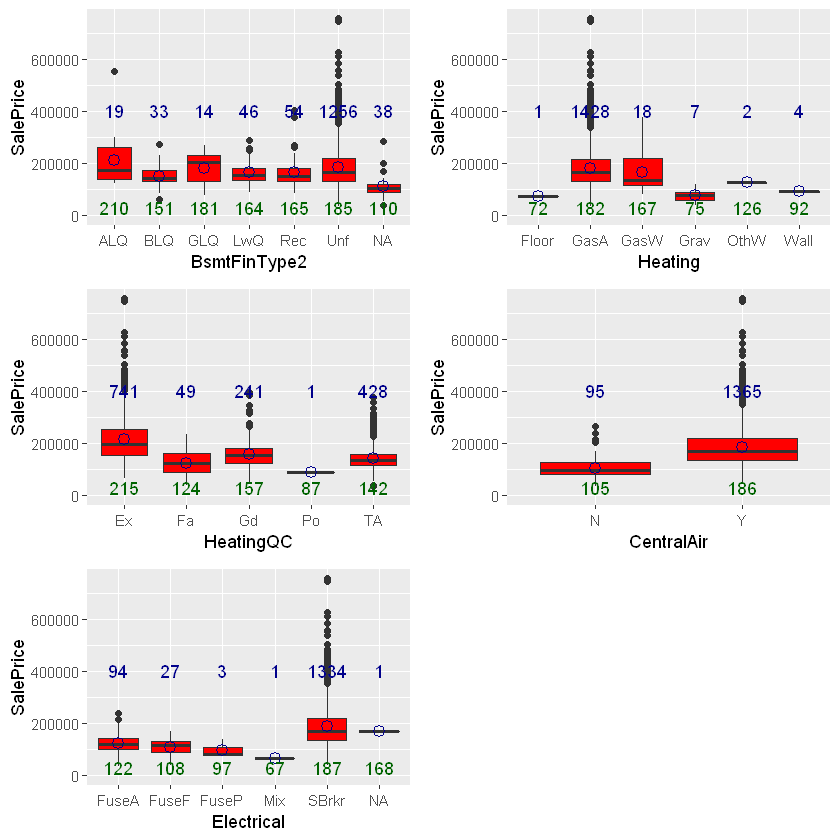

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

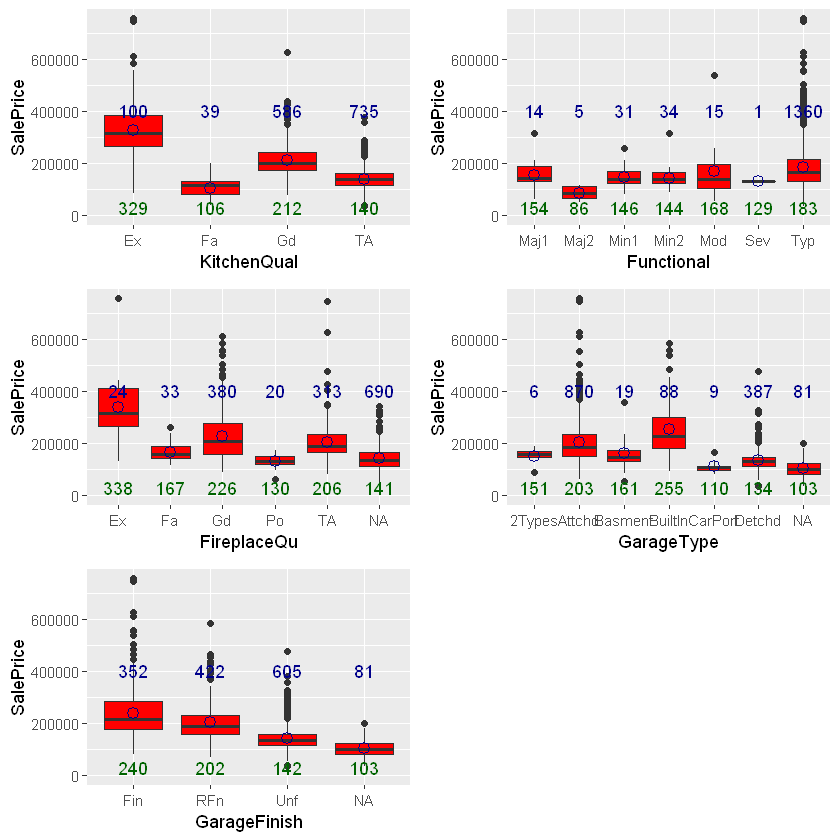

Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."Warning message:
"`show_guide` has been deprecated. Please use `show.legend` instead."

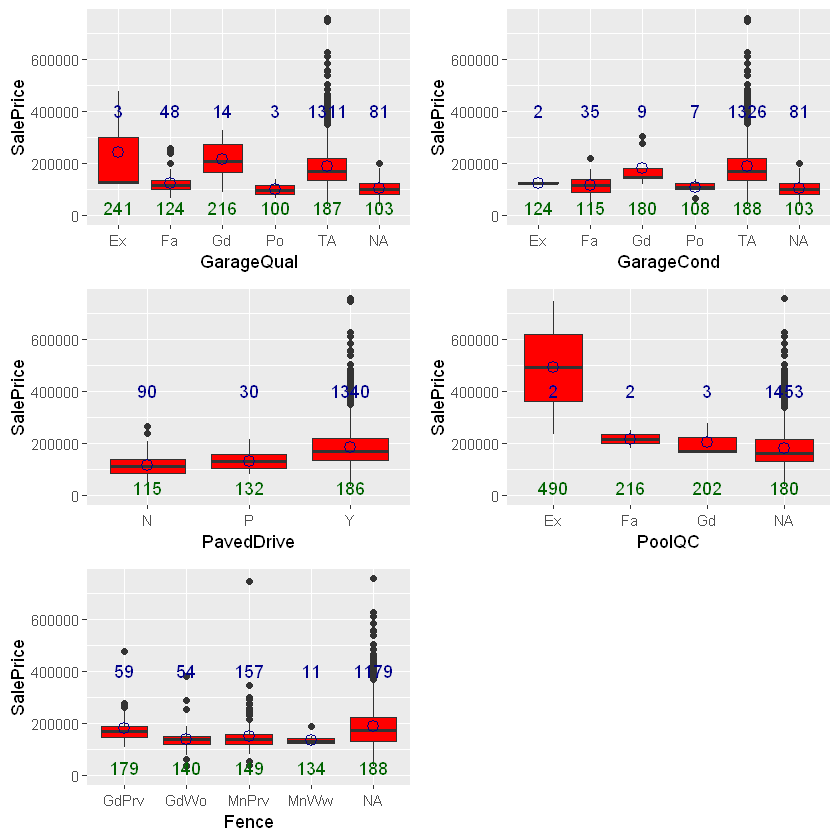

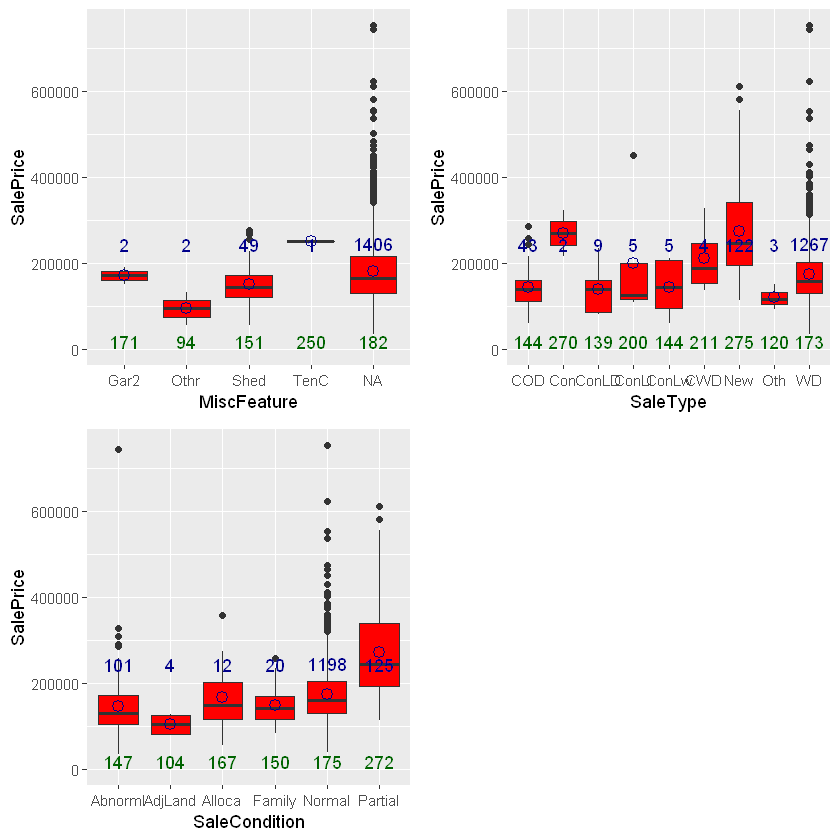

In [47]:
fun_mean <- function(x){
  return(data.frame(y=round(mean(x),digits=0)/1000,label=round(mean(x,na.rm=T)/1000,digits=0)))}

fun_count <- function(x){
  return(data.frame(y=length(x),label=length(x)))}

plotBox <- function( i) {
  p <- (ggplot(data=Train_factor, aes_string(x = names(Train_factor)[i], y = "SalePrice")) +
            geom_boxplot(fill="red")+stat_summary(fun.y=mean, colour="darkblue", geom="point", 
                                        shape=1, size=3,show_guide = FALSE)+
          stat_summary(fun.data = fun_mean, geom="text", vjust=-0.07, colour="darkgreen") +
          
          stat_summary(fun.data = fun_count, geom="text", vjust=-7, colour="darkblue")
          )
  
  return (p)
}

doPlots <- function(fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun( i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}
doPlots( fun = plotBox, ii = 3:7, ncol = 2)
doPlots( fun = plotBox, ii = 8:12, ncol = 2)
doPlots( fun = plotBox, ii = 13:17, ncol = 2)
doPlots( fun = plotBox, ii = 18:22, ncol = 2)
doPlots( fun = plotBox, ii = 23:27, ncol = 2)
doPlots( fun = plotBox, ii = 28:32, ncol = 2)
doPlots( fun = plotBox, ii = 33:37, ncol = 2)
doPlots( fun = plotBox, ii = 38:42, ncol = 2)
doPlots( fun = plotBox, ii = 43:45, ncol = 2)

In [71]:
Tukeytest<-function(){
  set.seed(2222)
  library(multcompView)
  train_data<-read.csv("train_house.csv",header=TRUE,sep=",")
  inTrain<-createDataPartition(y=train_data$SalePrice,p=0.7, list=FALSE)
  Train<-train_data[inTrain,]
  Validation<-train_data[-inTrain,]
  Train_factor<-Train[lapply(Train,class) == "factor"]
  Train_factor<-cbind(Train$Id,Train$SalePrice,Train_factor)
  #Train_factor$DateSold<- as.factor(Train_cont$YrSold*100+Train_cont$MoSold)
  colnames(Train_factor)[1:2]<-c("Id","SalePrice")
  # What is the effect of the treatment on the value ?
  getTUKEY<-function(var,i){
    model=lm( Train_factor$SalePrice ~ var)
    ANOVA=aov(model)
    # Tukey test to study each pair of treatment :
    TUKEY <- TukeyHSD(x=ANOVA, conf.level=0.95)
    
    # Tuckey test representation :
    plot(TUKEY , las=1 , col="brown" )
    
    
    # I need to group the treatments that are not different each other together.
    generate_label_df <- function(TUKEY, variable){
      
      # Extract labels and factor levels from Tukey post-hoc 
      Tukey.levels <- TUKEY[[variable]][,4]
      Tukey.labels <- data.frame(multcompLetters(Tukey.levels)['Letters'])
      
      #I need to put the labels in the same order as in the boxplot :
      Tukey.labels$SaleType=rownames(Tukey.labels)
      Tukey.labels=Tukey.labels[order(Tukey.labels$SaleType) , ]
      return(Tukey.labels)
    }
    
    # Apply the function on my dataset
    LABELS=generate_label_df(TUKEY , "var")
    
    
    # A panel of colors to draw each group with the same color :
    my_colors=c( rgb(143,199,74,maxColorValue = 255),rgb(242,104,34,maxColorValue = 255),
                 rgb(111,145,202,maxColorValue = 255),rgb(254,188,18,maxColorValue = 255) ,
                 rgb(74,132,54,maxColorValue = 255),rgb(236,33,39,maxColorValue = 255),
                 rgb(165,103,40,maxColorValue = 255),rgb(165,103,30,maxColorValue = 255),
                 rgb(165,93,20,maxColorValue = 255))
    
    # Draw the basic boxplot
    a=boxplot( Train_factor$SalePrice ~ var , ylim=c(min(Train_factor$SalePrice) , 1.1*max(Train_factor$SalePrice)) , col=my_colors[as.numeric(LABELS[,1])] , ylab="Sale Price" , main="")
    
    # I want to write the letter over each box. Over is how high I want to write it.
    over=0.1*max( a$stats[nrow(a$stats),] )
    
    #Add the labels
    text( c(1:nlevels(var)) , a$stats[nrow(a$stats),]+over , LABELS[,1]  , col=my_colors[as.numeric(LABELS[,1])] )
     }

  getTUKEY(Train_factor$MSZoning)
  
  getTUKEY(Train_factor$LotShape)
  getTUKEY(Train_factor$LandContour)
  
  getTUKEY(Train_factor$LotConfig)
  getTUKEY(Train_factor$LandSlope)
  getTUKEY(Train_factor$Neighborhood)
  getTUKEY(Train_factor$Condition1)
  
  getTUKEY(Train_factor$BldgType)
  getTUKEY(Train_factor$HouseStyle)
  getTUKEY(Train_factor$RoofStyle)
  
  getTUKEY(Train_factor$Exterior1st)
  getTUKEY(Train_factor$Exterior2nd)
  getTUKEY(Train_factor$MasVnrType)
  getTUKEY(Train_factor$ExterQual)
  getTUKEY(Train_factor$ExterCon)
  getTUKEY(Train_factor$Foundation)
  getTUKEY(Train_factor$BsmtQual)
  getTUKEY(Train_factor$BsmtCond)
  getTUKEY(Train_factor$BsmtExposure)
  getTUKEY(Train_factor$BsmtFinType1)
  getTUKEY(Train_factor$BsmtFinType2)
  
  getTUKEY(Train_factor$HeatingQC)
  getTUKEY(Train_factor$Electrical)
  getTUKEY(Train_factor$KitchenQual)
  getTUKEY(Train_factor$Functional)
  getTUKEY(Train_factor$FireplaceQu)
  getTUKEY(Train_factor$GarageType)
  getTUKEY(Train_factor$GarageFinish)
  getTUKEY(Train_factor$GarageQual)
  getTUKEY(Train_factor$GarageCond)
  getTUKEY(Train_factor$PavedDrive)
  
  getTUKEY(Train_factor$Fence)
  getTUKEY(Train_factor$MiscFeature)
  getTUKEY(Train_factor$SaleType)
  getTUKEY(Train_factor$SaleCondition)
}


Train_factor$MSZoning[Train_factor$MSZoning=="RM"]<-"C (all)"
Train_factor$LotConfig[Train_factor$LotConfig=="FR3"]<-"FR2"
Train_factor$Condition1[Train_factor$Condition1=="Artery"]<-"Feedr"
Train_factor$Condition1[Train_factor$Condition1=="PosN"]<-"Norm"
Train_factor$Condition1[Train_factor$Condition1=="RRAe"]<-"RRAn"
Train_factor$Condition1[Train_factor$Condition1=="RRNe"]<-"RRAn"
Train_factor$Condition1[Train_factor$Condition1=="RRNn"]<-"RRAn"
Train_factor$BldgType[Train_factor$BldgType=="2fmCon"]<-"Duplex"
Train_factor$BldgType[Train_factor$BldgType=="Twnhs"]<-"Duplex"
Train_factor$HouseStyle[Train_factor$HouseStyle=="2Story"]<-"1Story"
Train_factor$HouseStyle[Train_factor$HouseStyle=="2.5Fin"]<-"2.5Unf"
Train_factor$HouseStyle[Train_factor$HouseStyle=="SFoyer"]<-"SLvi"
Train_factor$HouseStyle[Train_factor$HouseStyle=="1.5Unf"]<-"SLvi"
Train_factor$RoofStyle[Train_factor$RoofStyle=="Mansard"]<-"Flat"
Train_factor$RoofStyle[Train_factor$RoofStyle=="Shed"]<-"Flat"
Train_factor$RoofStyle[Train_factor$RoofStyle=="Gambrel"]<-"Gable"
Train_factor$ExterQual[Train_factor$ExterQual=="TA"]<-"Fa"
Train_factor$ExterCon[Train_factor$ExterCon=="Po"]<-"Ex"
Train_factor$ExterCon[Train_factor$ExterCon=="TA"]<-"Gd"
Train_factor$Foundation[Train_factor$Foundation=="BrkTil"]<-"CBlock"
Train_factor$Foundation[Train_factor$Foundation=="Slab"]<-"CBlock"
Train_factor$Foundation[Train_factor$Foundation=="Wood"]<-"Stone"
Train_factor$BsmtQual[Train_factor$BsmtQual=="TA"]<-"Fa"
Train_factor$BsmtCond[Train_factor$BsmtCond=="TA"]<-"Fa"
Train_factor$BsmtExposure[Train_factor$BsmtExposure=="Mn"]<-"Av"
Train_factor$BsmtFinType1[Train_factor$BsmtFinType1=="LwQ"]<-"ALQ"
Train_factor$HeatingQC[Train_factor$HeatingQC=="TA"]<-"Gd"
Train_factor$HeatingQC[Train_factor$HeatingQC=="Fa"]<-"Gd"
Train_factor$Electrical[Train_factor$Electrical=="SBrkr"]<-"FuseF"
Train_factor$KitchenQual[Train_factor$KitchenQual=="TA"]<-"Fa"
Train_factor$GarageType[Train_factor$GarageType=="Detchd"]<-"CarPort"
Train_factor$GarageQual[Train_factor$GarageQual=="TA"]<-"Gd"
Train_factor$GarageQual[Train_factor$GarageQual=="Ex"]<-"Gd"
Train_factor$GarageCond[Train_factor$GarageCond == "Ex"]<-"Gd"
Train_factor$GarageCond[Train_factor$GarageCond== "Po"]<-"Gd"
Train_factor$PavedDrive[Train_factor$PavedDrive=="P"]<-"N"
Train_factor$Fence[Train_factor$Fence=="GdWo"]<-"MnPrv"
Train_factor$SaleType[Train_factor$SaleType=="ConLD"]<-"COD"
Train_factor$SaleType[Train_factor$SaleType=="ConLI"]<-"Con"
Train_factor$SaleType[Train_factor$SaleType=="ConLw"]<-"Con"
Train_factor$SaleType[Train_factor$SaleType=="CWD"]<-"Con"
Train_factor$SaleType[Train_factor$SaleType=="Oth"]<-"Con"
Train_factor$SaleCondition[Train_factor$SaleCondition=="AdjLand"]<-"Alloca"
Train_factor$SaleCondition[Train_factor$SaleCondition=="Abnorml"]<-"Normal"
Train_factor$SaleCondition[Train_factor$SaleCondition=="Family"]<-"Normal"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="AsphShn"]<-"Plywood"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="BrkFace"]<-"Plywood"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="AsbShng"]<-"MetalSd"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="HdBoard"]<-"MetalSd"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="VinylSd"]<-"MetalSd"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="Wd Sdng"]<-"MetalSd"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="Wd Shng"]<-"MetalSd"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="Brk Cmn"]<-"Stone"
Train_factor$Exterior2nd[Train_factor$Exterior2nd=="Stucco"]<-"CmentBd"
Train_factor$Exterior1st[Train_factor$Exterior1st=="AsphShn"]<-"Stucco"
Train_factor$Exterior1st[Train_factor$Exterior1st=="Stone"]<-"Stucco"
Train_factor$Exterior1st[Train_factor$Exterior1st=="BrkComm"]<-"Stucco"
Train_factor$Exterior1st[Train_factor$Exterior1st=="CBlock"]<-"Stucco"
Train_factor$Exterior1st[Train_factor$Exterior1st=="ImStucc"]<-"Stucco"
Train_factor$Exterior1st[Train_factor$Exterior1st=="HdBoard"]<-"MetalSd"
Train_factor$Exterior1st[Train_factor$Exterior1st=="Wd Sdng"]<-"MetalSd"
Train_factor$Exterior1st[Train_factor$Exterior1st=="WdShing"]<-"MetalSd"
Train_factor$Neighborhood[Train_factor$Neighborhood=="ClearCl"]<-"Somerst"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Crawfor"]<-"Somerst"
Train_factor$Neighborhood[Train_factor$Neighborhood=="CollgCr"]<-"Somerst"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Veenker"]<-"Somerst"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Timber"]<-"Somerst"
Train_factor$Neighborhood[Train_factor$Neighborhood=="BrDale"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="BrkSide"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Edwards"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="OldTown"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Sawyer"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="IDOTRR"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="NPkVill"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="SWISU"]<-"MeadowV"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Gilbert"]<-"NWAmes"
Train_factor$Neighborhood[Train_factor$Neighborhood=="SawyerW"]<-"NWAmes"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Blmngtn"]<-"NWAmes"
Train_factor$Neighborhood[Train_factor$Neighborhood=="NridgHt"]<-"NoRidge"
Train_factor$Neighborhood[Train_factor$Neighborhood=="StoneBr"]<-"NoRidge"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Mitchel"]<-"NAmes"
Train_factor$Neighborhood[Train_factor$Neighborhood=="Blueste"]<-"NAmes"

Test$MSZoning[Test$MSZoning=="RM"]<-"C (all)"
Test$LotConfig[Test$LotConfig=="FR3"]<-"FR2"
Test$Condition1[Test$Condition1=="Artery"]<-"Feedr"
Test$Condition1[Test$Condition1=="PosN"]<-"Norm"
Test$Condition1[Test$Condition1=="RRAe"]<-"RRAn"
Test$Condition1[Test$Condition1=="RRNe"]<-"RRAn"
Test$Condition1[Test$Condition1=="RRNn"]<-"RRAn"
Test$BldgType[Test$BldgType=="2fmCon"]<-"Duplex"
Test$BldgType[Test$BldgType=="Twnhs"]<-"Duplex"
Test$HouseStyle[Test$HouseStyle=="2Story"]<-"1Story"
Test$HouseStyle[Test$HouseStyle=="2.5Fin"]<-"2.5Unf"
Test$HouseStyle[Test$HouseStyle=="SFoyer"]<-"SLvi"
Test$HouseStyle[Test$HouseStyle=="1.5Unf"]<-"SLvi"
Test$RoofStyle[Test$RoofStyle=="Mansard"]<-"Flat"
Test$RoofStyle[Test$RoofStyle=="Shed"]<-"Flat"
Test$RoofStyle[Test$RoofStyle=="Gambrel"]<-"Gable"
Test$ExterQual[Test$ExterQual=="TA"]<-"Fa"
Test$ExterCon[Test$ExterCon=="Po"]<-"Ex"
Test$ExterCon[Test$ExterCon=="TA"]<-"Gd"
Test$Foundation[Test$Foundation=="BrkTil"]<-"CBlock"
Test$Foundation[Test$Foundation=="Slab"]<-"CBlock"
Test$Foundation[Test$Foundation=="Wood"]<-"Stone"
Test$BsmtQual[Test$BsmtQual=="TA"]<-"Fa"
Test$BsmtCond[Test$BsmtCond=="TA"]<-"Fa"
Test$BsmtExposure[Test$BsmtExposure=="Mn"]<-"Av"
Test$BsmtFinType1[Test$BsmtFinType1=="LwQ"]<-"ALQ"
Test$HeatingQC[Test$HeatingQC=="TA"]<-"Gd"
Test$HeatingQC[Test$HeatingQC=="Fa"]<-"Gd"
Test$Electrical[Test$Electrical=="SBrkr"]<-"FuseF"
Test$KitchenQual[Test$KitchenQual=="TA"]<-"Fa"
Test$GarageType[Test$GarageType=="Detchd"]<-"CarPort"
Test$GarageQual[Test$GarageQual=="TA"]<-"Gd"
Test$GarageQual[Test$GarageQual=="Ex"]<-"Gd"
Test$GarageCond[Test$GarageCond == "Ex"]<-"Gd"
Test$GarageCond[Test$GarageCond== "Po"]<-"Gd"
Test$PavedDrive[Test$PavedDrive=="P"]<-"N"
Test$Fence[Test$Fence=="GdWo"]<-"MnPrv"
Test$SaleType[Test$SaleType=="ConLD"]<-"COD"
Test$SaleType[Test$SaleType=="ConLI"]<-"Con"
Test$SaleType[Test$SaleType=="ConLw"]<-"Con"
Test$SaleType[Test$SaleType=="CWD"]<-"Con"
Test$SaleType[Test$SaleType=="Oth"]<-"Con"
Test$SaleCondition[Test$SaleCondition=="AdjLand"]<-"Alloca"
Test$SaleCondition[Test$SaleCondition=="Abnorml"]<-"Normal"
Test$SaleCondition[Test$SaleCondition=="Family"]<-"Normal"
Test$Exterior2nd[Test$Exterior2nd=="AsphShn"]<-"Plywood"
Test$Exterior2nd[Test$Exterior2nd=="BrkFace"]<-"Plywood"
Test$Exterior2nd[Test$Exterior2nd=="AsbShng"]<-"MetalSd"
Test$Exterior2nd[Test$Exterior2nd=="HdBoard"]<-"MetalSd"
Test$Exterior2nd[Test$Exterior2nd=="VinylSd"]<-"MetalSd"
Test$Exterior2nd[Test$Exterior2nd=="Wd Sdng"]<-"MetalSd"
Test$Exterior2nd[Test$Exterior2nd=="Wd Shng"]<-"MetalSd"
Test$Exterior2nd[Test$Exterior2nd=="Brk Cmn"]<-"Stone"
Test$Exterior2nd[Test$Exterior2nd=="Stucco"]<-"CmentBd"
Test$Exterior1st[Test$Exterior1st=="AsphShn"]<-"Stucco"
Test$Exterior1st[Test$Exterior1st=="Stone"]<-"Stucco"
Test$Exterior1st[Test$Exterior1st=="BrkComm"]<-"Stucco"
Test$Exterior1st[Test$Exterior1st=="CBlock"]<-"Stucco"
Test$Exterior1st[Test$Exterior1st=="ImStucc"]<-"Stucco"
Test$Exterior1st[Test$Exterior1st=="HdBoard"]<-"MetalSd"
Test$Exterior1st[Test$Exterior1st=="Wd Sdng"]<-"MetalSd"
Test$Exterior1st[Test$Exterior1st=="WdShing"]<-"MetalSd"
Test$Neighborhood[Test$Neighborhood=="ClearCl"]<-"Somerst"
Test$Neighborhood[Test$Neighborhood=="Crawfor"]<-"Somerst"
Test$Neighborhood[Test$Neighborhood=="CollgCr"]<-"Somerst"
Test$Neighborhood[Test$Neighborhood=="Veenker"]<-"Somerst"
Test$Neighborhood[Test$Neighborhood=="Timber"]<-"Somerst"
Test$Neighborhood[Test$Neighborhood=="BrDale"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="BrkSide"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="Edwards"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="OldTown"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="Sawyer"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="IDOTRR"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="NPkVill"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="SWISU"]<-"MeadowV"
Test$Neighborhood[Test$Neighborhood=="Gilbert"]<-"NWAmes"
Test$Neighborhood[Test$Neighborhood=="SawyerW"]<-"NWAmes"
Test$Neighborhood[Test$Neighborhood=="Blmngtn"]<-"NWAmes"
Test$Neighborhood[Test$Neighborhood=="NridgHt"]<-"NoRidge"
Test$Neighborhood[Test$Neighborhood=="StoneBr"]<-"NoRidge"
Test$Neighborhood[Test$Neighborhood=="Mitchel"]<-"NAmes"
Test$Neighborhood[Test$Neighborhood=="Blueste"]<-"NAmes"
Test$MSZoning[is.na(Test$MSZoning)==TRUE]<-"C (all)"
Test$KitchenQual[is.na(Test$KitchenQual)==TRUE]<-"Fa"

Test_factor<-Test[lapply(Test,class) == "factor"]
Test_char<-lapply(Test_factor,as.character)

Warning message in `[<-.factor`(`*tmp*`, Train_factor$HouseStyle == "SFoyer", value = "SLvi"):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, Train_factor$HouseStyle == "1.5Unf", value = "SLvi"):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, Test$HouseStyle == "SFoyer", value = "SLvi"):
"invalid factor level, NA generated"Warning message in `[<-.factor`(`*tmp*`, Test$HouseStyle == "1.5Unf", value = "SLvi"):
"invalid factor level, NA generated"

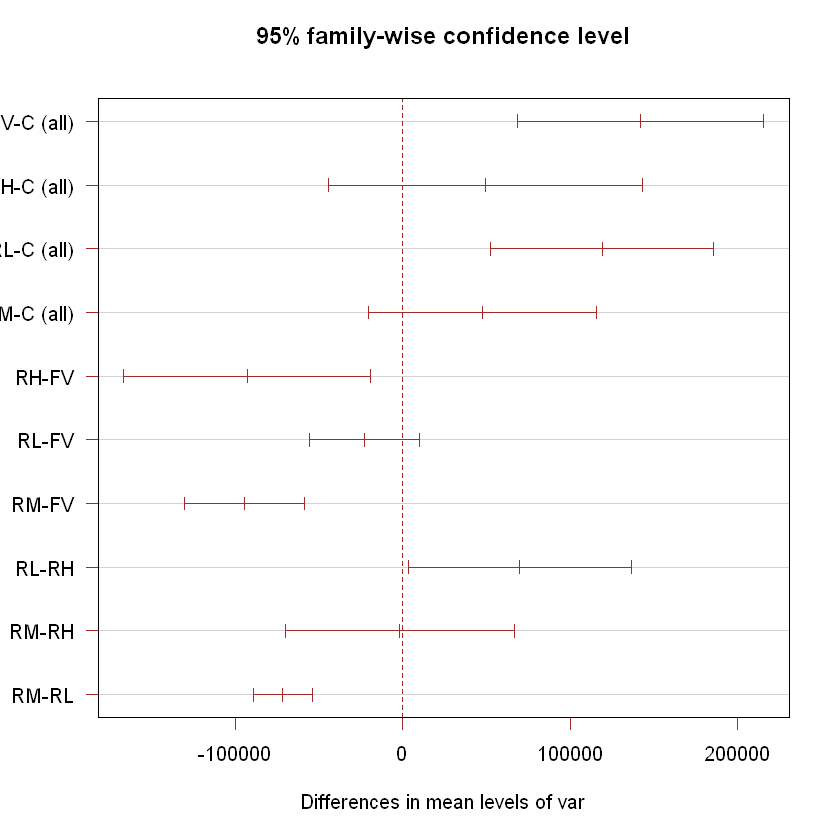

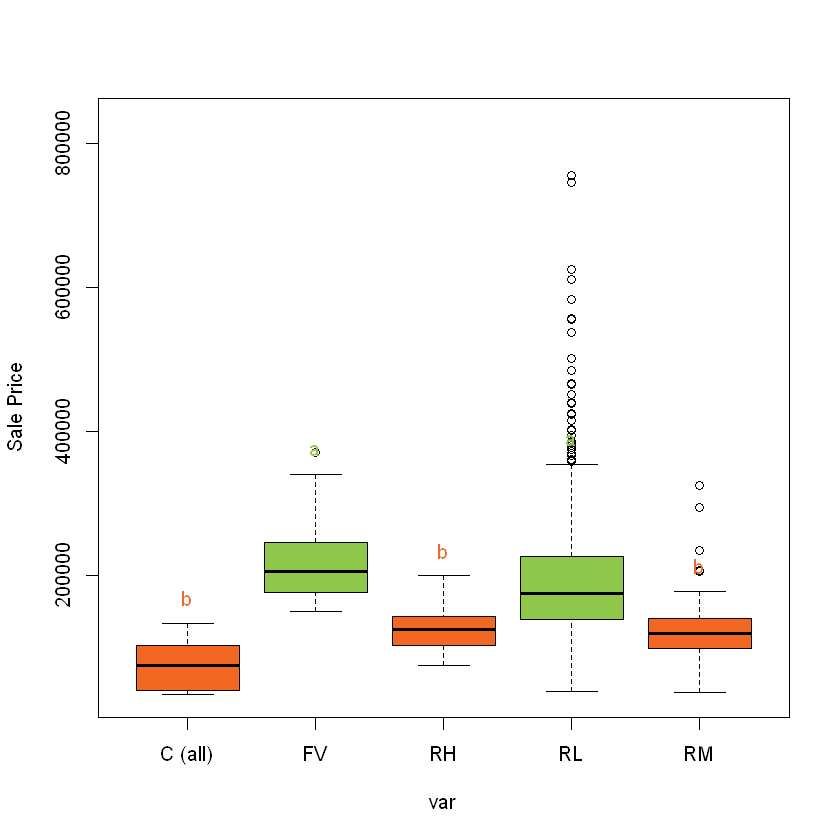

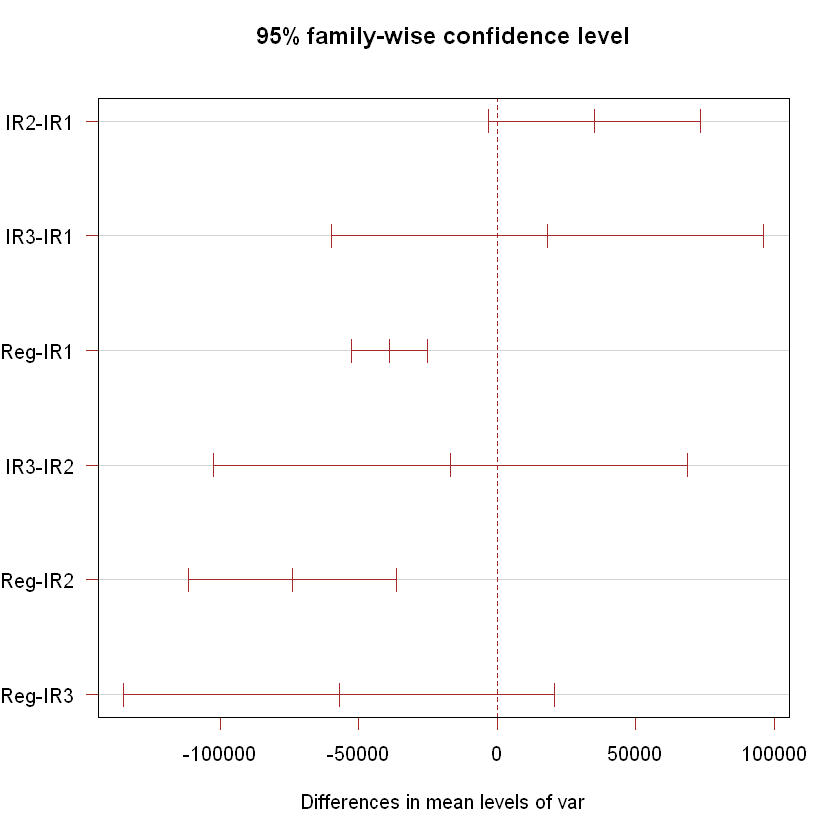

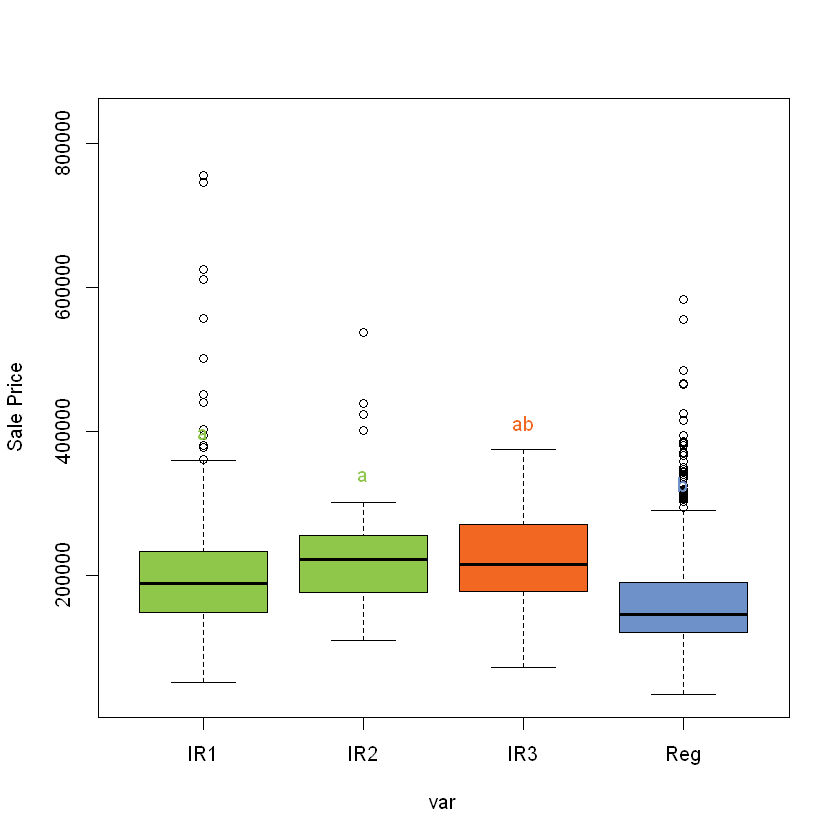

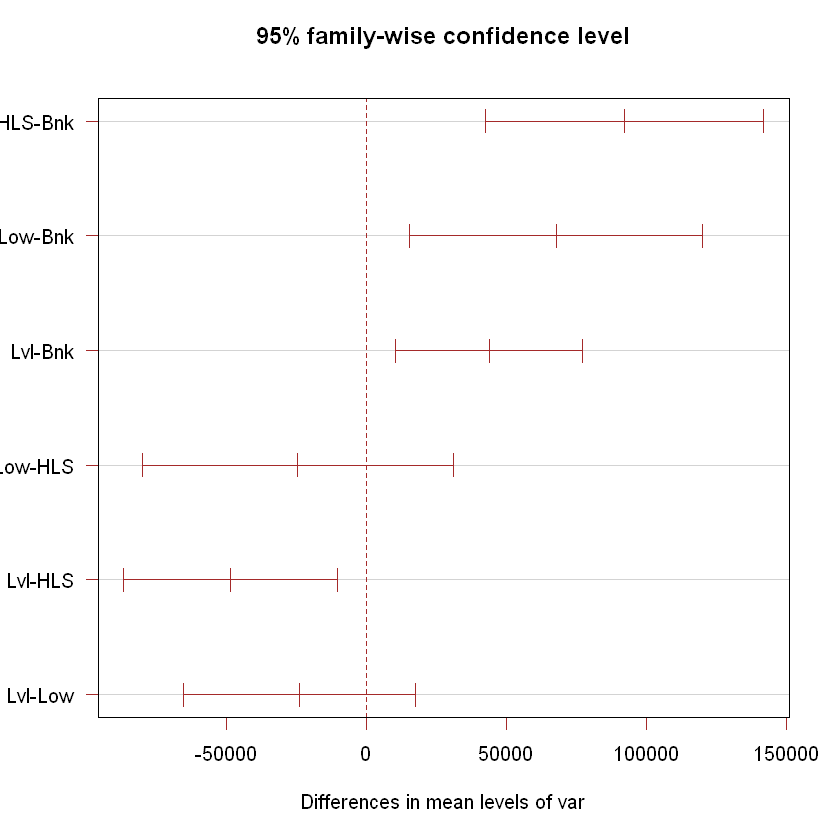

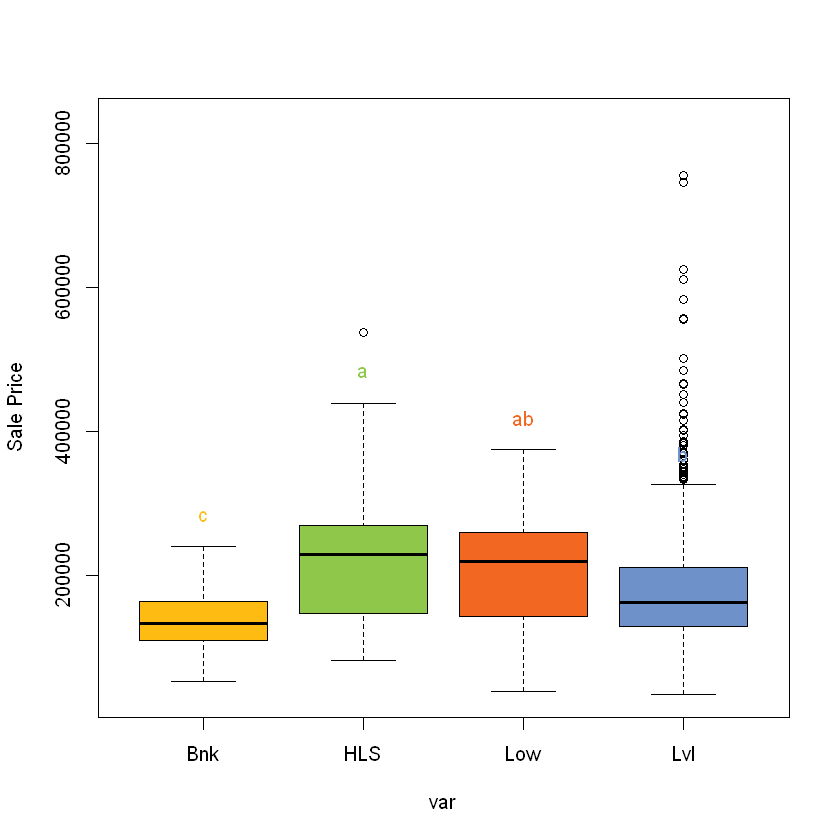

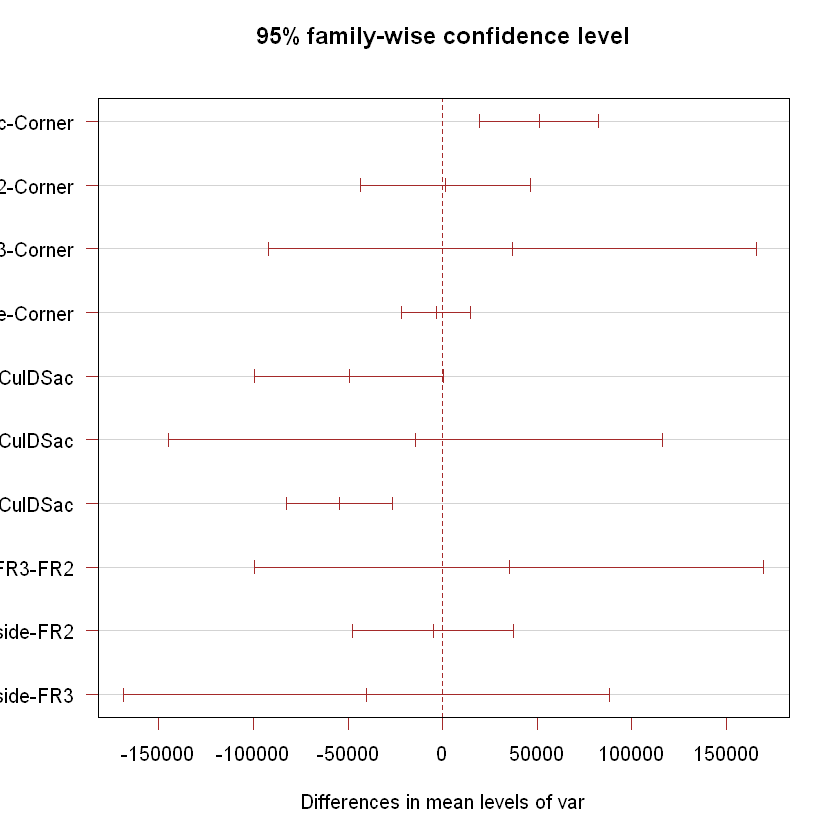

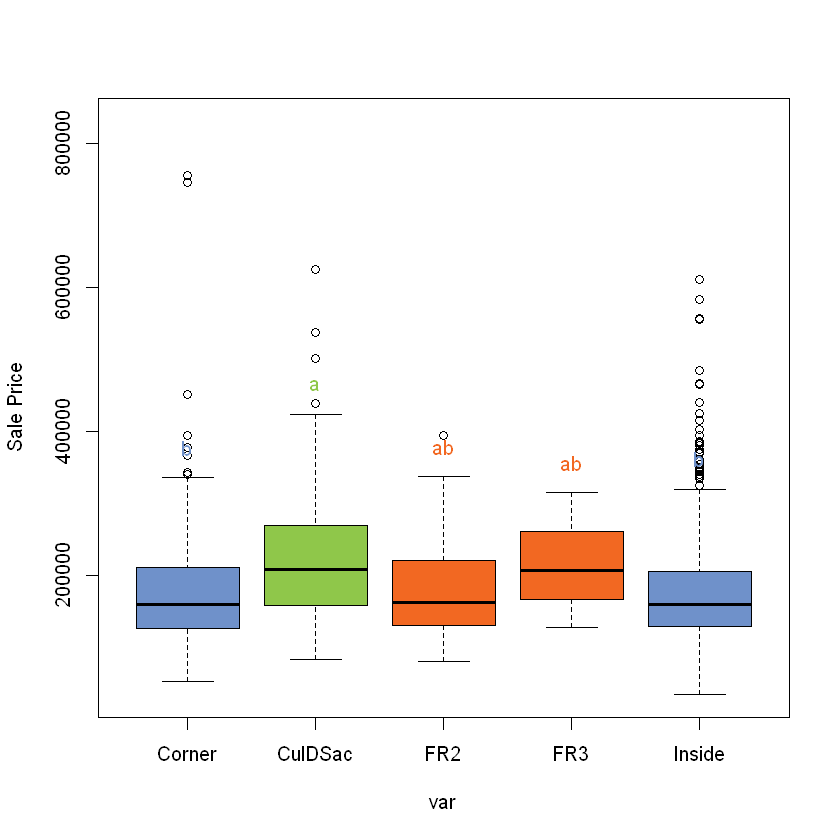

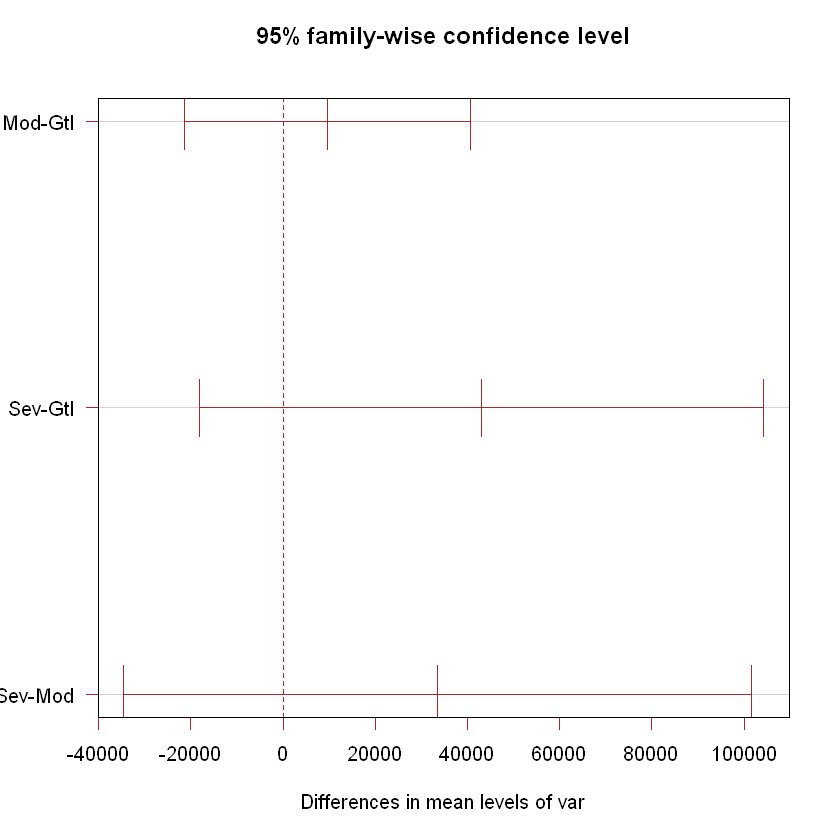

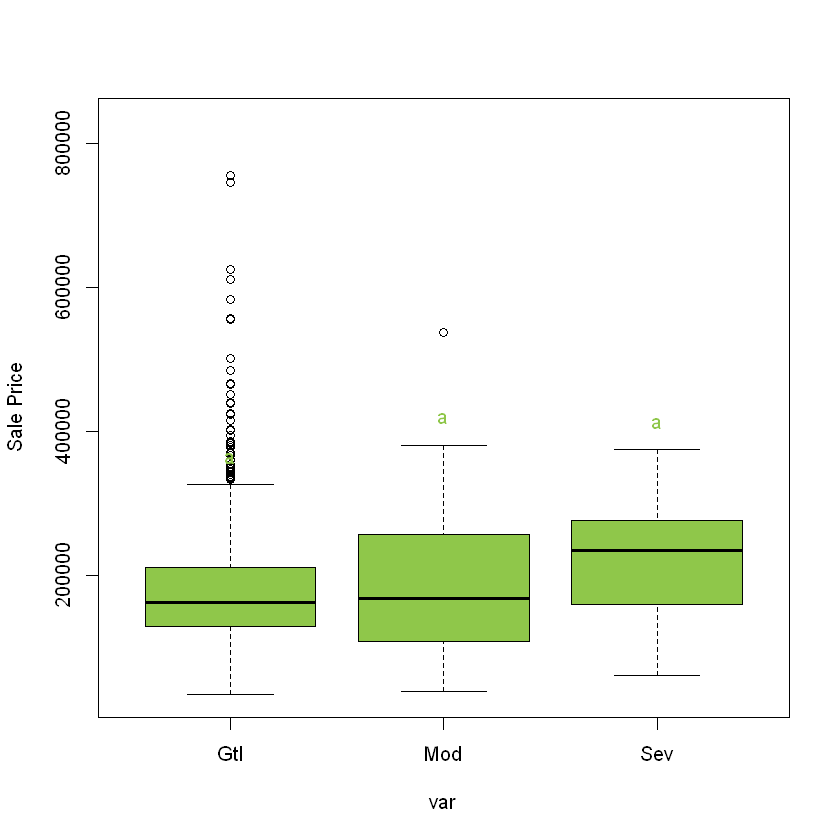

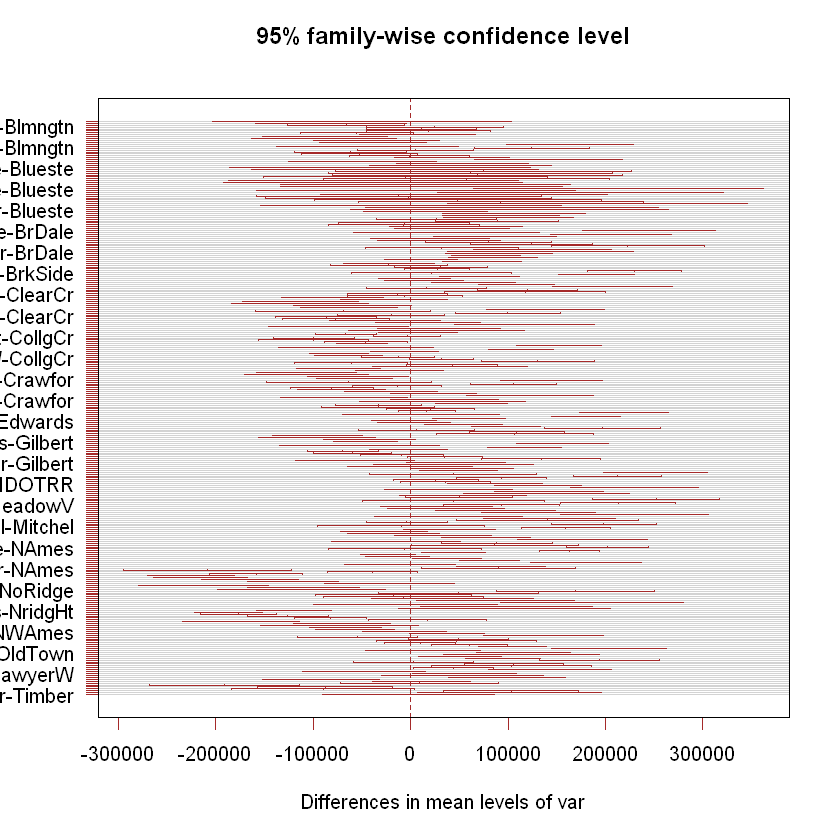

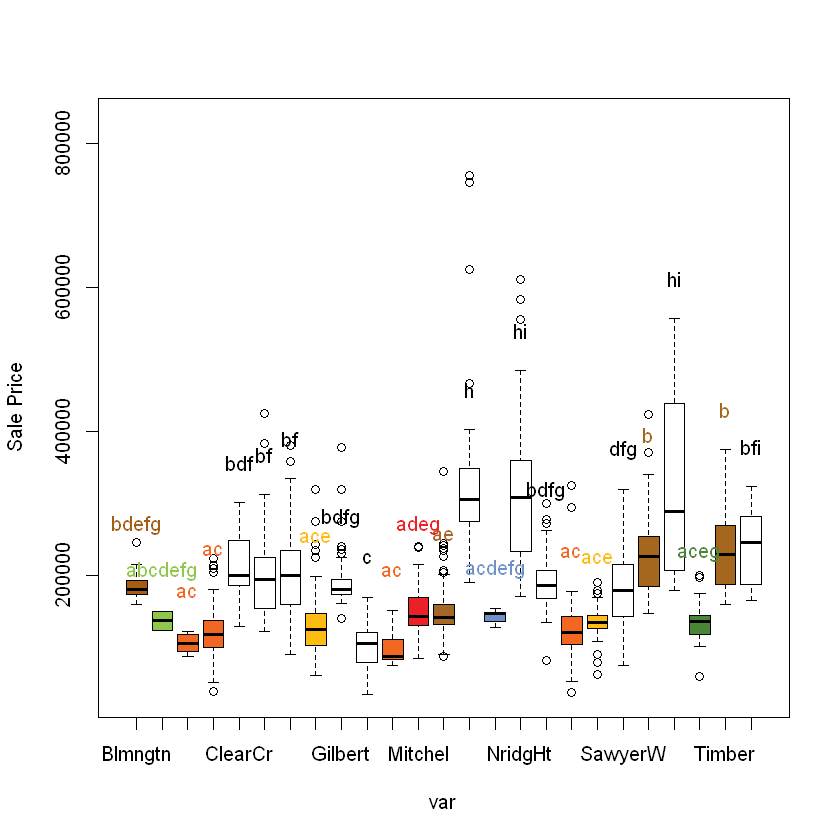

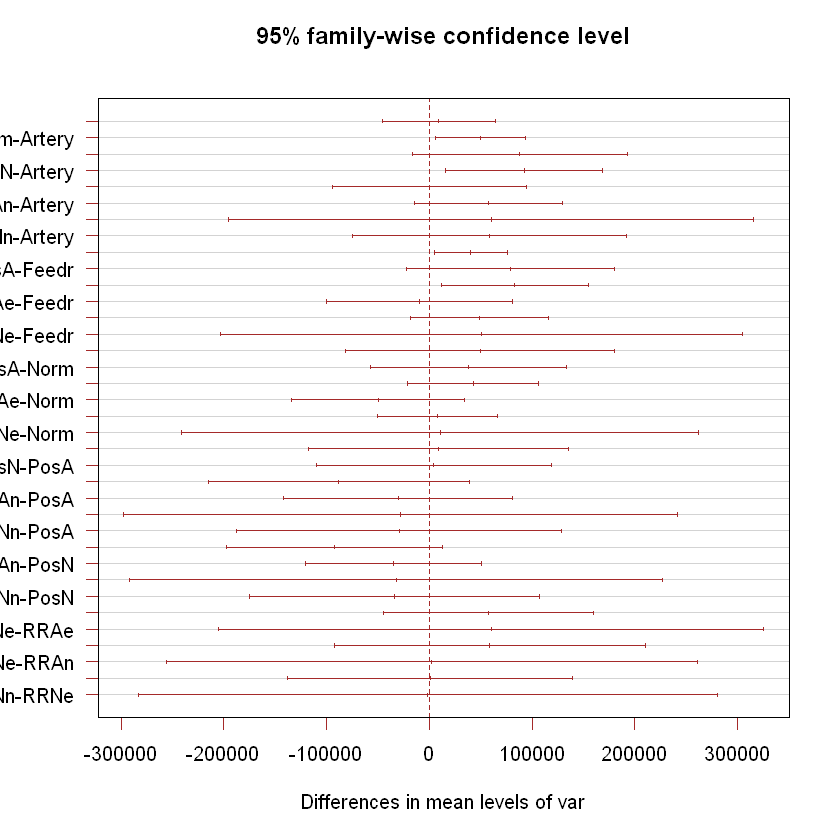

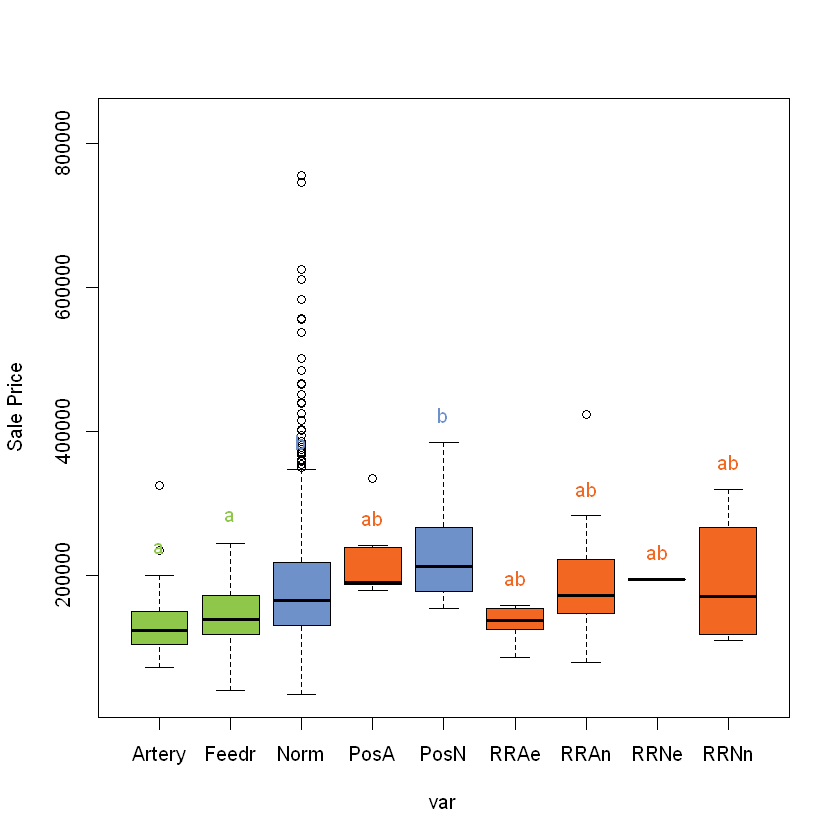

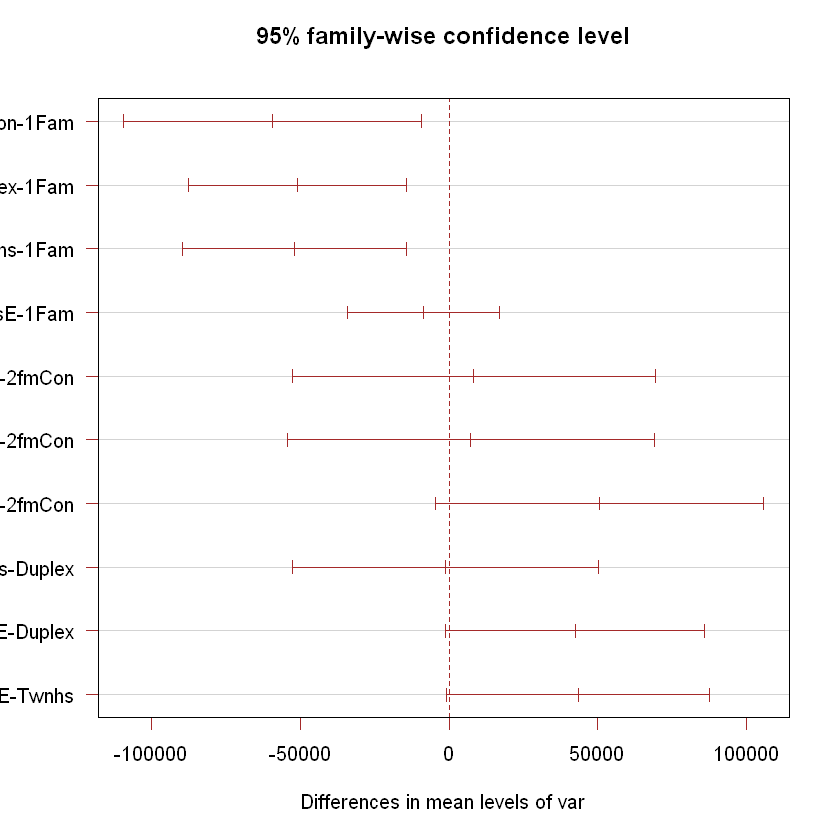

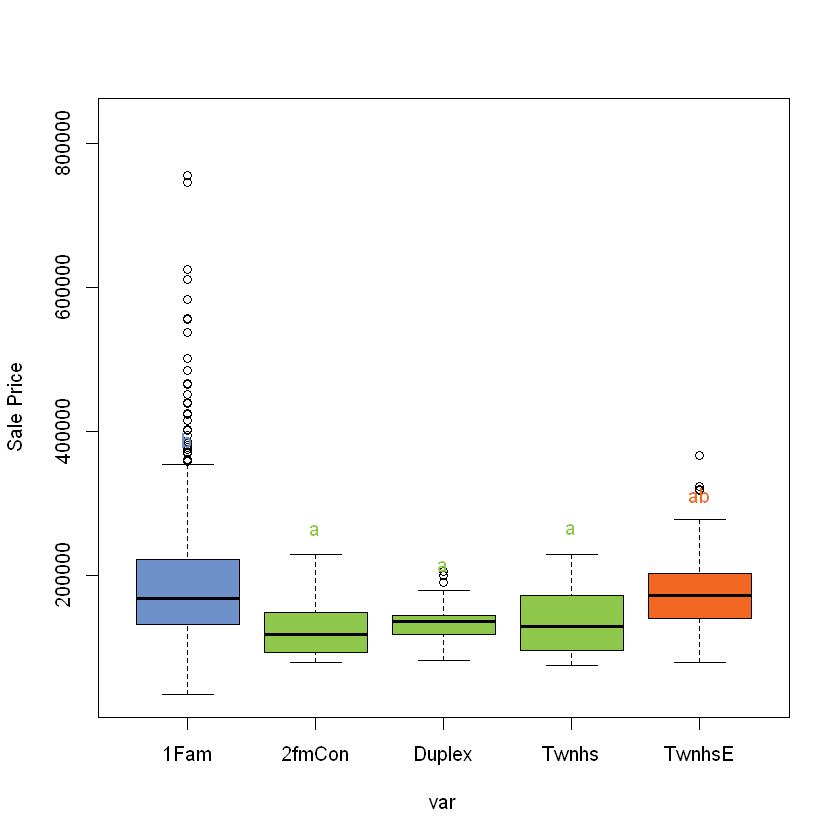

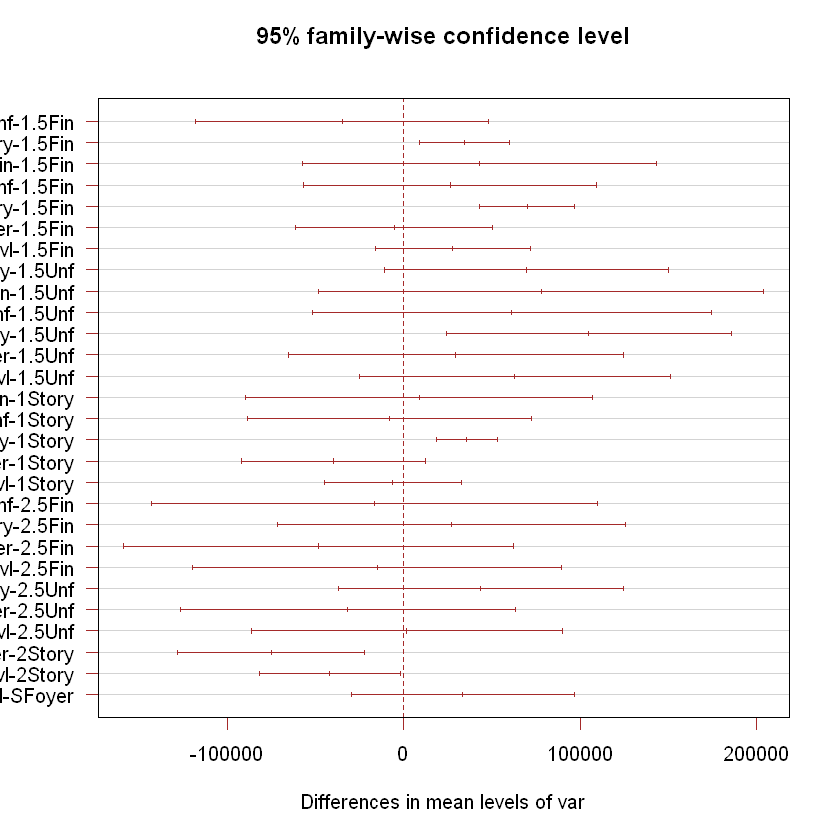

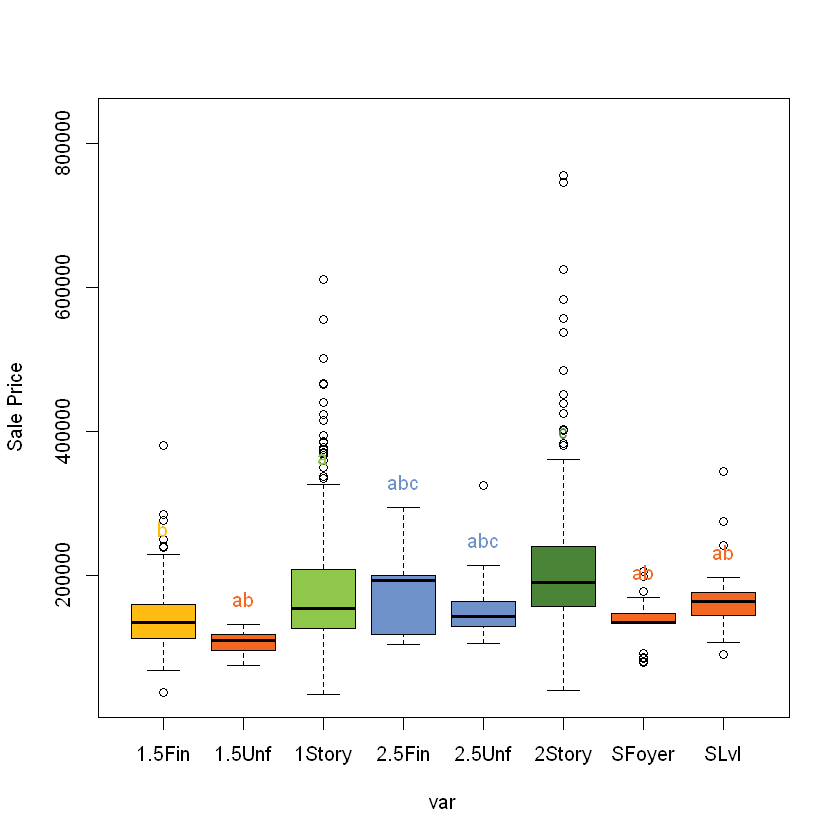

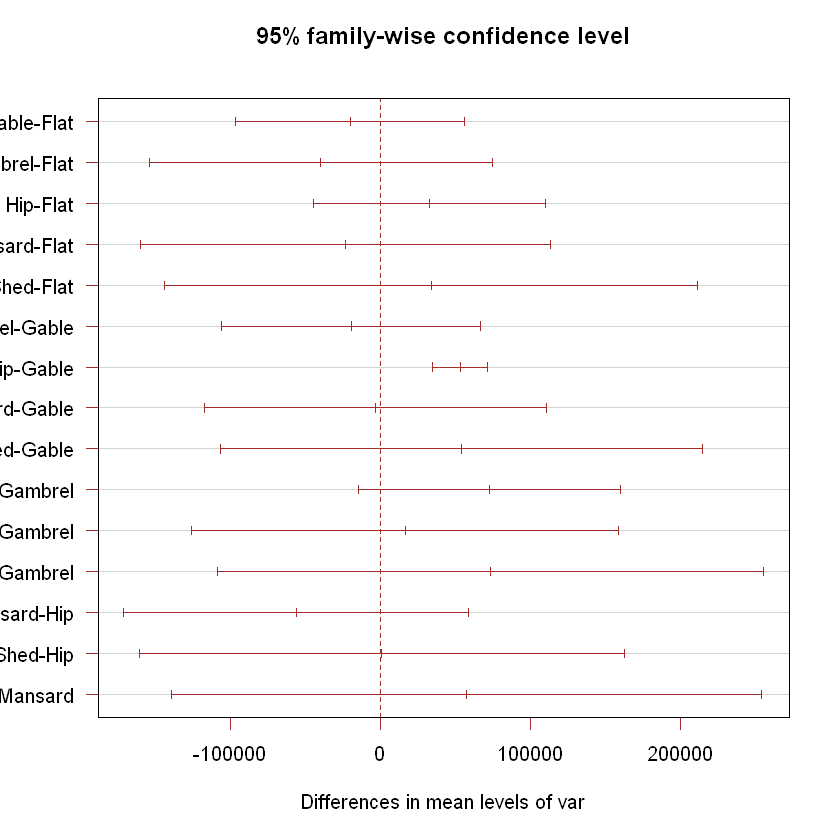

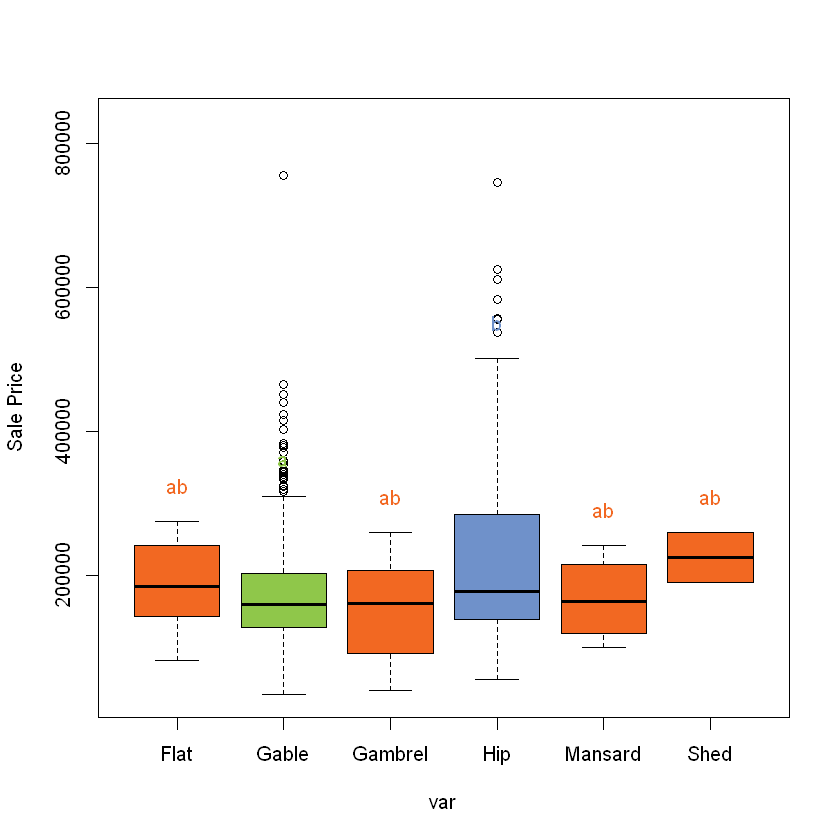

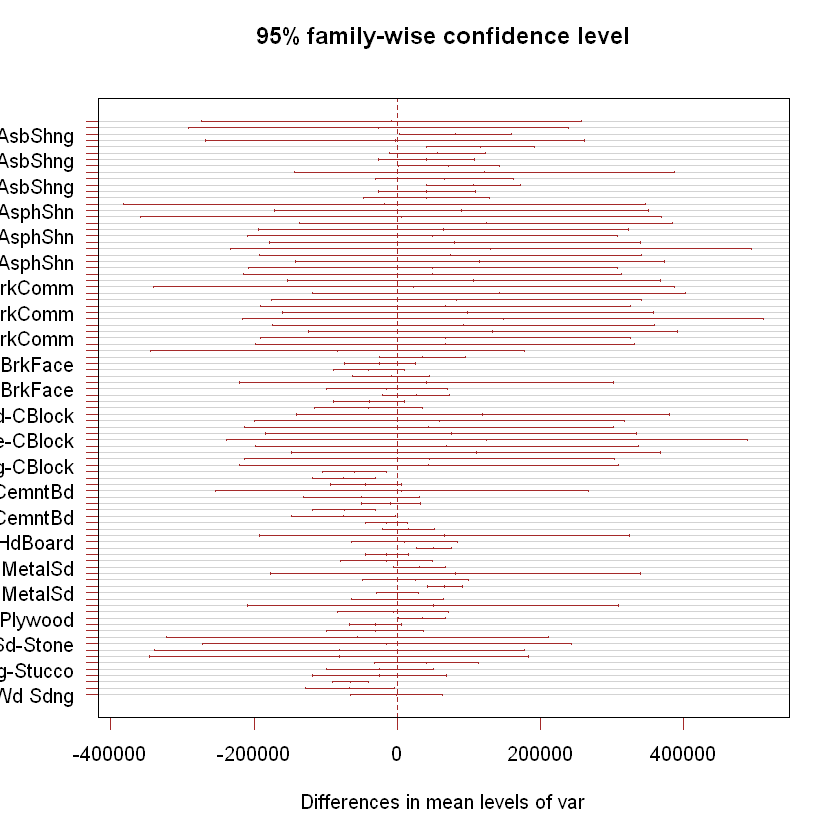

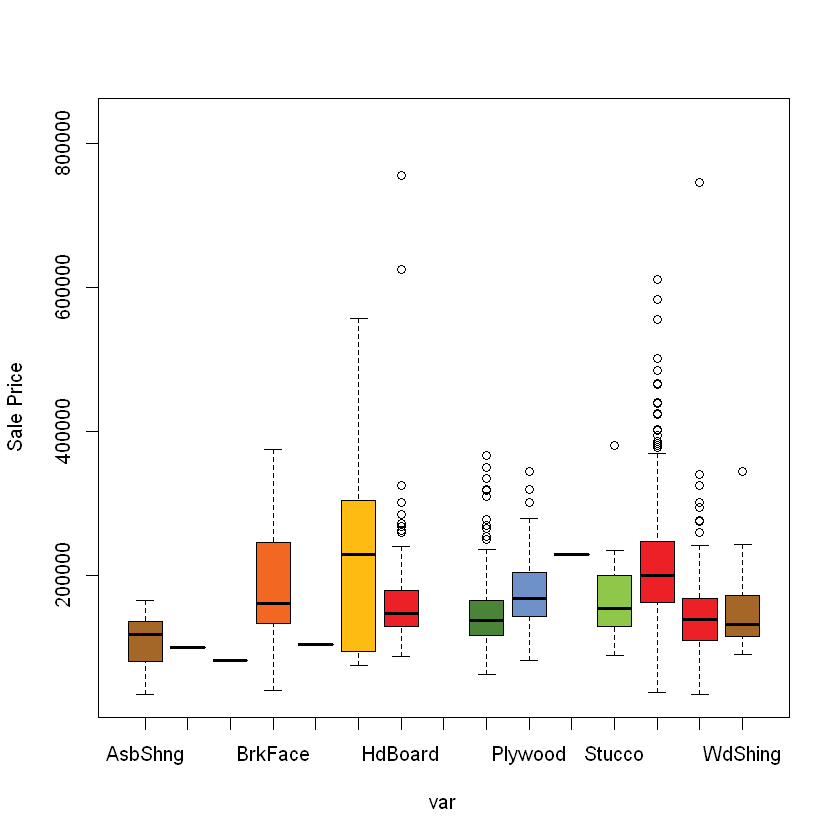

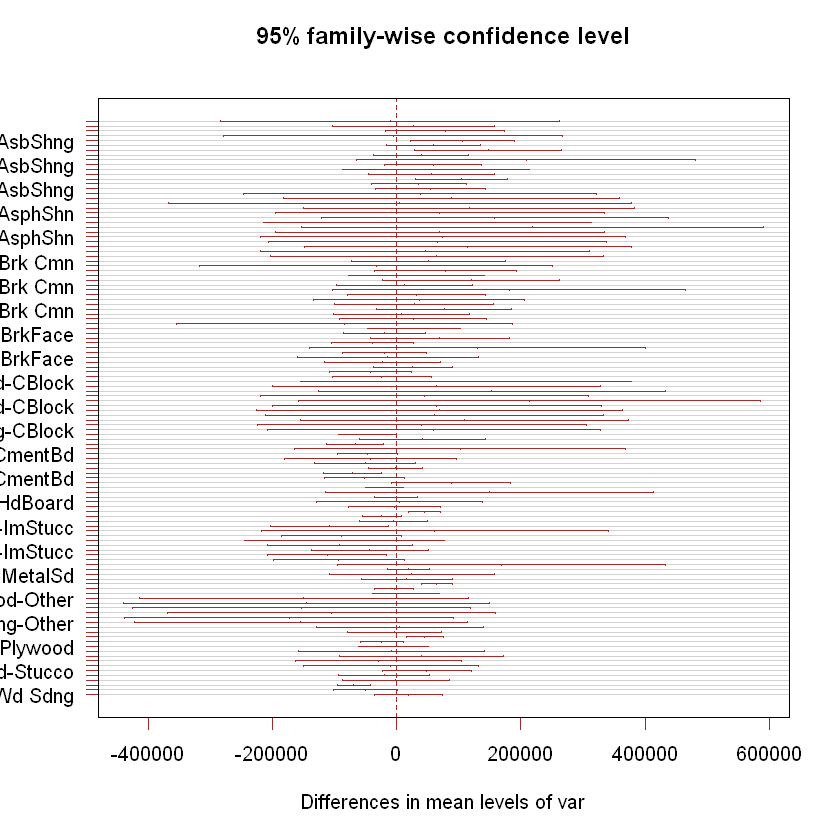

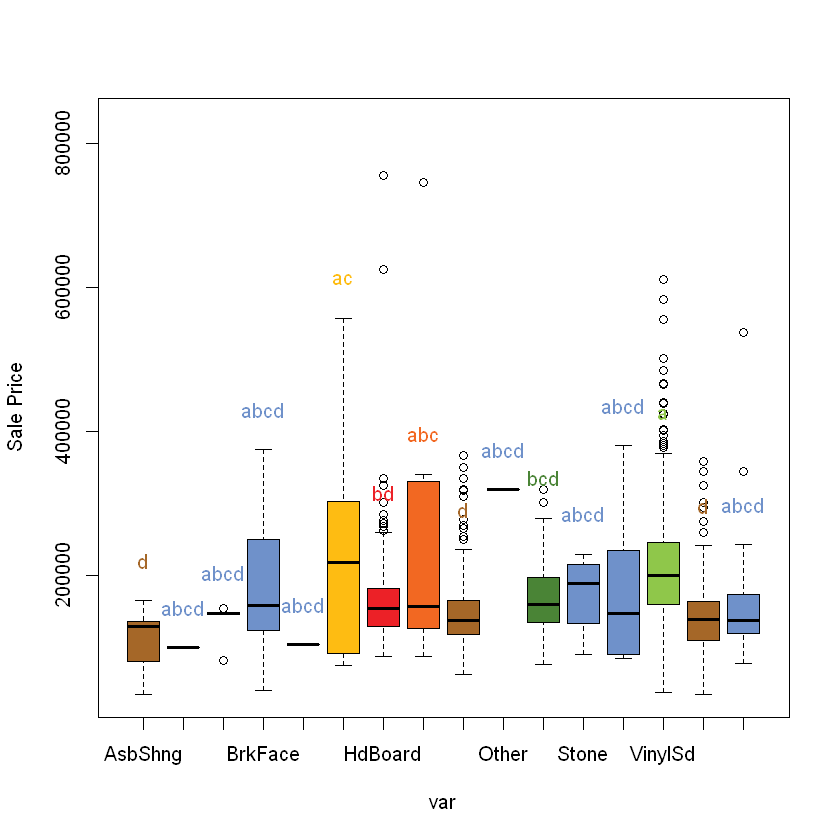

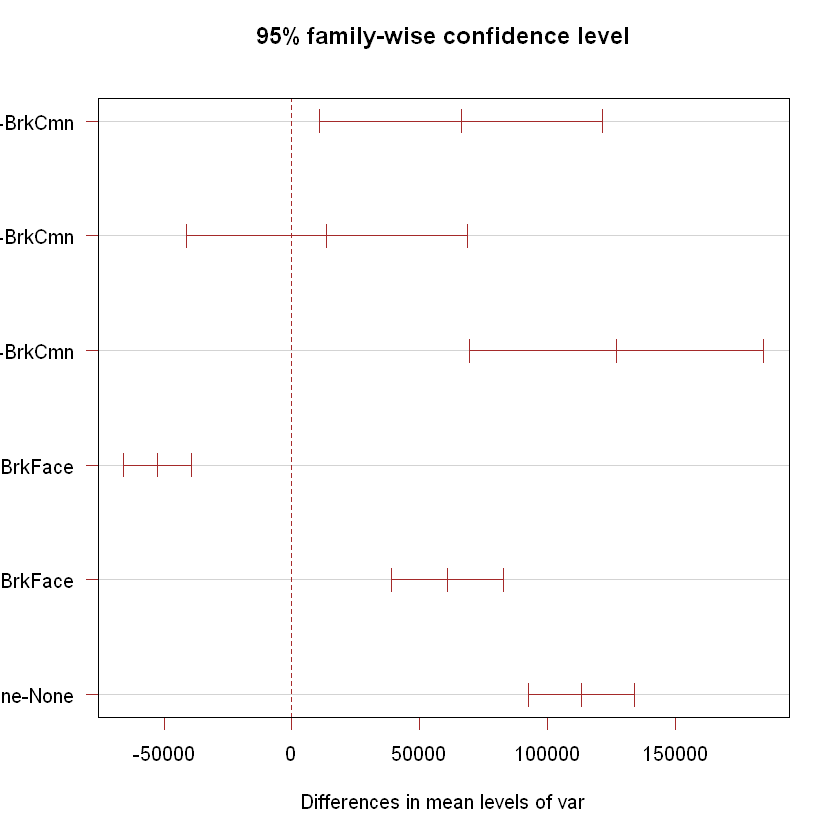

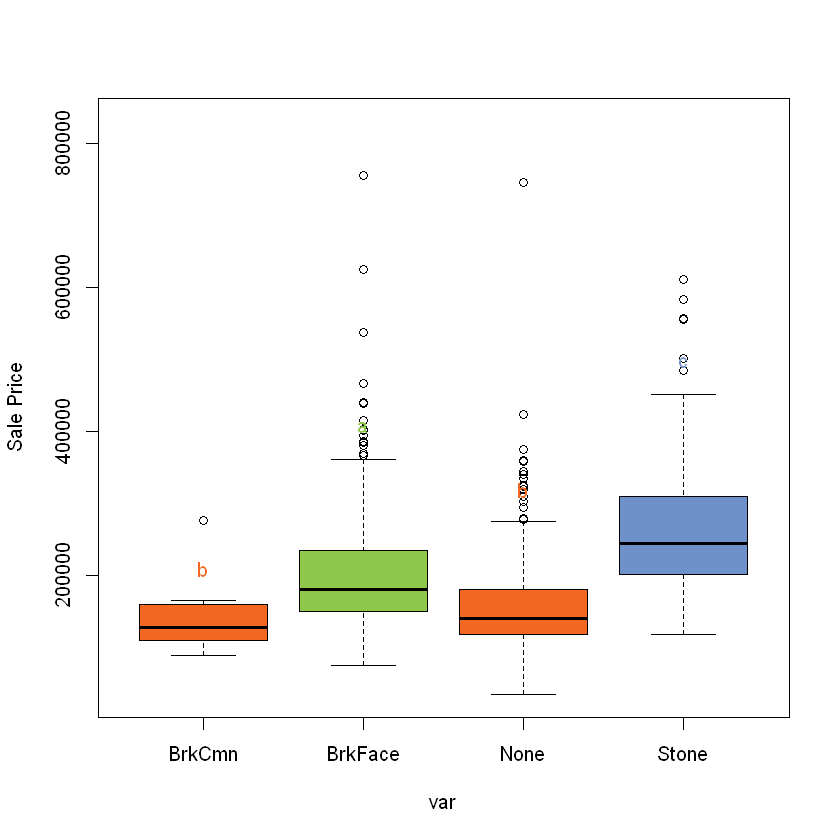

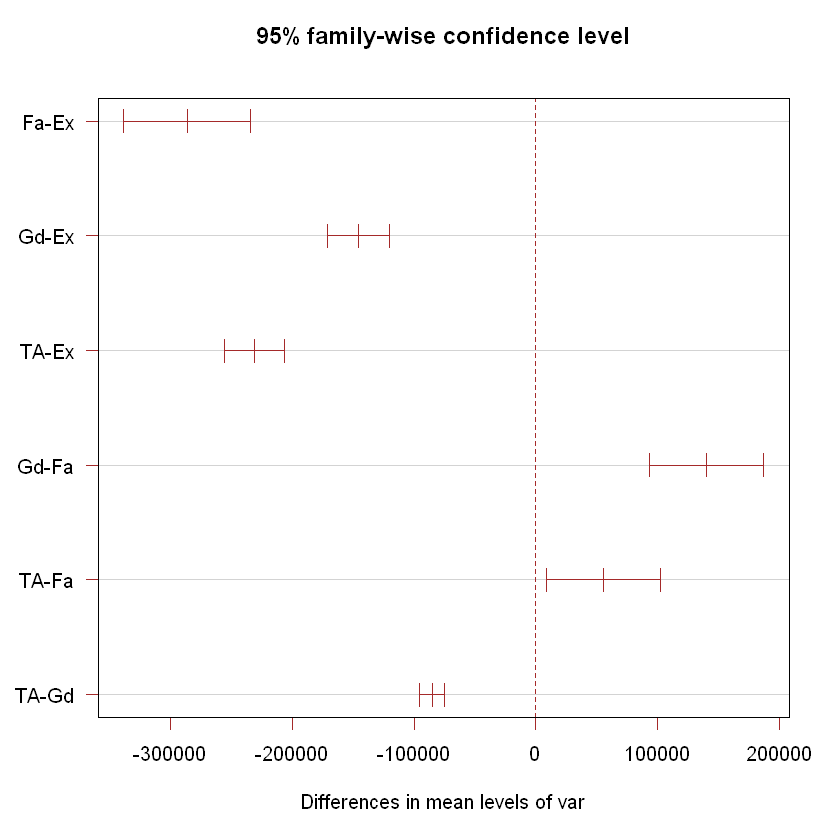

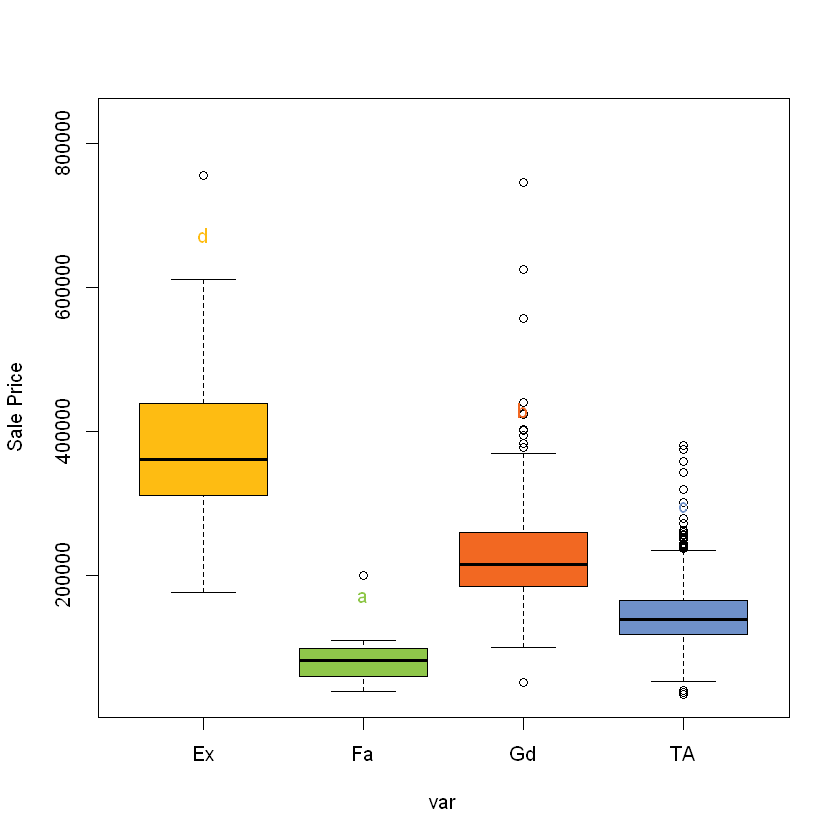

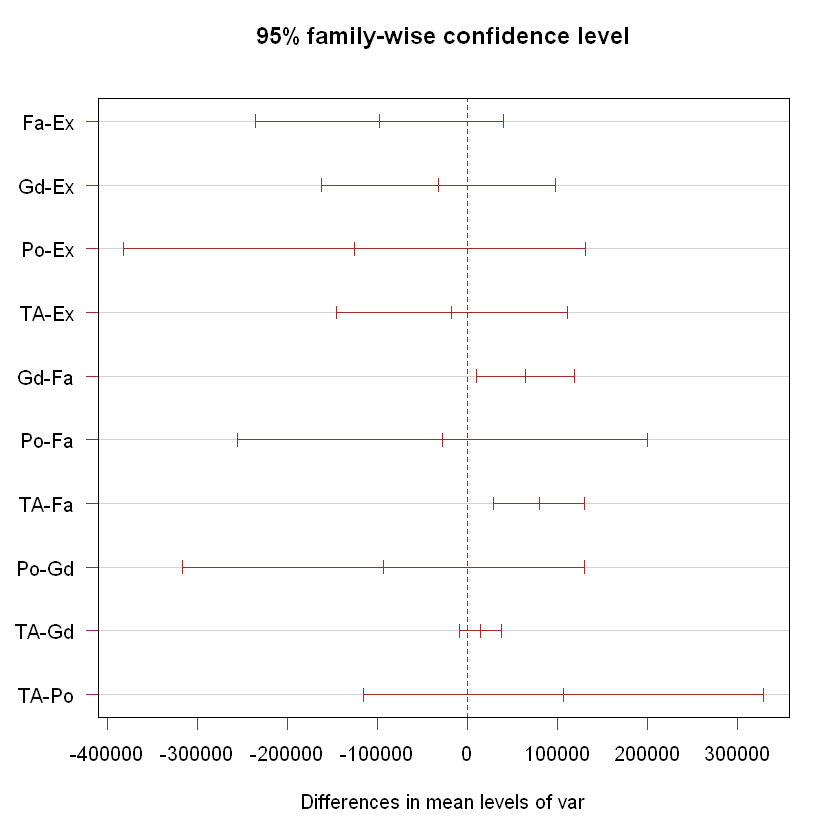

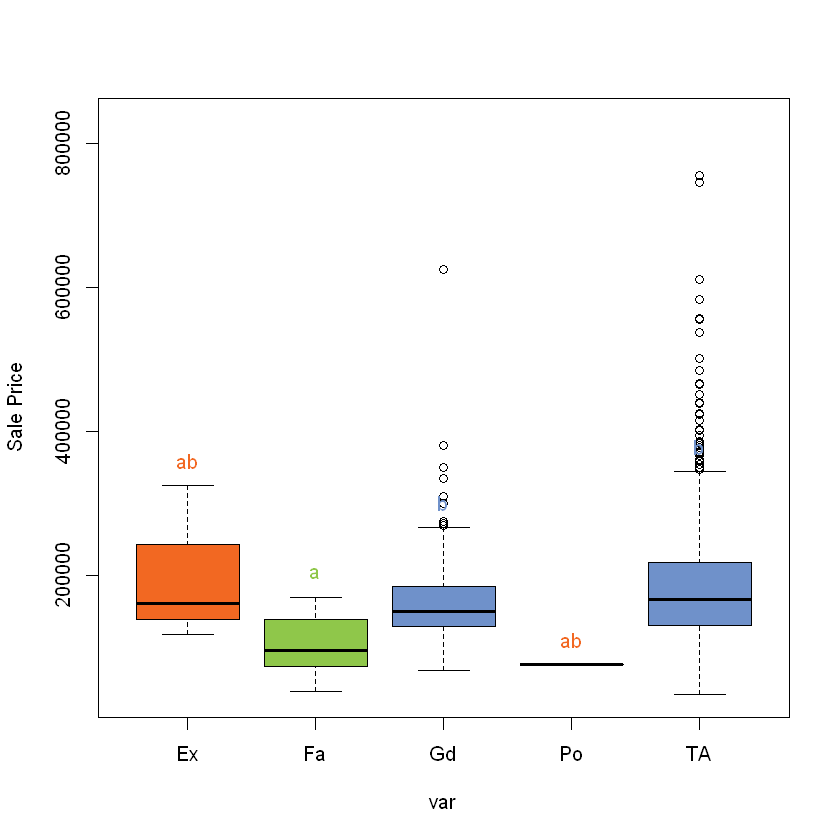

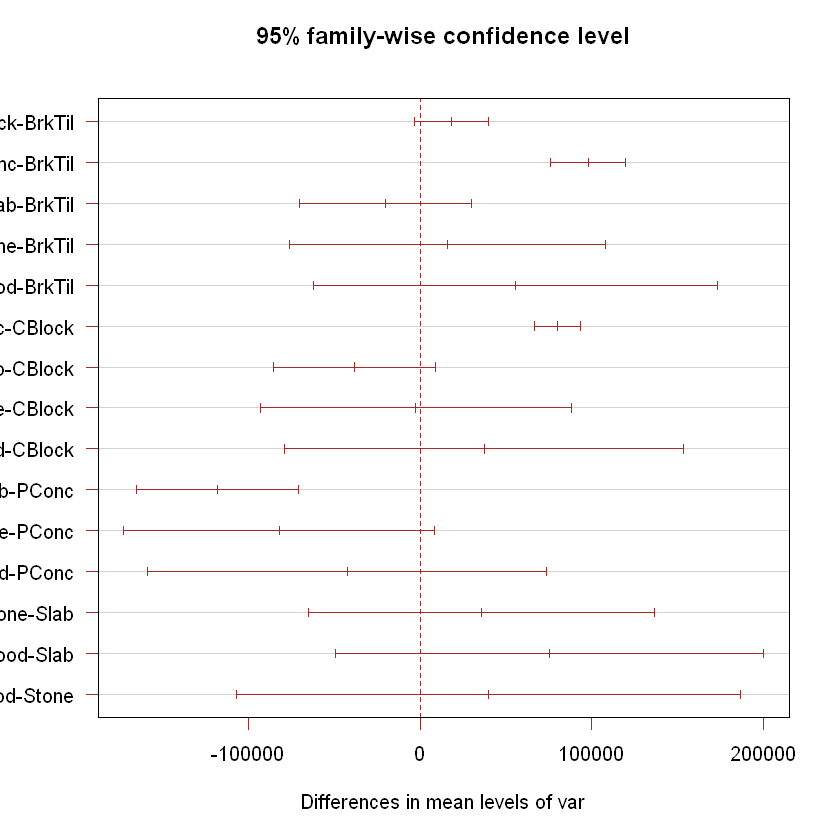

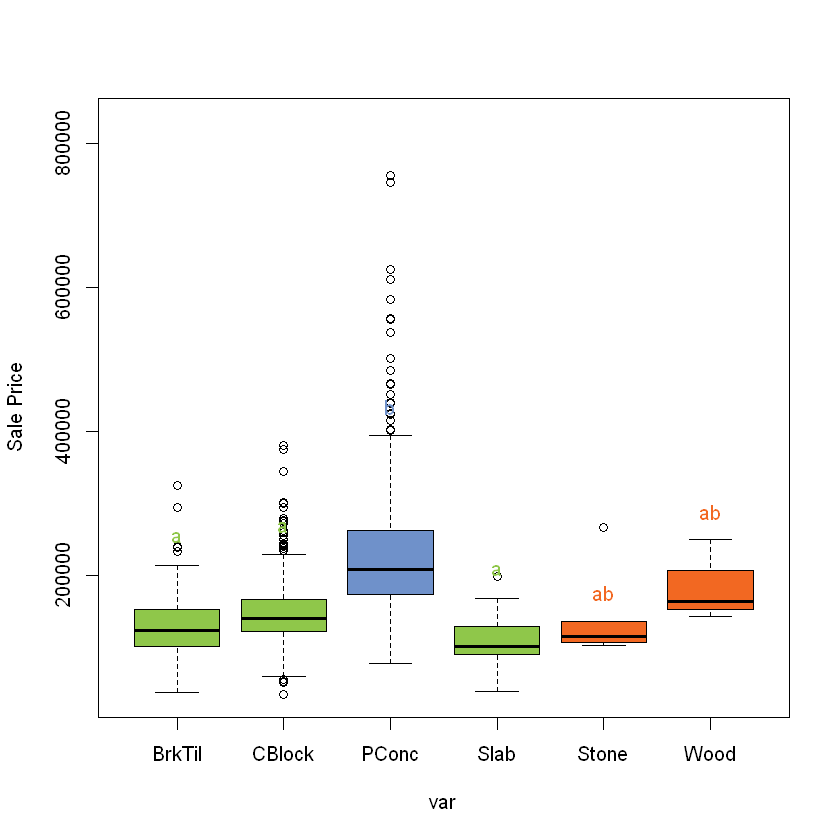

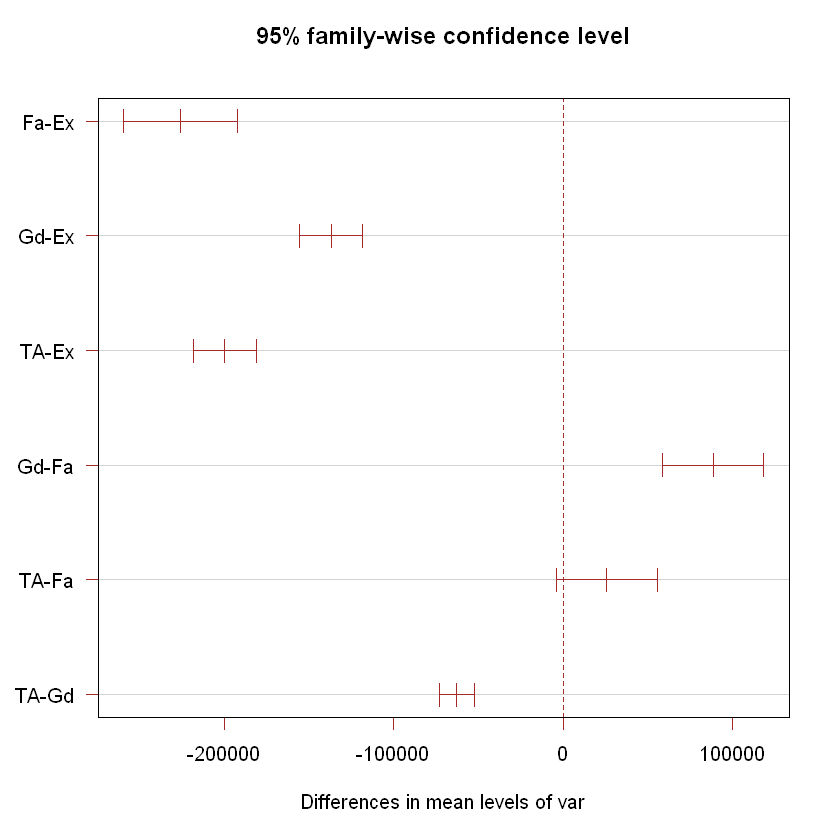

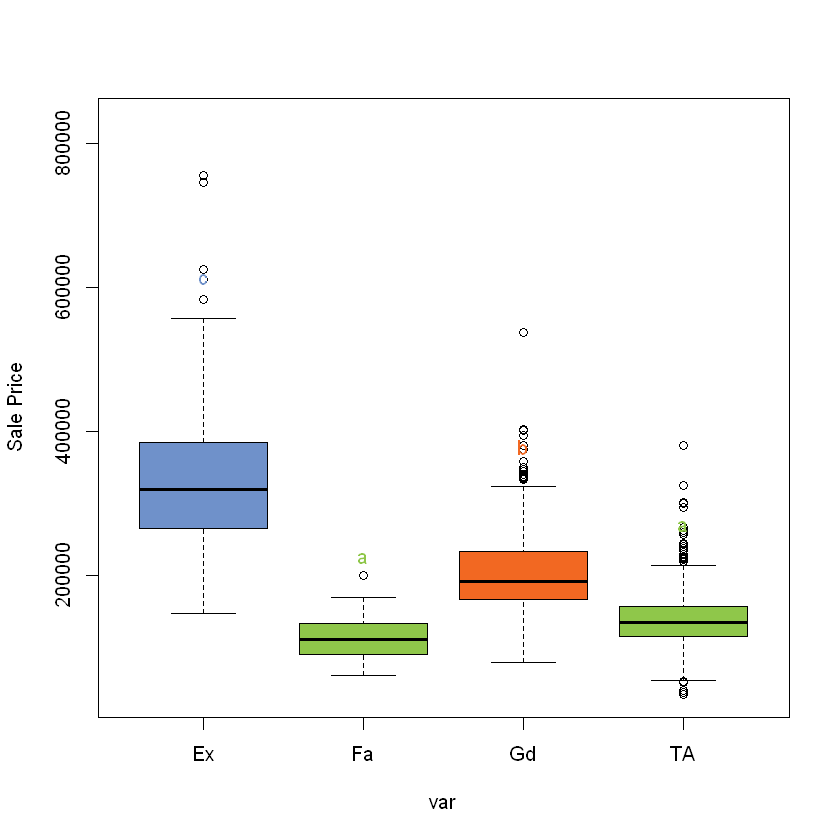

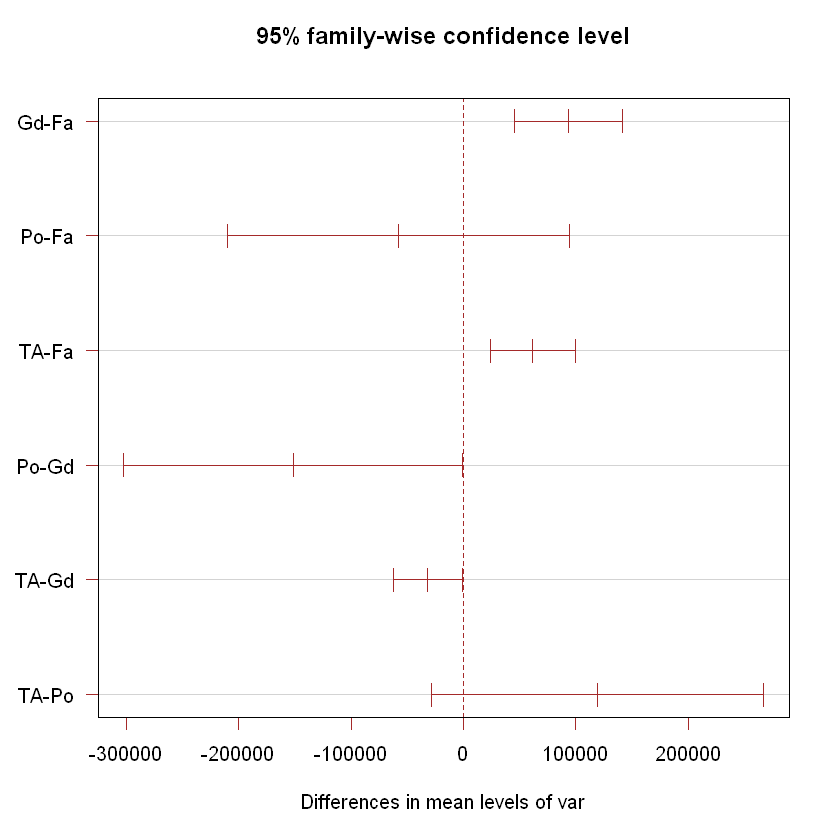

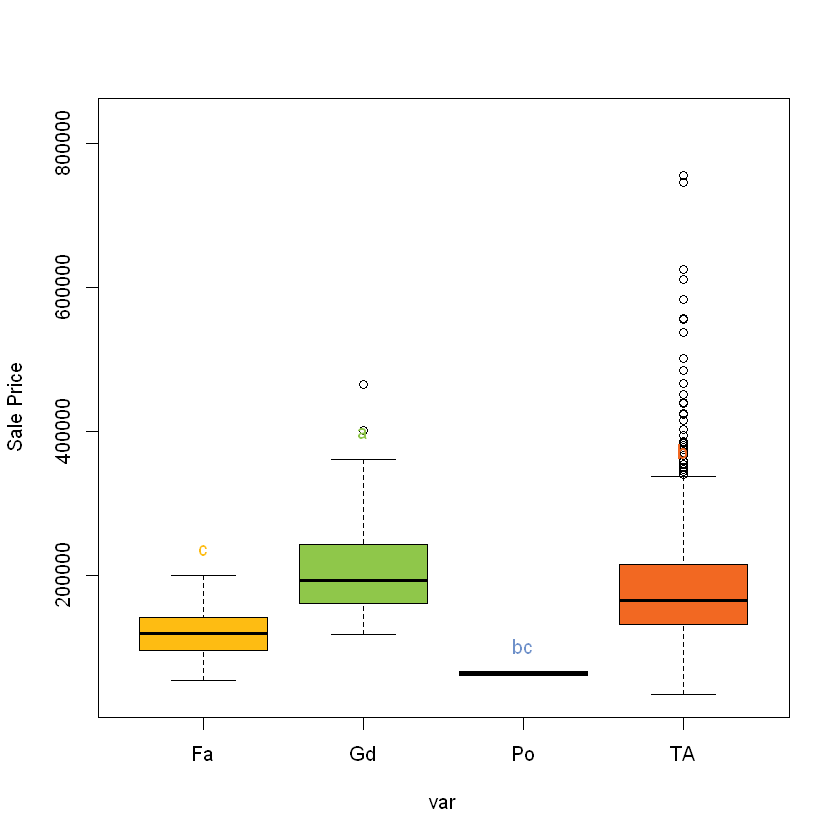

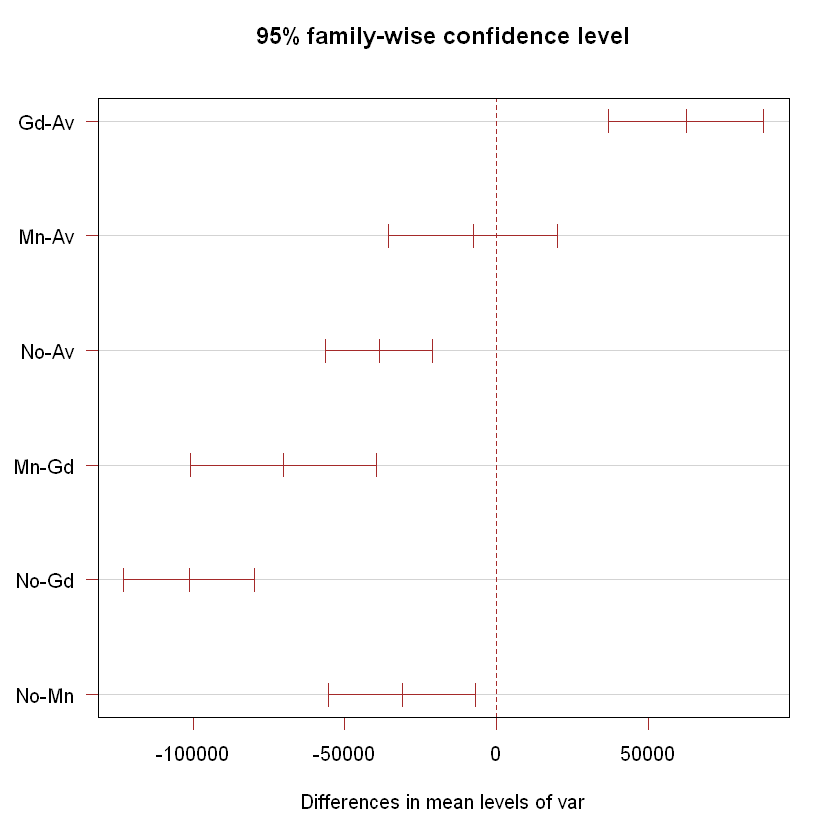

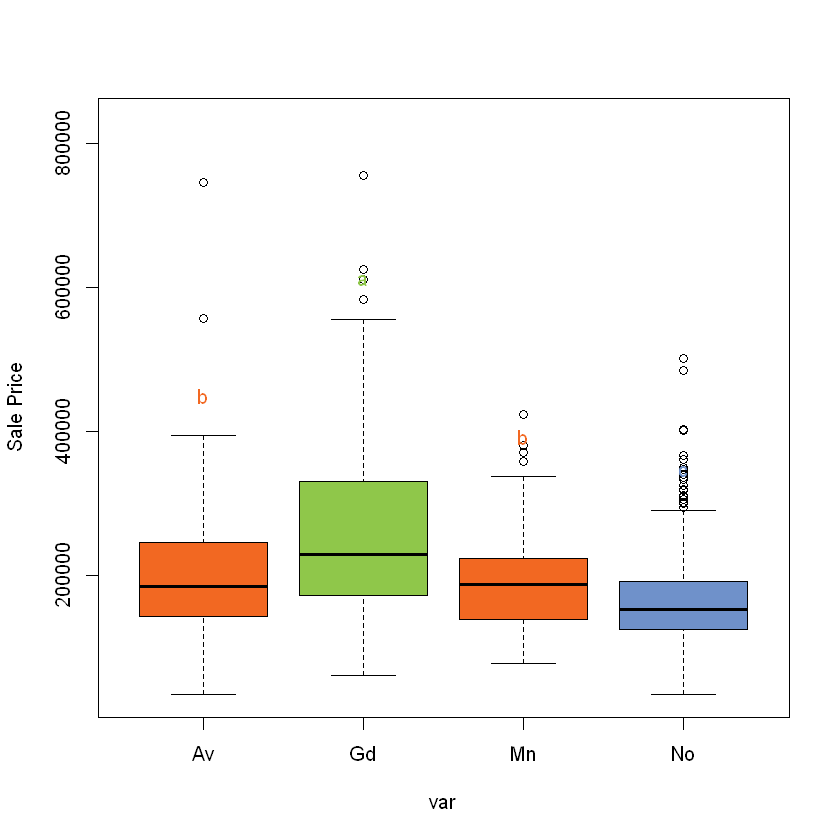

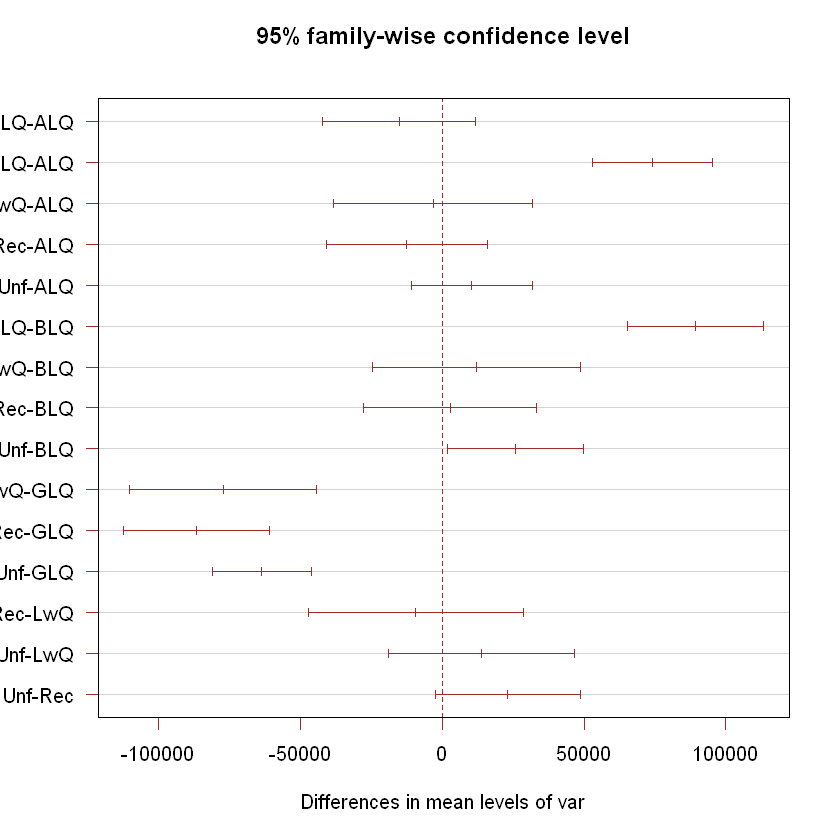

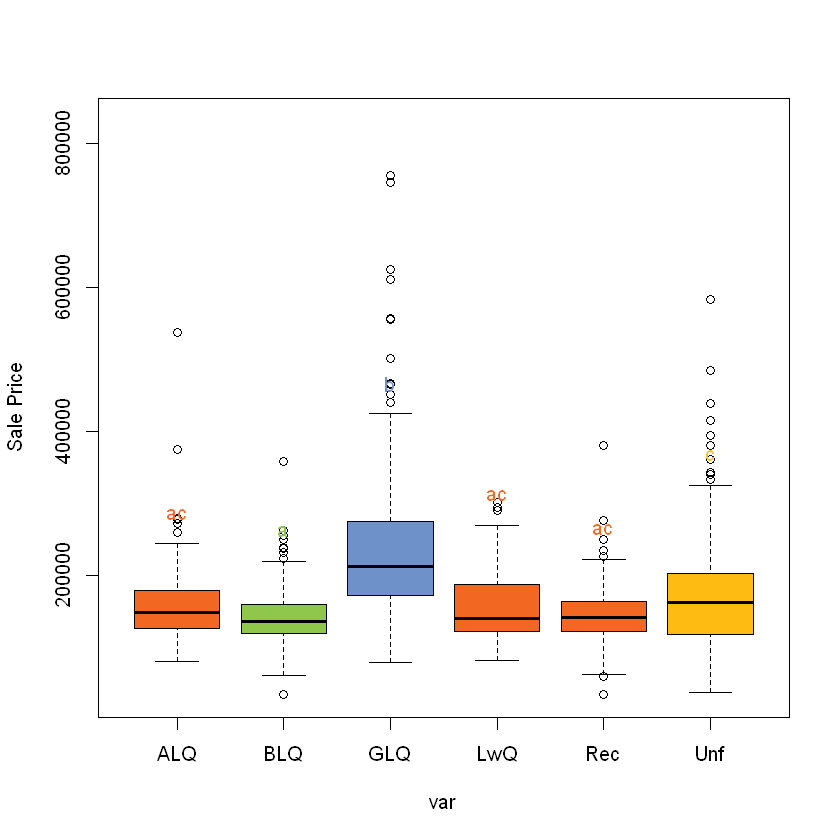

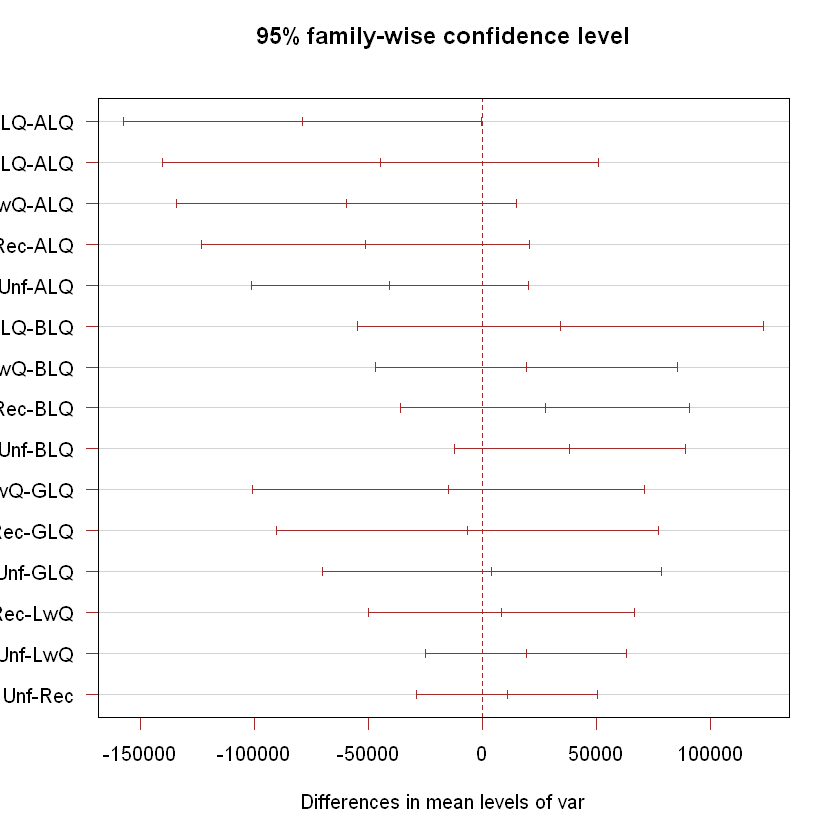

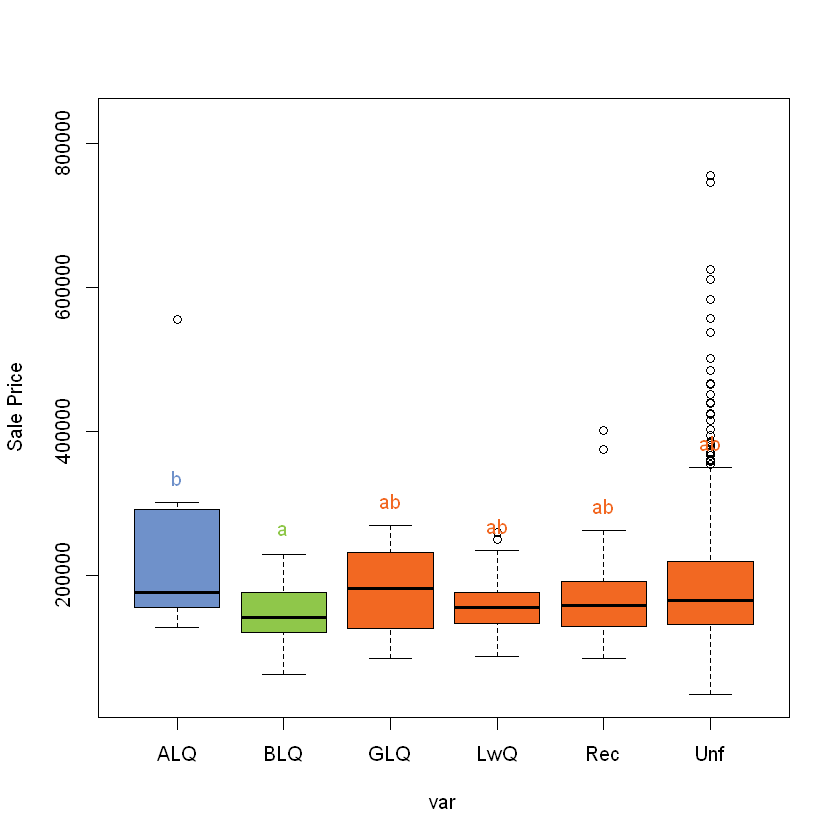

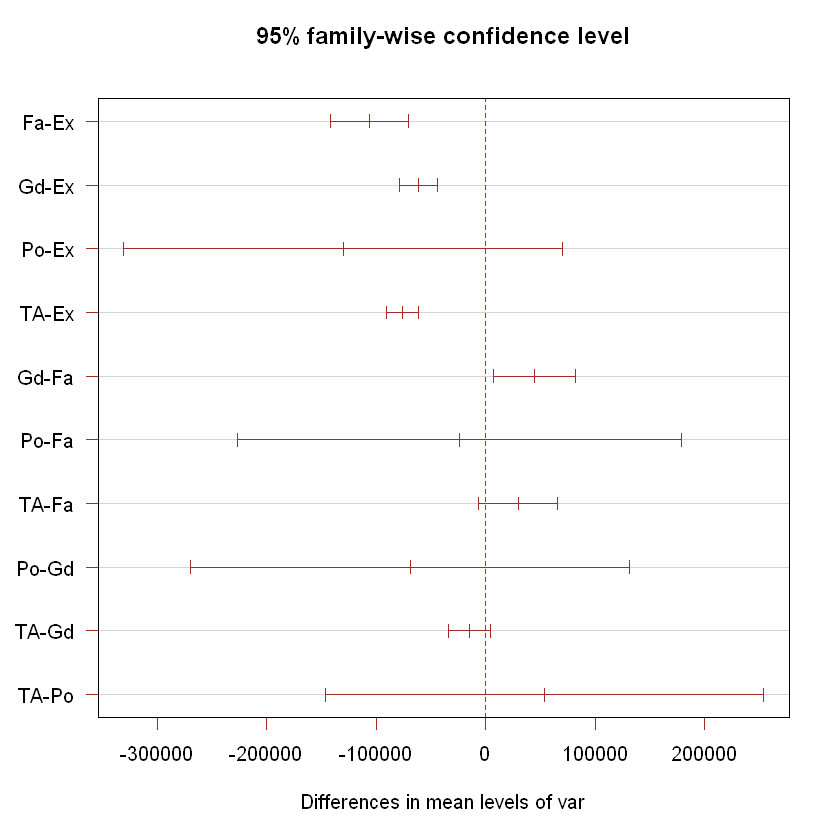

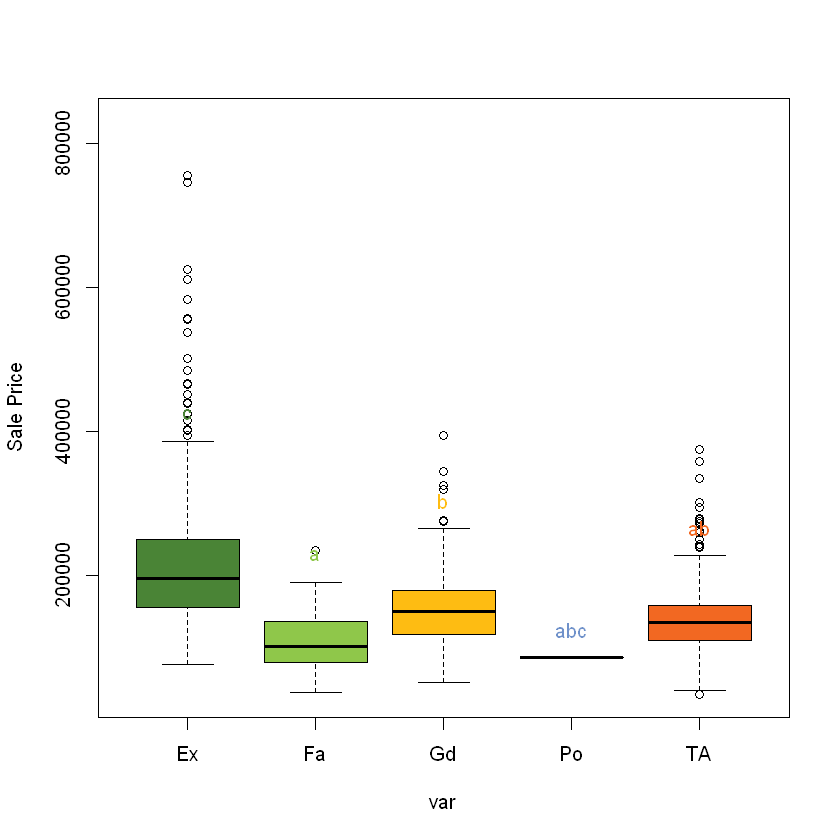

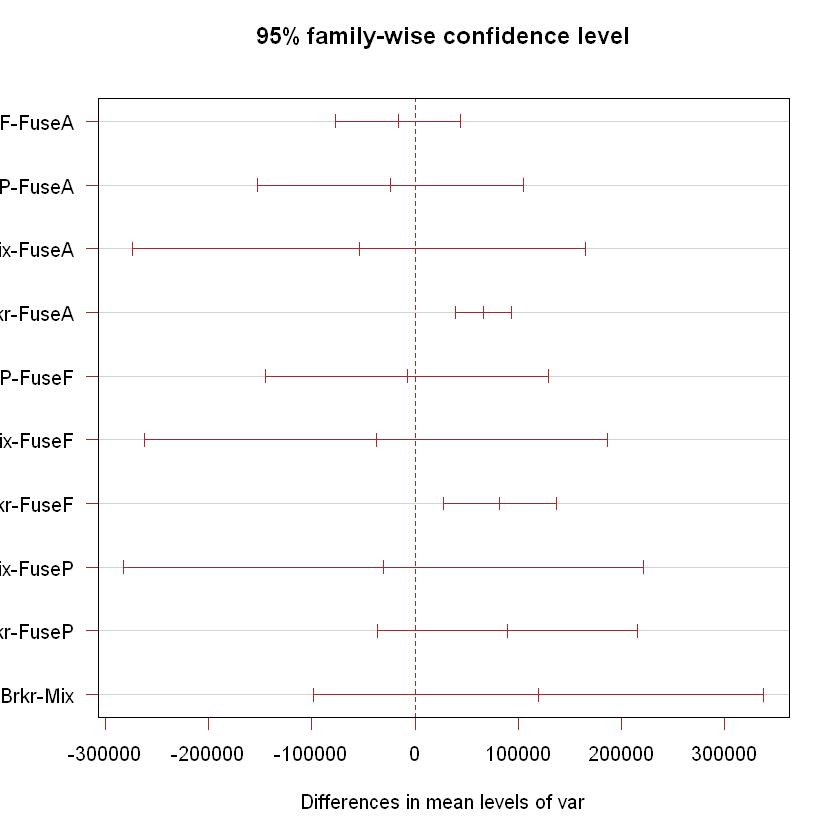

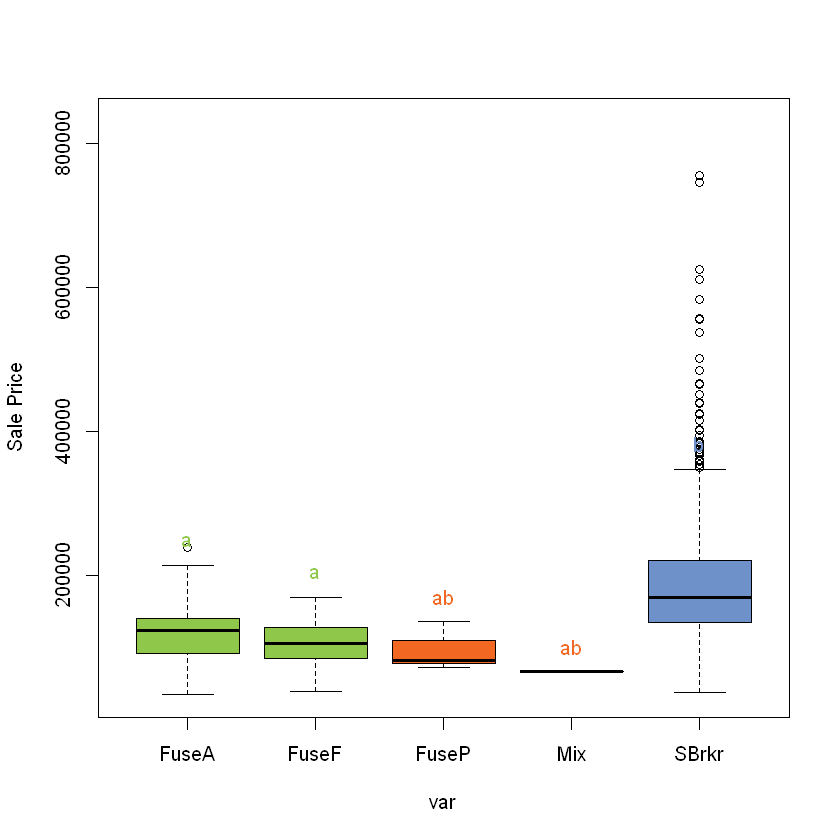

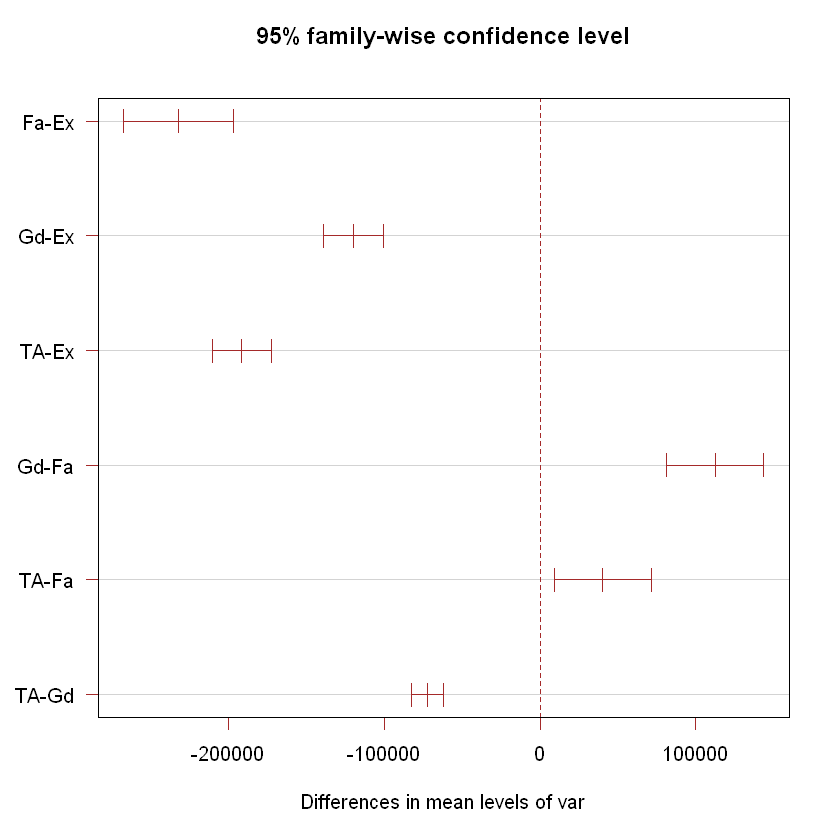

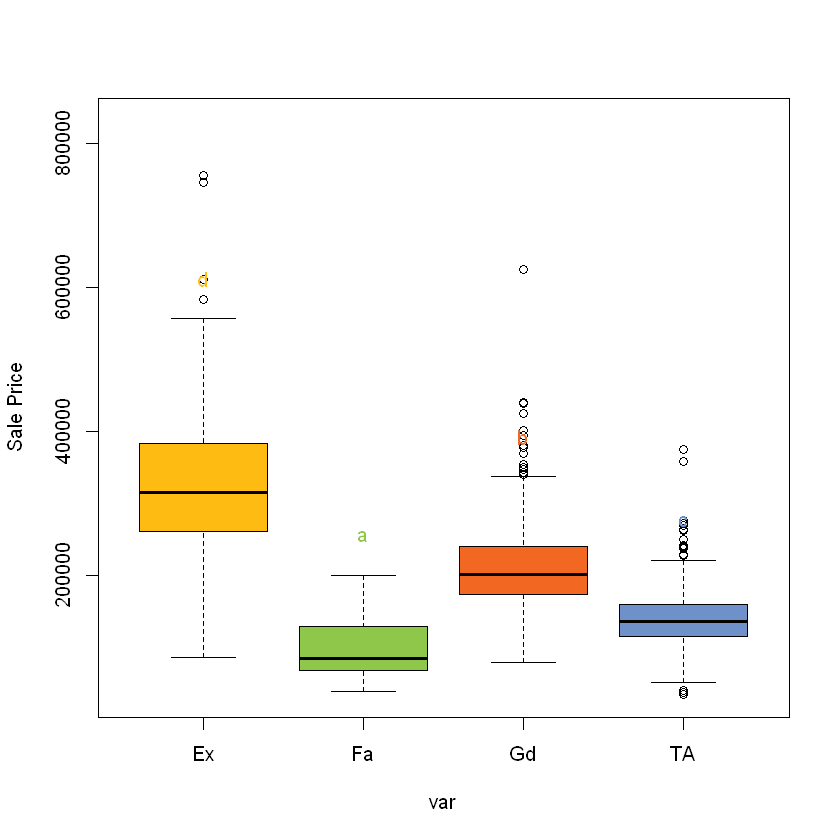

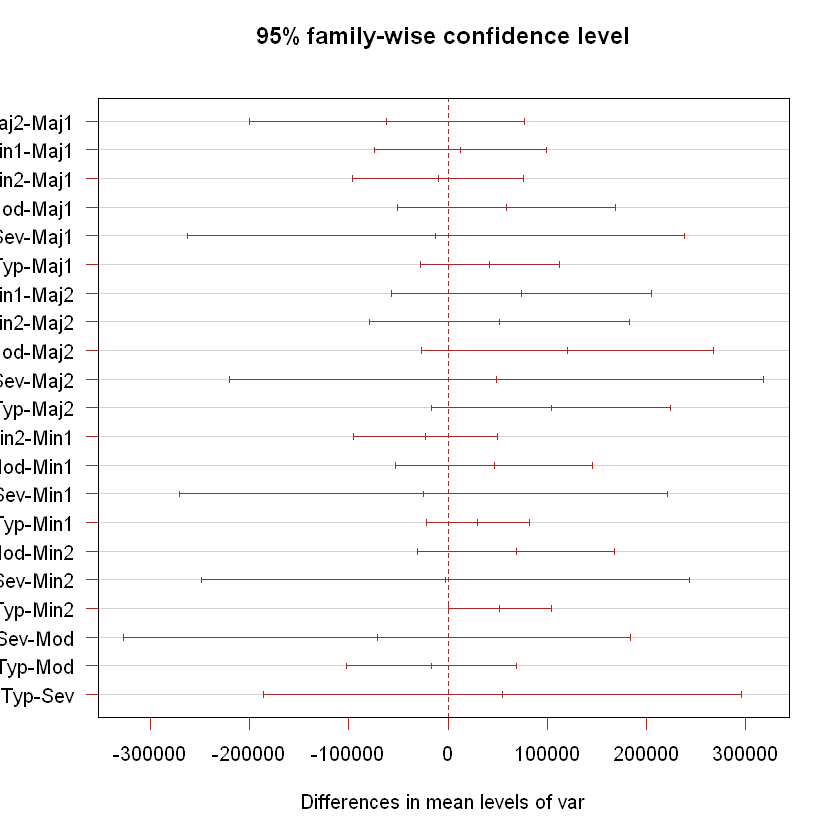

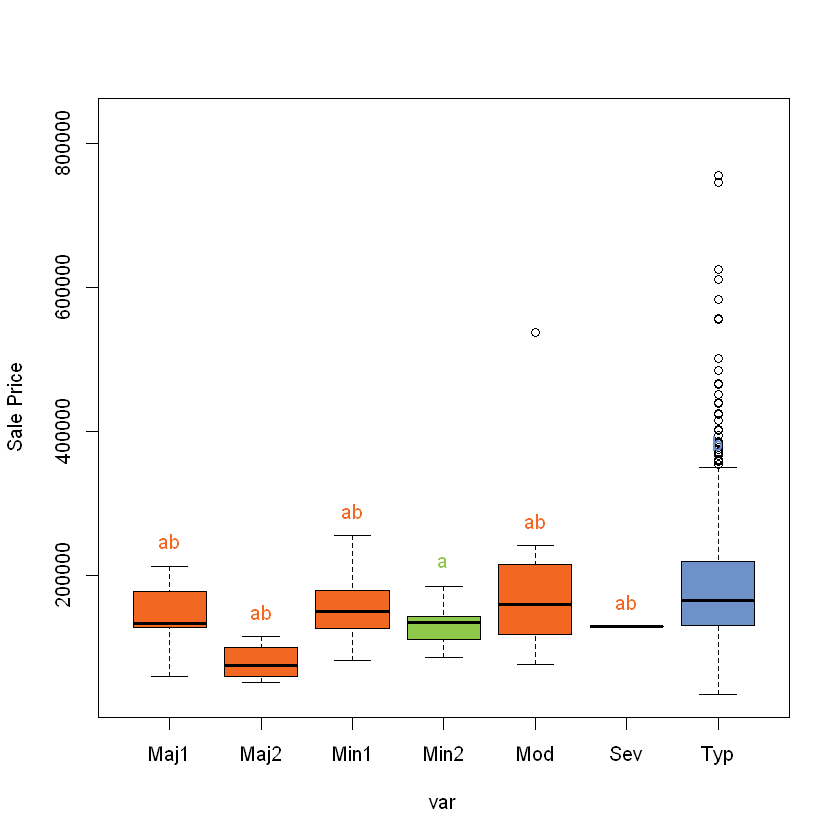

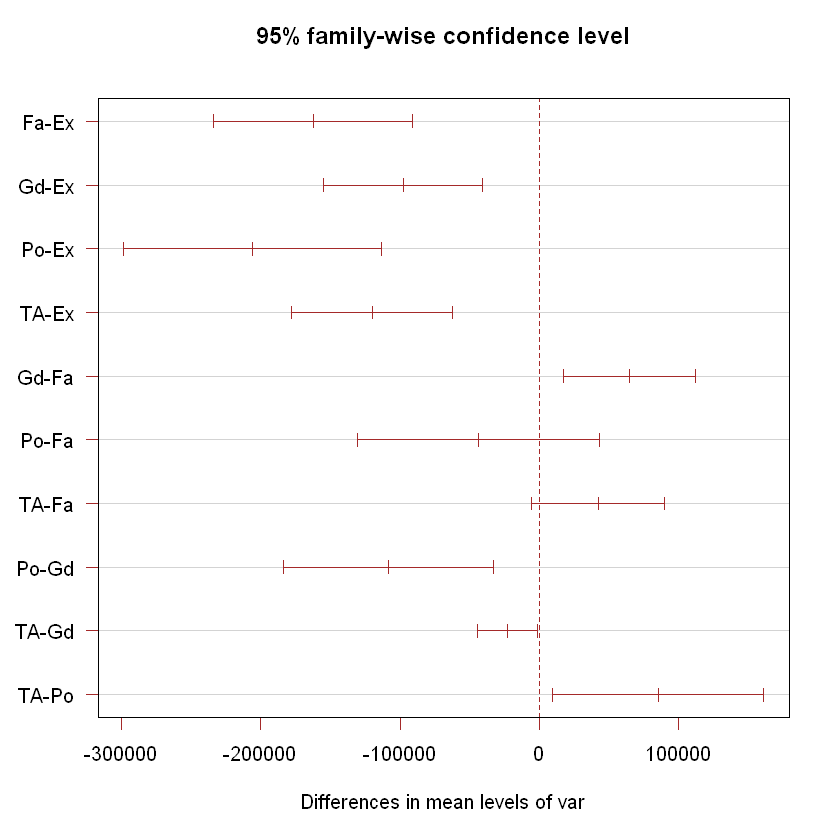

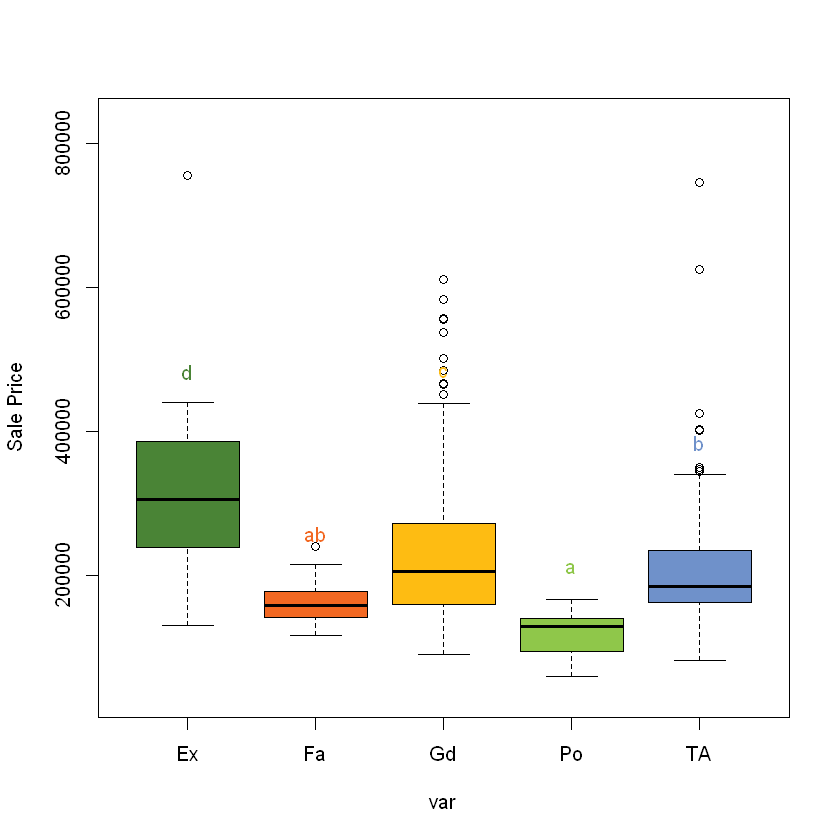

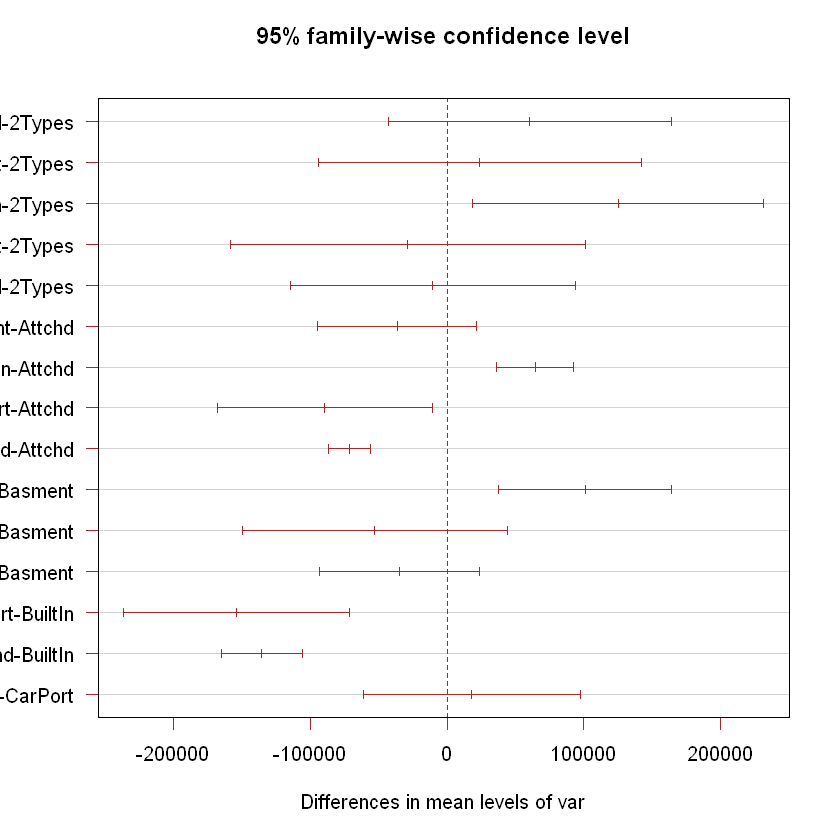

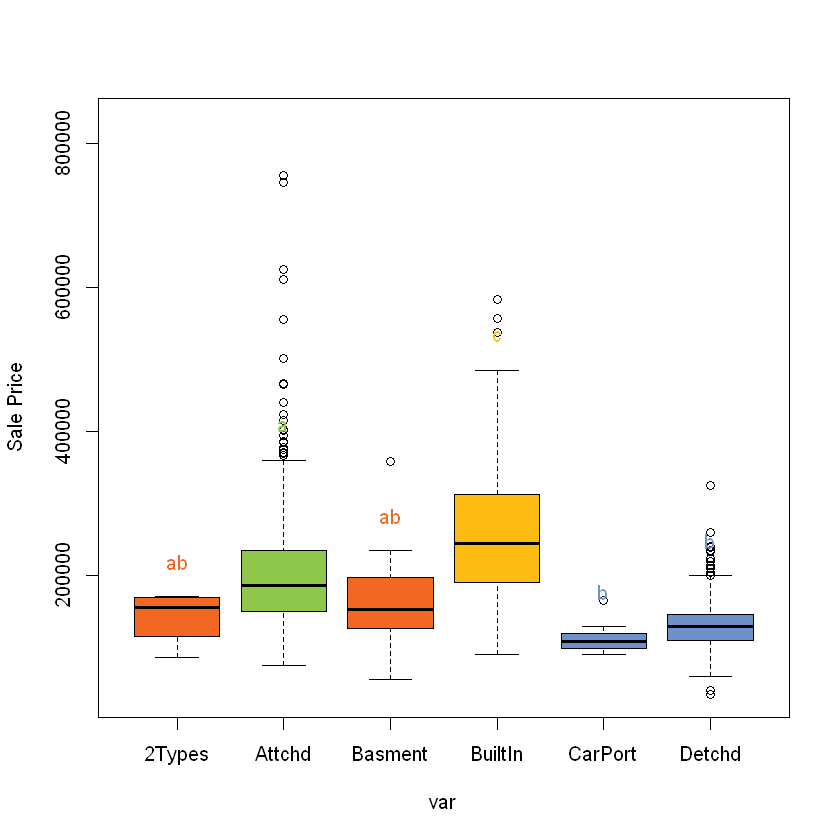

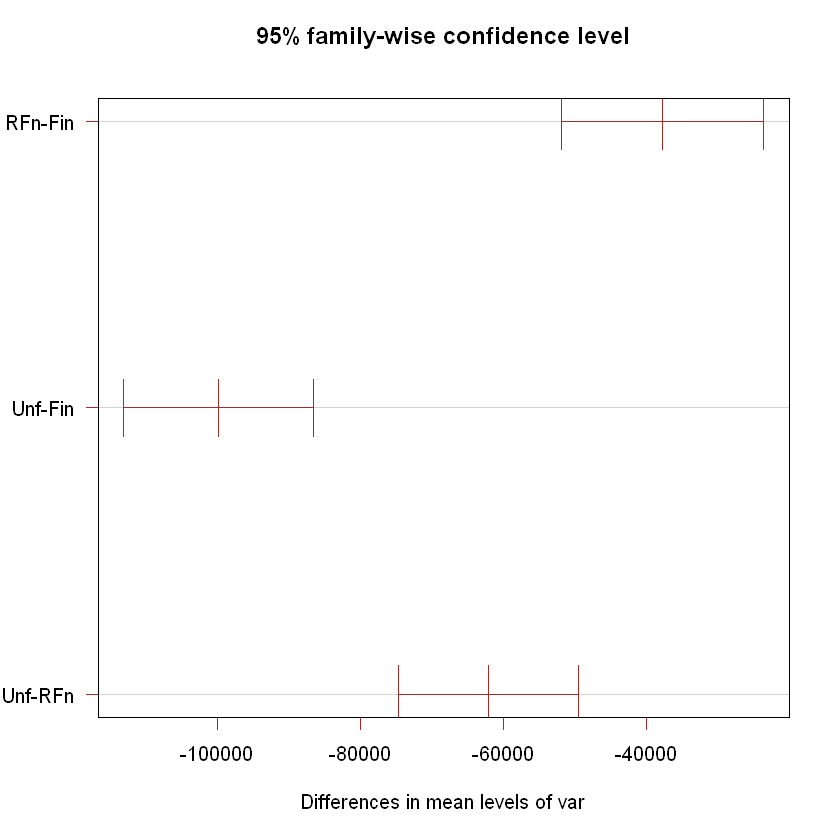

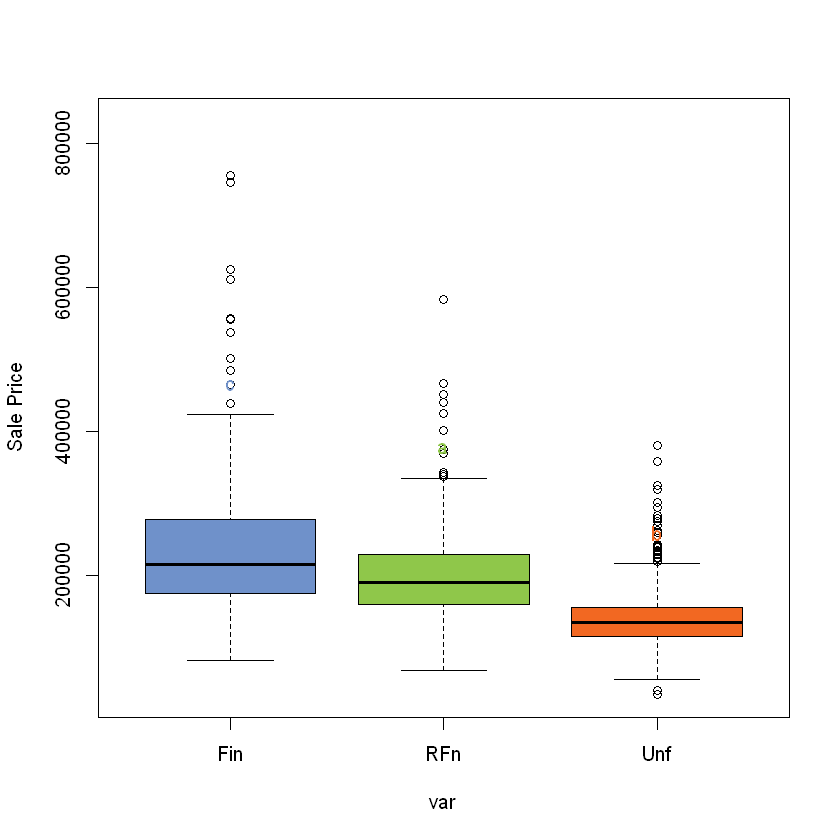

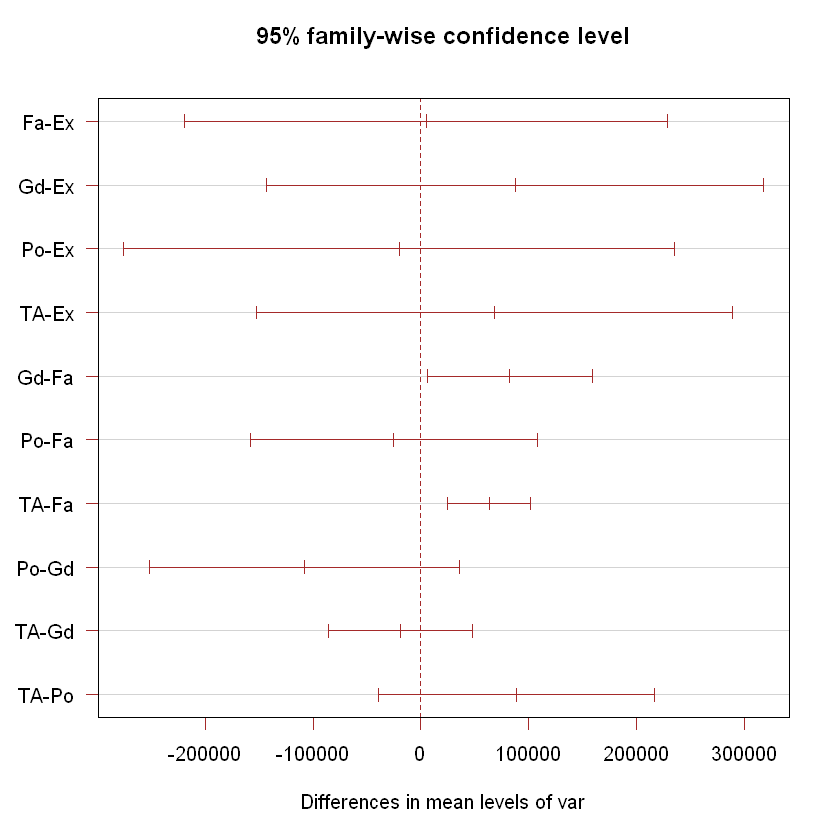

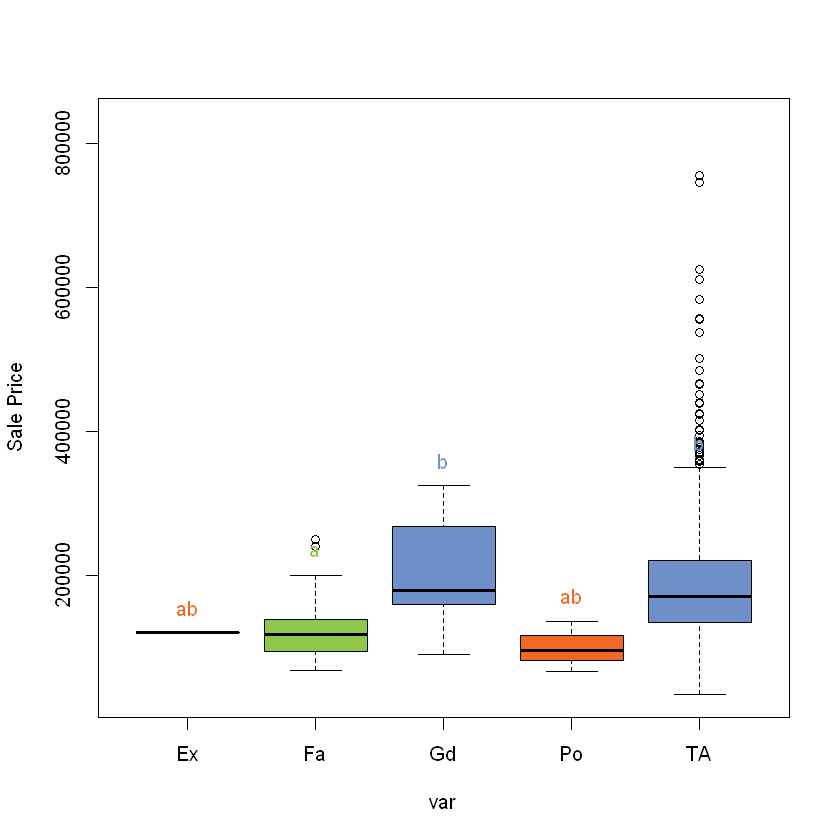

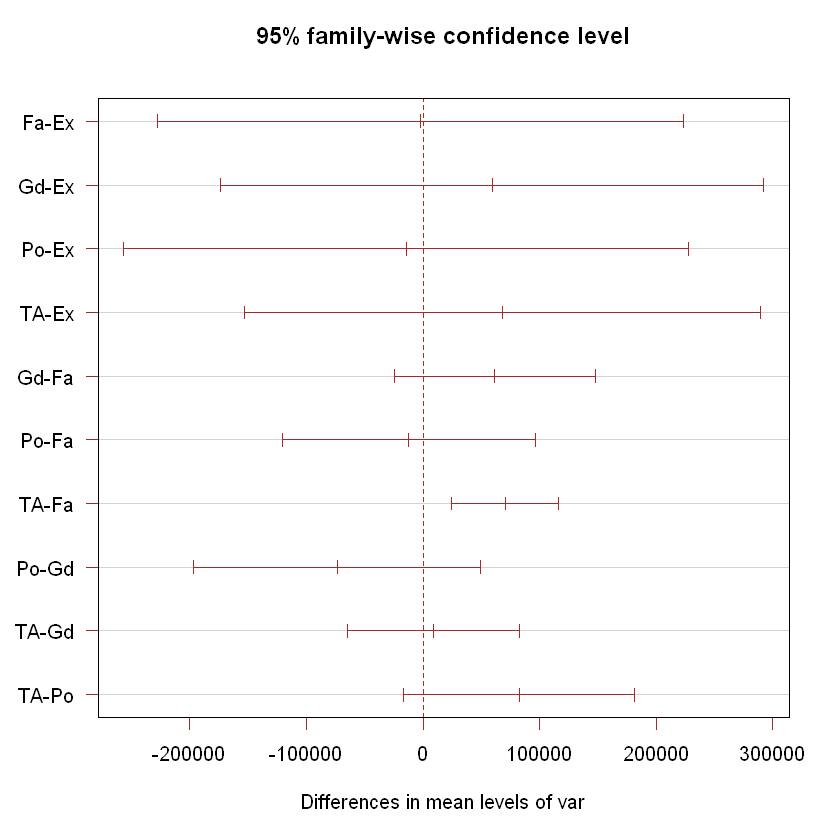

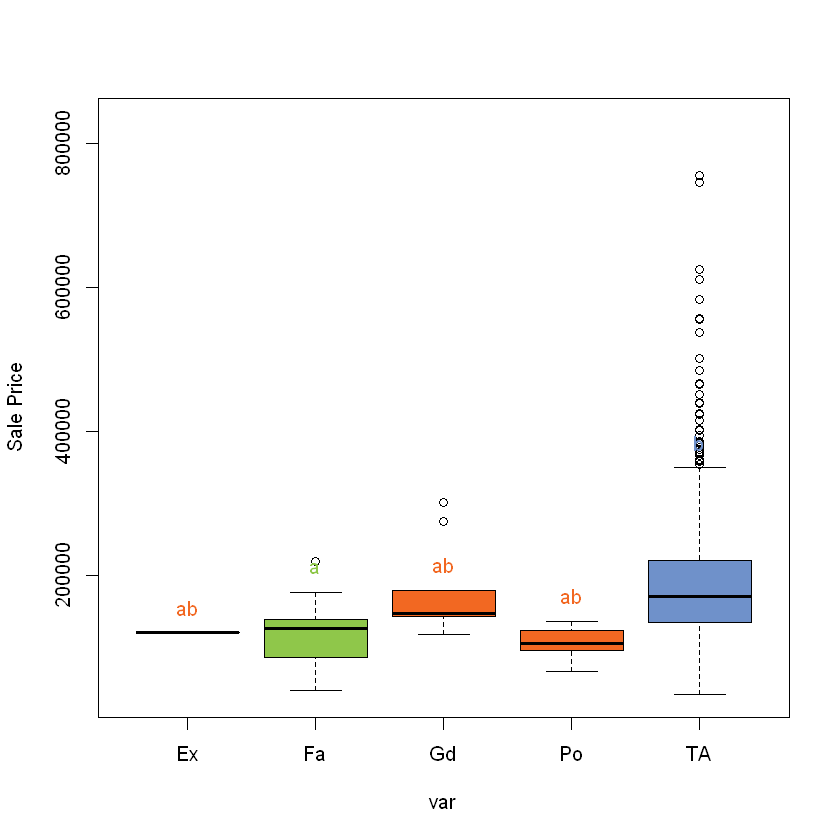

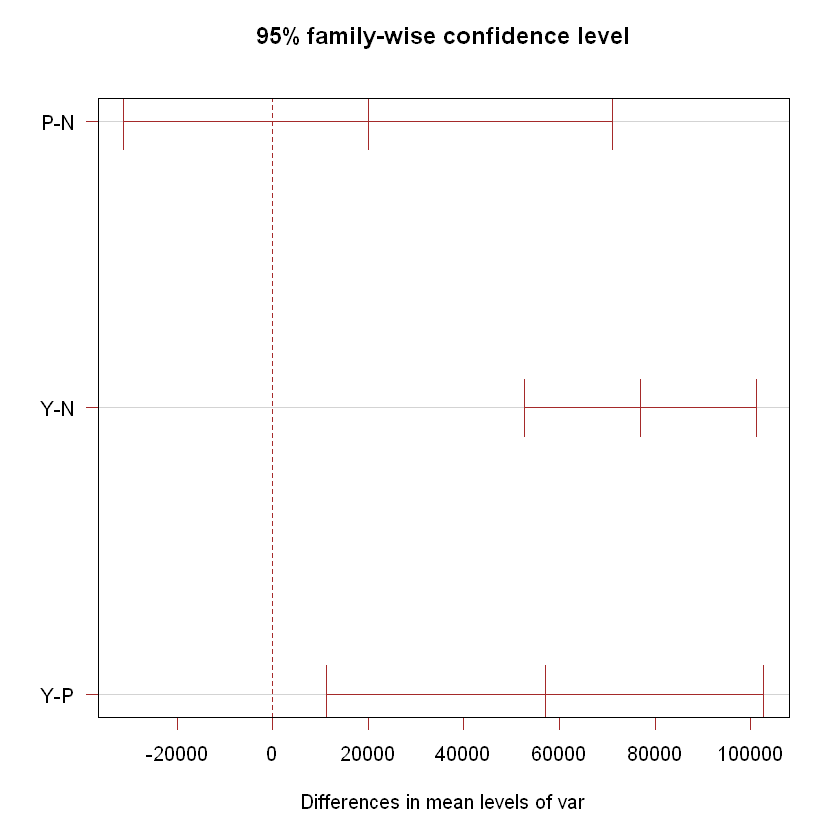

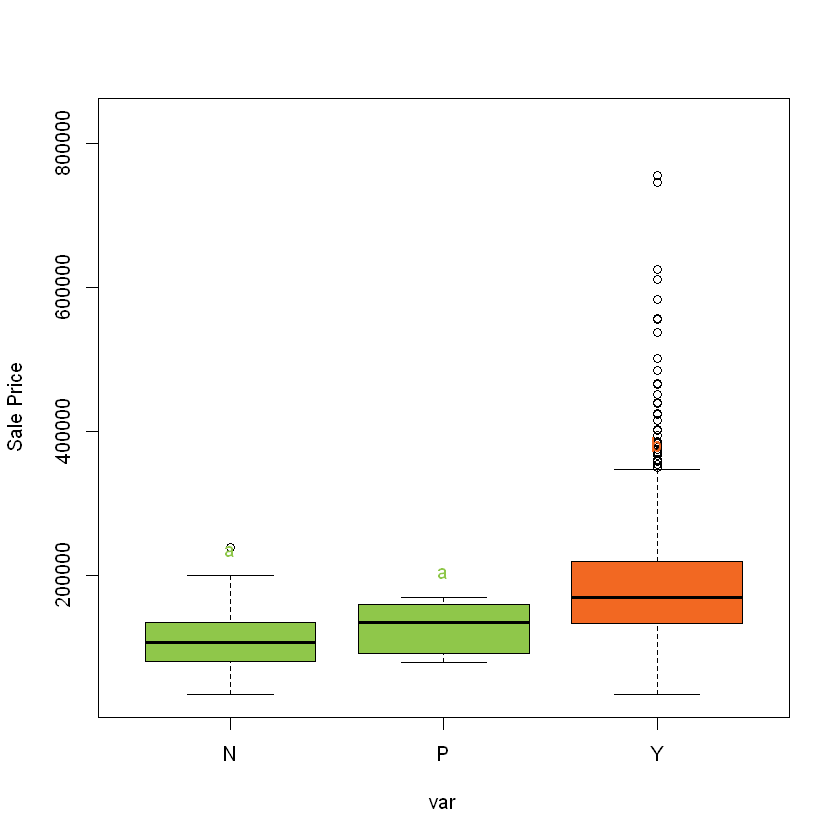

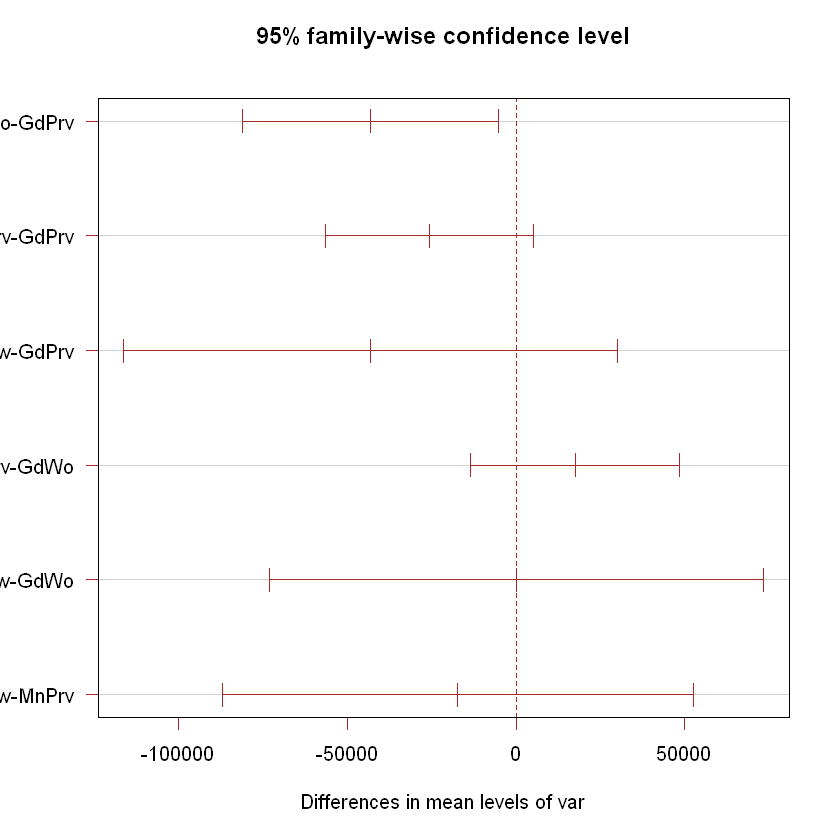

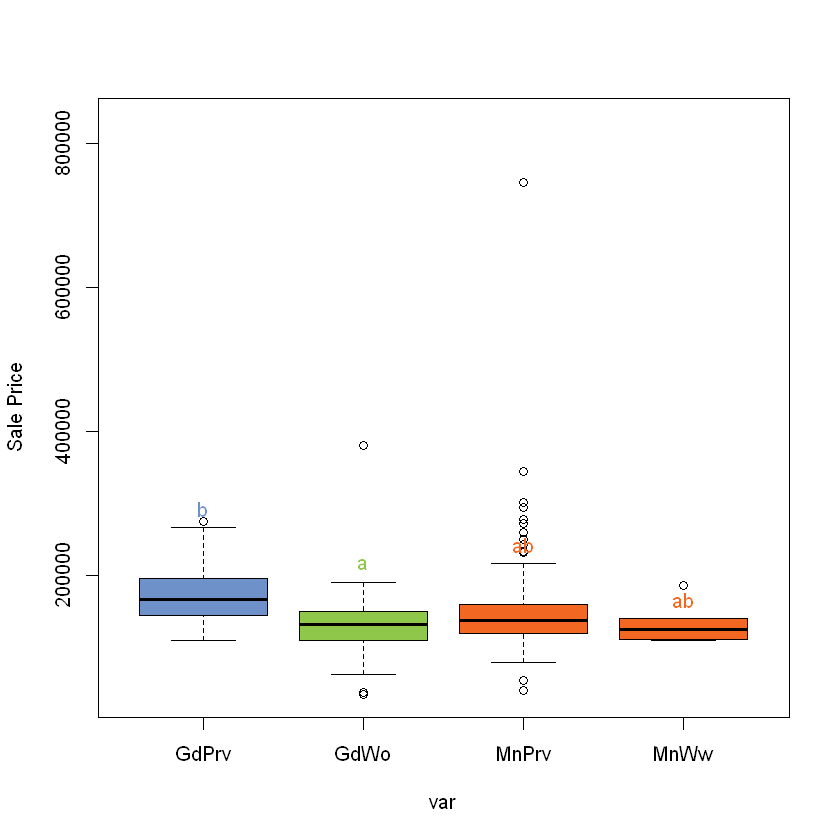

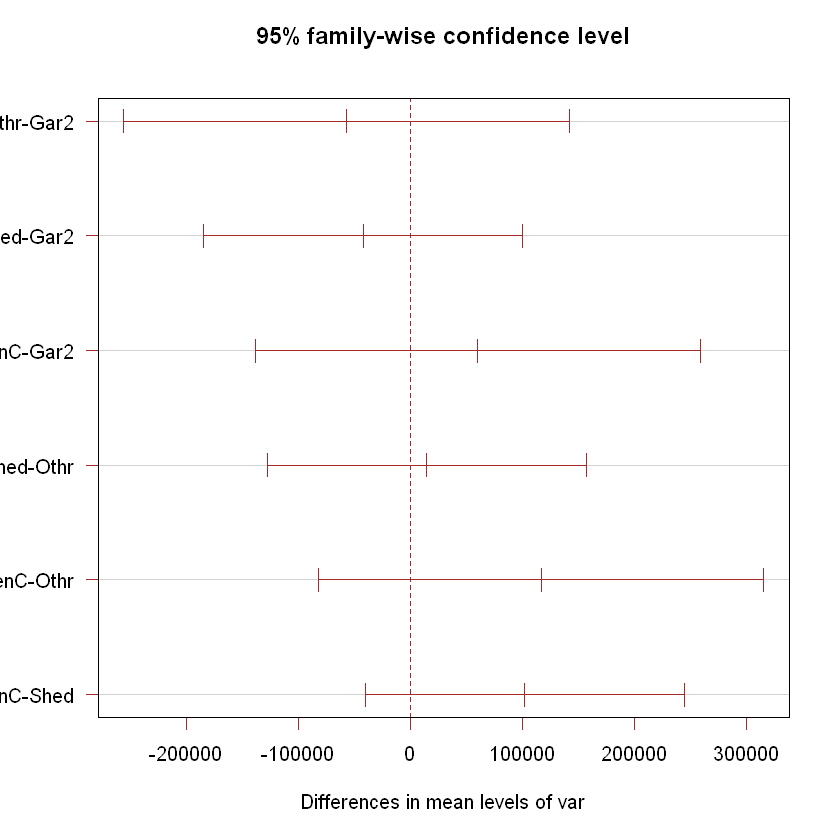

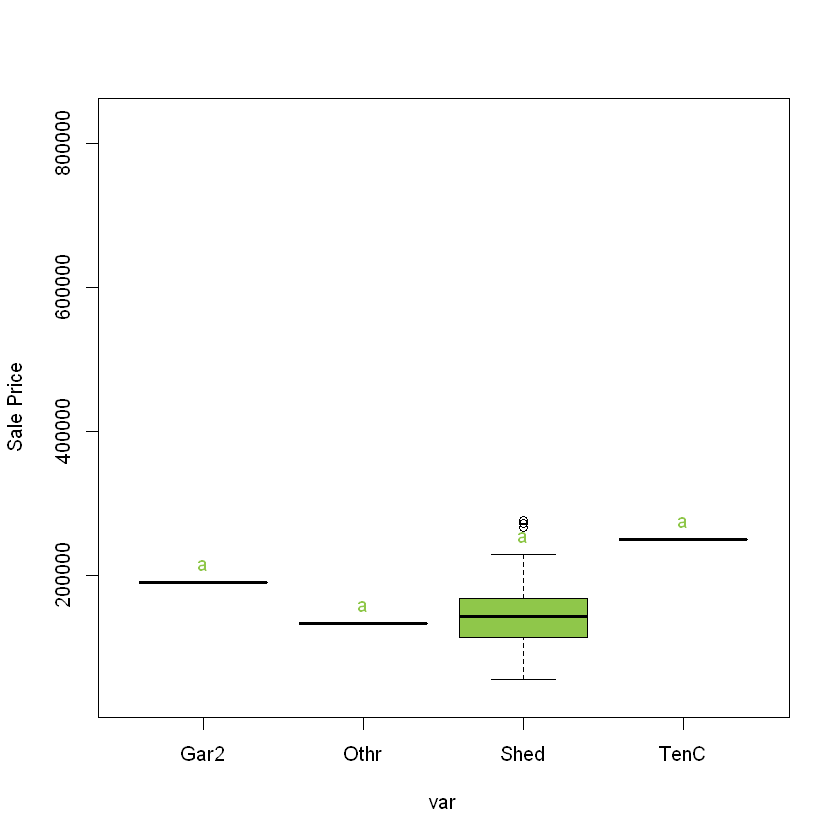

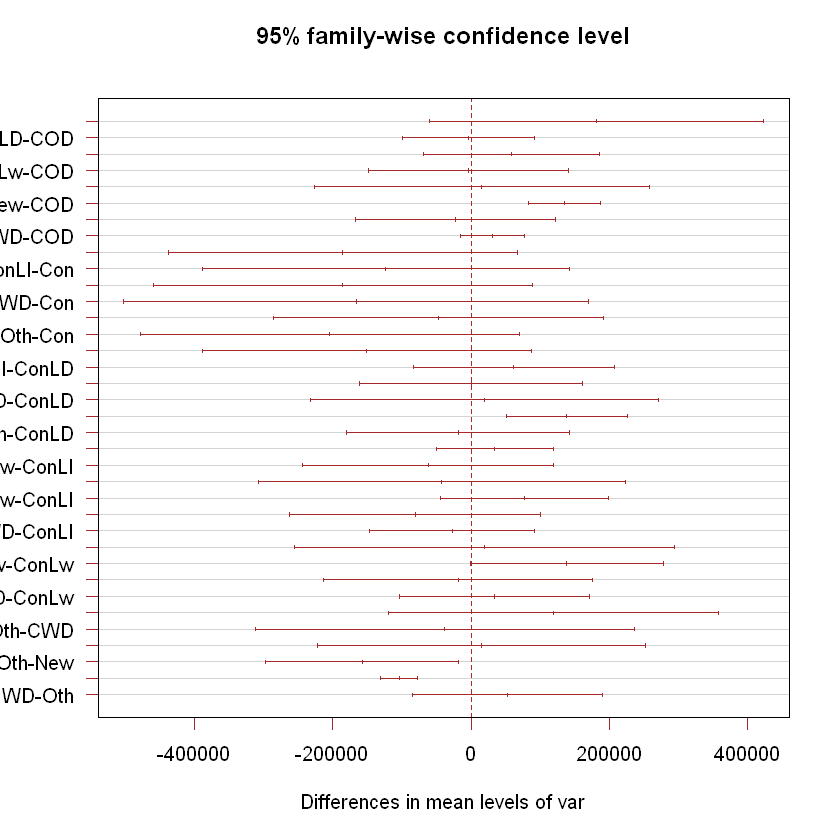

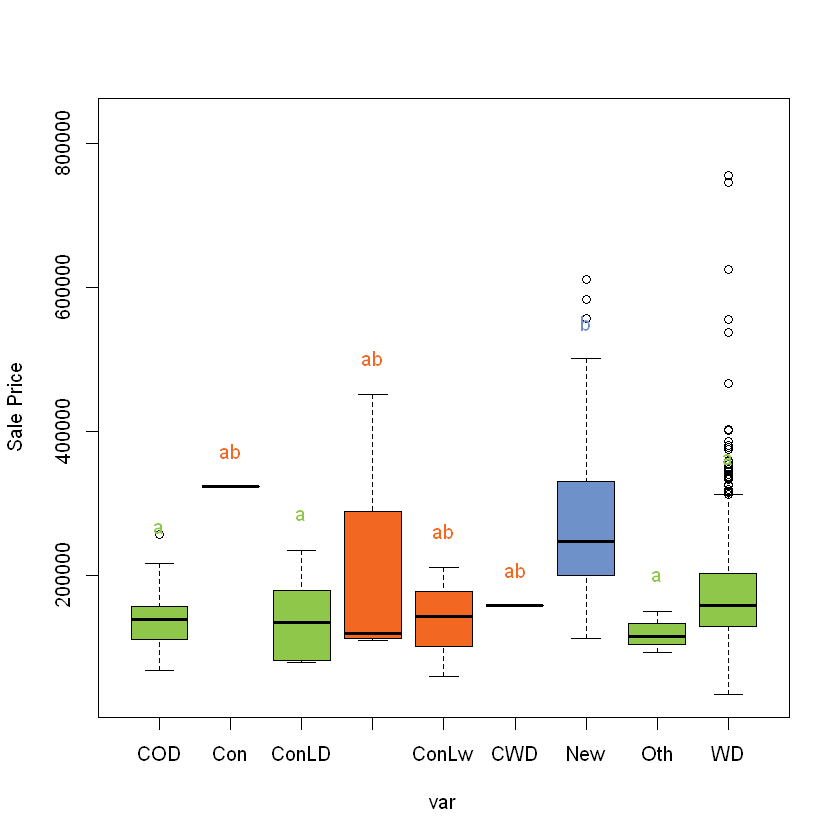

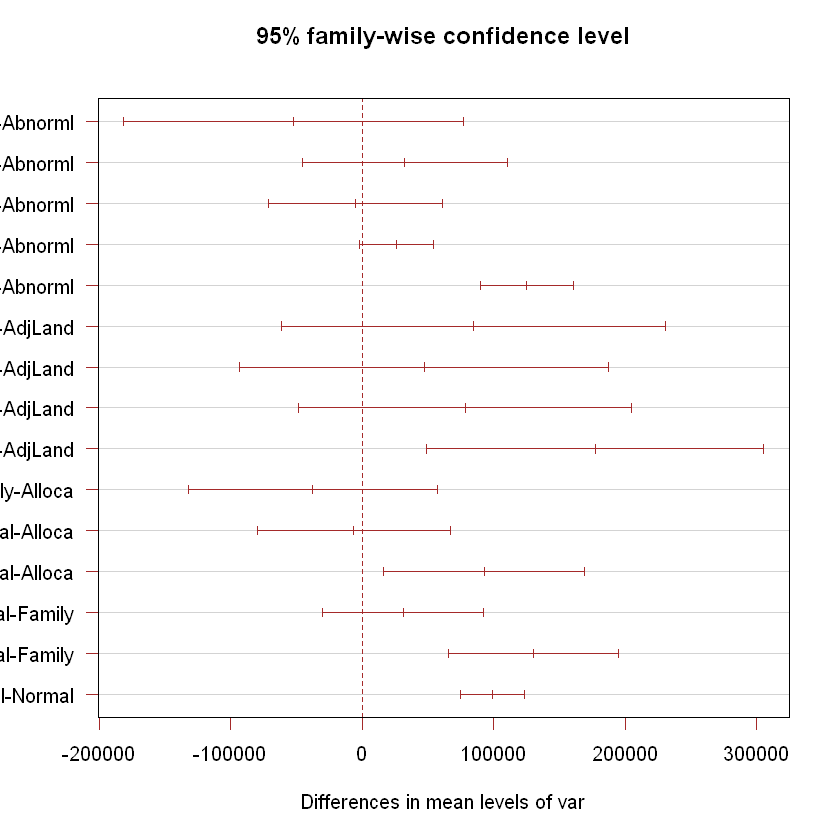

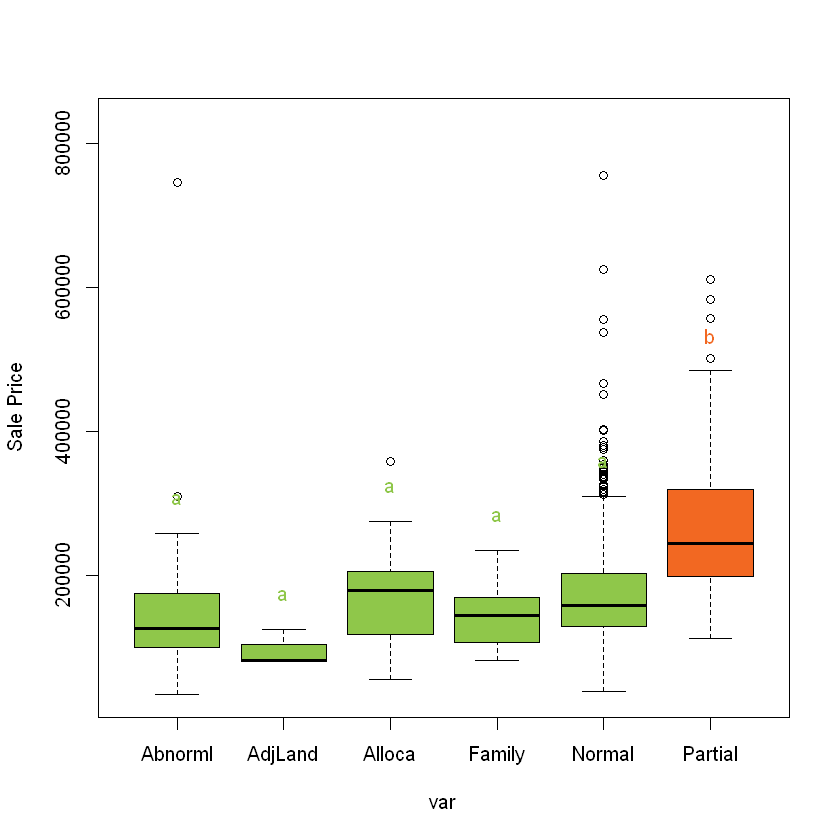

In [68]:
Tukeytest()

#### 4.Time Series Analysis
We will investigate whether there is a cyclicality in house prices

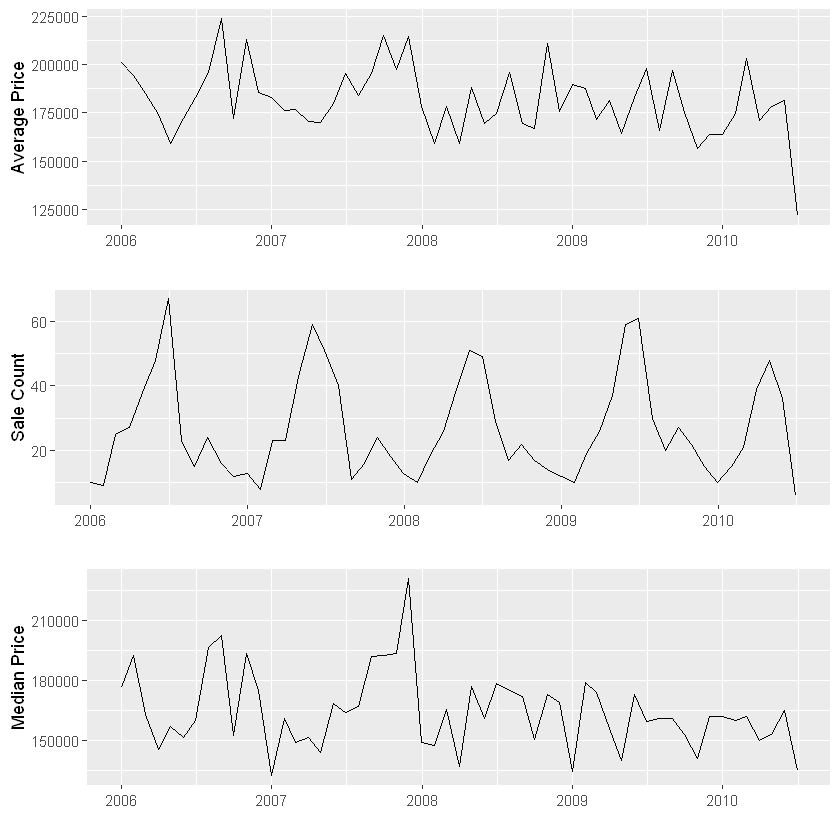

In [69]:
Train_factor$DateSold<-sub("(.{4})(-*)", "\\1-\\2", Train_factor$DateSold)
Train_factor$DateSold<-as.POSIXct(paste0(as.character(Train_factor$DateSold),"-01"), format = "%Y-%m-%d")
Time_Series<-aggregate(Train_factor$SalePrice,list(Time=(Train_factor$DateSold)),mean)
Time_Series_2<-aggregate(Train_factor$SalePrice,list(Time=(Train_factor$DateSold)),length)
Time_Series_3<-aggregate(Train_factor$SalePrice,list(Time=(Train_factor$DateSold)),median)
mean_time_plot<-ggplot(Time_Series, aes(as.Date(Time), x)) + geom_line()+scale_x_date()  + xlab("") + ylab("Average Price")
count_time_plot<-ggplot(Time_Series_2, aes(as.Date(Time), x)) + geom_line()+scale_x_date()  + xlab("") + ylab("Sale Count")
median_time_plot<-ggplot(Time_Series_3, aes(as.Date(Time), x)) + geom_line()+scale_x_date()  + xlab("") + ylab("Median Price")
par(mfrow=c(3,1))
grid.arrange(mean_time_plot, count_time_plot,median_time_plot, nrow=3, ncol=1)

Sharp decline in both number of sold houses and average prices in 2008 shows the crisis impact. We don't see a cyclicality in house prices but we do see an increase in number of sold houses in summer time.
#### 5.CORRELATION MATRIX FOR NUMERICAL VARIABLES

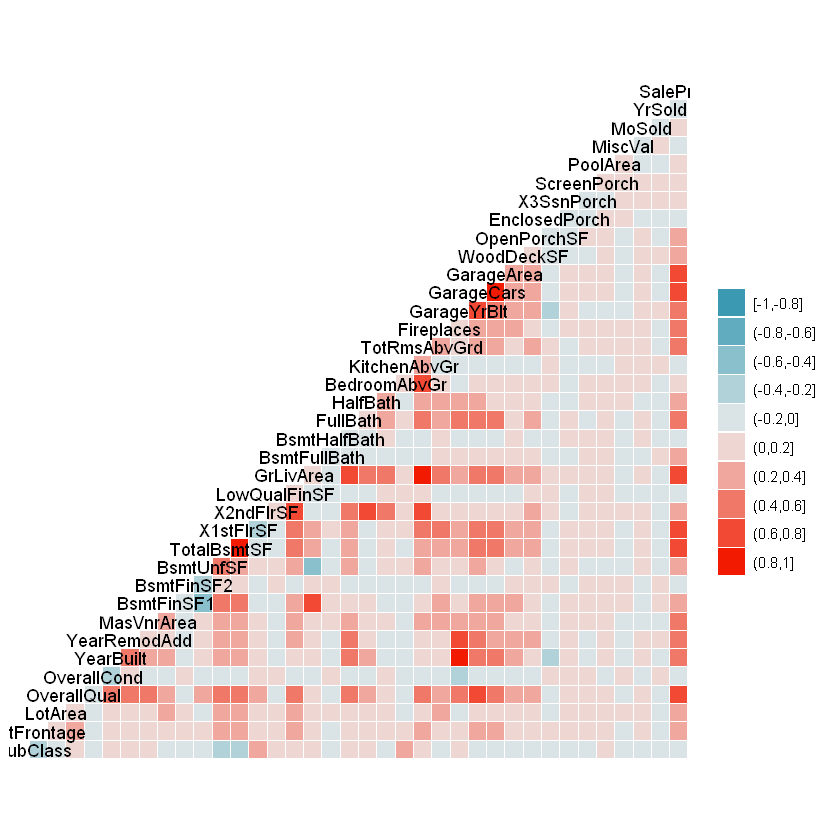

In [70]:
z<-ggcorr(Train_cont[, 2:ncol(Train_cont)],nbreaks = 10)
grid.arrange(z, nrow=1, ncol=1)
head_cor<-head(cor(Train_cont[, 2:ncol(Train_cont)])[,"SalePrice"], -1)
temp_names<-names(head_cor[lapply(head_cor,abs) >= 0.4])

plotscatter<-function(d,var,i){
p <- ggplot(data = d, aes(x = var, y = SalePrice)) +
  geom_point(aes(colour = Neighborhood, fill = Neighborhood)) +
  geom_smooth()+ xlab(colnames(Train_eliminated)[i+9])
return(p)}

#### 7. Variable Importance Algorithm: Boruta

In [73]:
Train_factor_2 <- Train_factor[, ! names(Train_factor) %in% c("Id","DateSold","SalePrice"), drop = F]
response<-Train_factor$SalePrice
Train_char<-lapply(Train_factor_2,as.character)
NA2MISSING <- function(x) replace(x, is.na(x),"MISSING")
Var_Imp_Data_cat<-(replace(Train_char, TRUE, lapply(Train_char, NA2MISSING)))
Var_Imp_Data_cat_test<-(replace(Test_char, TRUE, lapply(Test_char, NA2MISSING)))

Var_Imp_Data_fac<-lapply(Var_Imp_Data_cat,as.factor)
Var_Imp_Data_fac<-as.data.frame(Var_Imp_Data_fac)
Var_Imp_Data_fac_test<-lapply(Var_Imp_Data_cat_test,as.factor)
Var_Imp_Data_fac_test<-as.data.frame(Var_Imp_Data_fac_test)

bor.results <- Boruta(Var_Imp_Data_fac,response,
                      maxRuns=101,
                      doTrace=0)
dev.new(width=5, height=10)
plot(bor.results)

cat("\n\nRelevant Attributes:\n")
getSelectedAttributes(bor.results)

cat("\n\nAttribute Importance Details:\n")
options(width=125)
arrange(cbind(attr=rownames(attStats(bor.results)), attStats(bor.results)),desc(medianImp))
Bagging.fit <- Bagging.lasso(x=Train_eliminated[,1:22], y=Train_eliminated[, 23],
                             family=c("gaussian"), M=10,kfold=5,
                             predictor.importance=TRUE, trimmed=TRUE, weighted=TRUE, seed=2222)
# Print a 'bagging' object fitted by the Bagging.fit function.
Print.bagging(Bagging.fit)
Plot.importance(Bagging.fit)



Relevant Attributes:


[1] "MSZoning"      "Alley"         "LotShape"      "LandContour"  
 [5] "LandSlope"     "Neighborhood"  "BldgType"      "HouseStyle"   
 [9] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[13] "MasVnrType"    "ExterQual"     "ExterCond"     "Foundation"   
[17] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[21] "BsmtFinType2"  "HeatingQC"     "CentralAir"    "Electrical"   
[25] "KitchenQual"   "FireplaceQu"   "GarageType"    "GarageFinish" 
[29] "GarageQual"    "GarageCond"    "PavedDrive"    "Fence"        
[33] "SaleCondition"



Attribute Importance Details:


attr,meanImp,medianImp,minImp,maxImp,normHits,decision
Neighborhood,23.95,24.02,19.565,28.30,1.00,Confirmed
ExterQual,21.02,21.05,18.736,23.16,1.00,Confirmed
KitchenQual,20.51,20.63,17.254,22.36,1.00,Confirmed
GarageType,18.99,18.95,17.325,20.41,1.00,Confirmed
BldgType,17.44,17.53,14.014,19.67,1.00,Confirmed
MSZoning,16.80,16.91,14.339,19.38,1.00,Confirmed
FireplaceQu,16.53,16.62,14.312,18.62,1.00,Confirmed
BsmtQual,16.48,16.55,12.926,18.86,1.00,Confirmed
Foundation,14.92,14.93,13.098,16.52,1.00,Confirmed
GarageFinish,13.99,14.00,9.692,16.41,1.00,Confirmed


ERROR: Error in Bagging.lasso(x = Train_eliminated[, 1:22], y = Train_eliminated[, : "Bagging.lasso" fonksiyonu bulunamadı


Based on Boruta and Correlation Analysis, we decided to use following parameters.

In [148]:
Train_eliminated<-cbind(Var_Imp_Data_fac[,names(Var_Imp_Data_fac) %in% 
c("Neighborhood","ExterQual","KitchenQual","GarageType","BldgType","BsmtQual",
                                          "Foundation","FireplaceQu"),drop= F],

Train_cont[, names(Train_cont) %in% c("OverallQual",
                            "YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","X1stFlrSF","GrLivArea",
                            "FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","SalePrice"),drop= F])

Test_eliminated<-cbind(Var_Imp_Data_fac_test[,names(Var_Imp_Data_fac_test) %in% 
                                           c("Neighborhood","ExterQual","KitchenQual","GarageType","BldgType","BsmtQual",
                                             "Foundation","FireplaceQu"),drop= F],
                        
                        Test[, names(Test) %in% c("OverallQual",
                                                              "YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","X1stFlrSF","GrLivArea",
                                                              "FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","SalePrice"),drop= F])
names(Train_eliminated)

[1] "Neighborhood" "BldgType"     "ExterQual"    "Foundation"   "BsmtQual"     "KitchenQual"  "FireplaceQu"  "GarageType"  
 [9] "OverallQual"  "YearBuilt"    "YearRemodAdd" "MasVnrArea"   "TotalBsmtSF"  "X1stFlrSF"    "GrLivArea"    "FullBath"    
[17] "TotRmsAbvGrd" "Fireplaces"   "GarageYrBlt"  "GarageCars"   "GarageArea"   "SalePrice"

Let's also check for outliers and get rid of them if possible!

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."

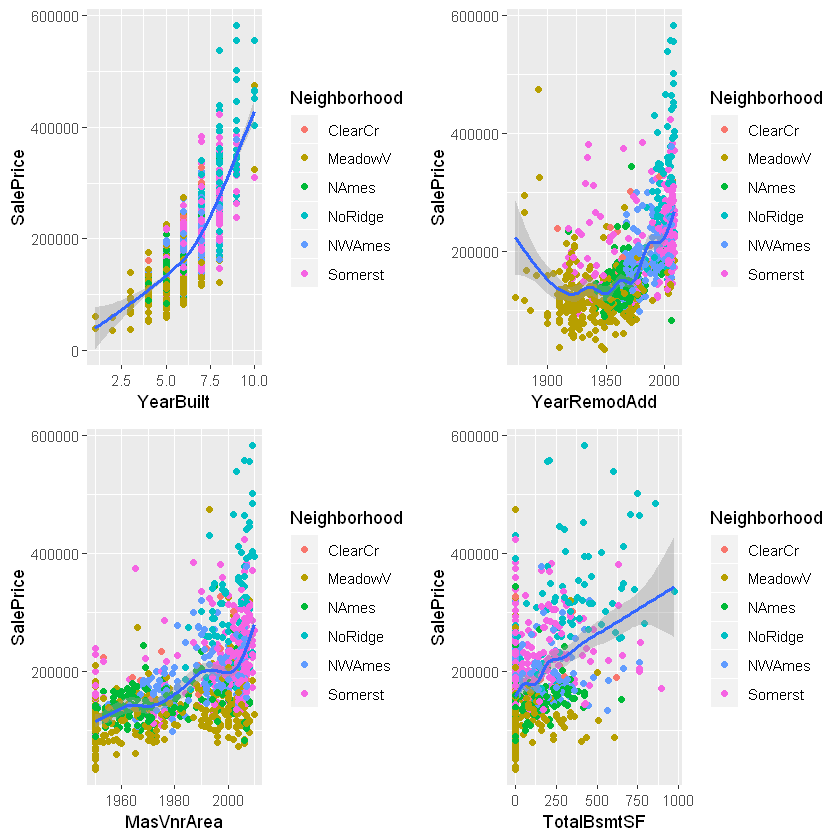

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."

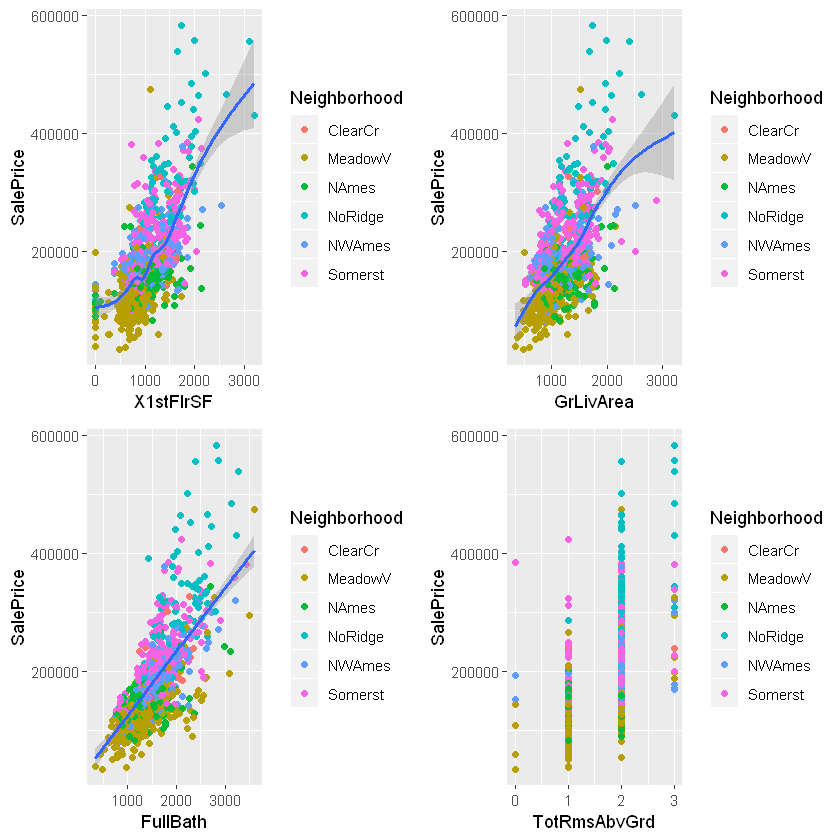

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


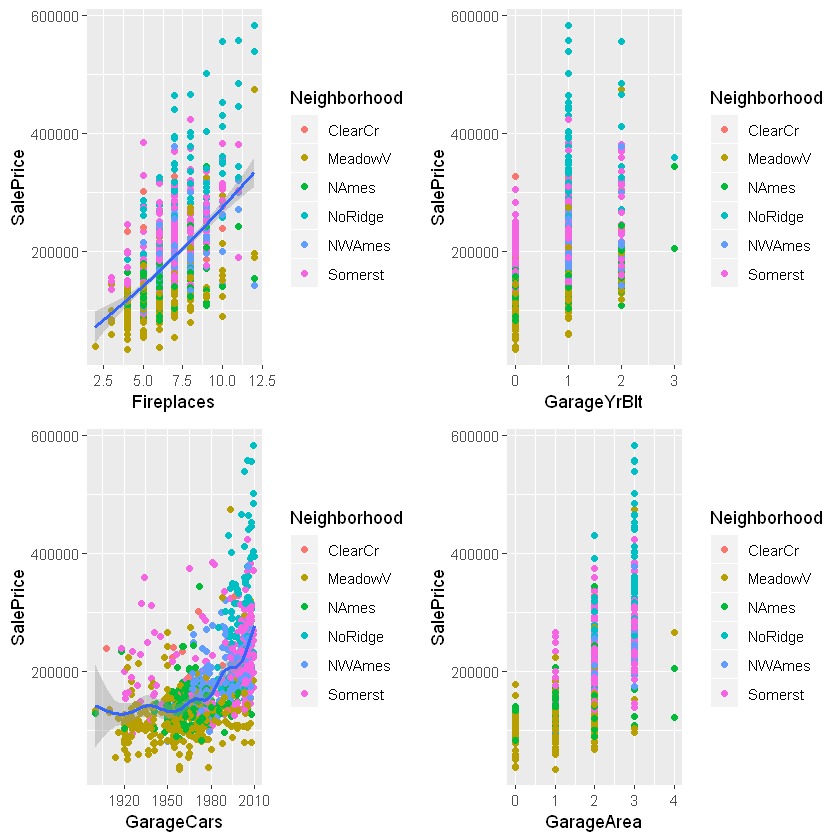

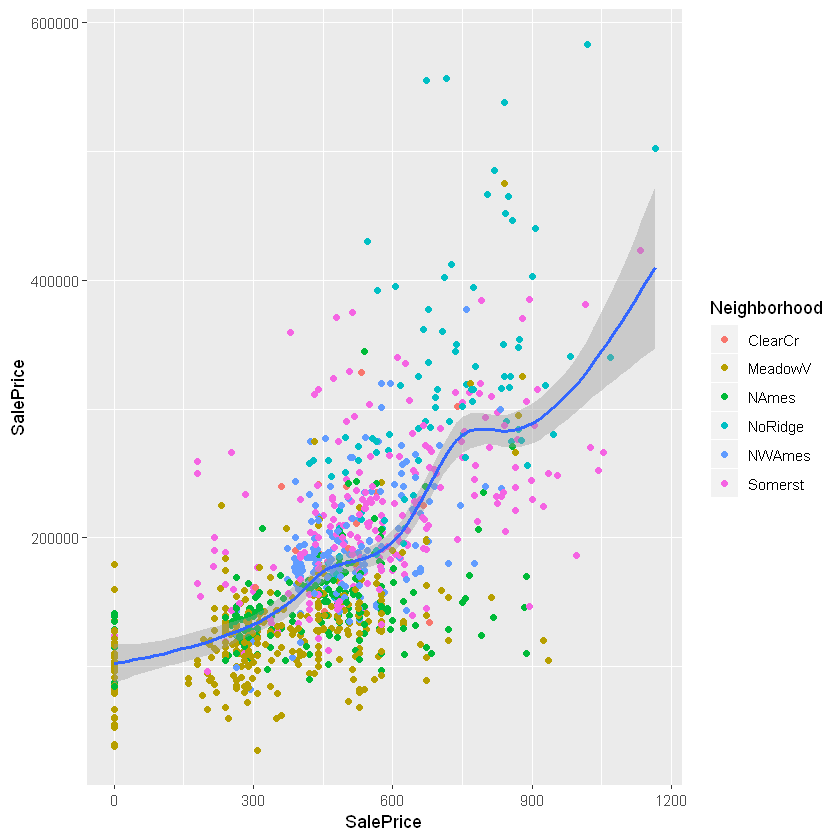

In [149]:
grid.arrange(
  plotscatter(Train,Train$OverallQual,1),
  plotscatter(Train,Train$YearBuilt,2),
  plotscatter(Train,Train$YearRemodAdd,3),
  plotscatter(Train,Train$MasVnrArea,4),nrow = 2, ncol=2)
grid.arrange(
  plotscatter(Train,Train$TotalBsmtSF,5),
  plotscatter(Train,Train$X1stFlrSF,6),
  plotscatter(Train,Train$GrLivArea,7),
  plotscatter(Train,Train$FullBath,8),nrow = 2, ncol=2)
grid.arrange(
  plotscatter(Train,Train$TotRmsAbvGrd,9),
  plotscatter(Train,Train$Fireplaces,10),
  plotscatter(Train,Train$GarageYrBlt,11),
  plotscatter(Train,Train$GarageCars,12),nrow = 2, ncol=2)
plotscatter(Train,Train$GarageArea,13)

Train_eliminated<-Train_eliminated[Train_eliminated$GrLivArea<=4000,]
Train_eliminated<-Train_eliminated[Train_eliminated$TotRmsAbvGrd<=12,]
Train_eliminated<-Train_eliminated[Train_eliminated$GarageArea<=1200,]
Train_eliminated<-Train_eliminated[Train_eliminated$MasVnrArea<=1000,]

After getting rid of the outliers

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."

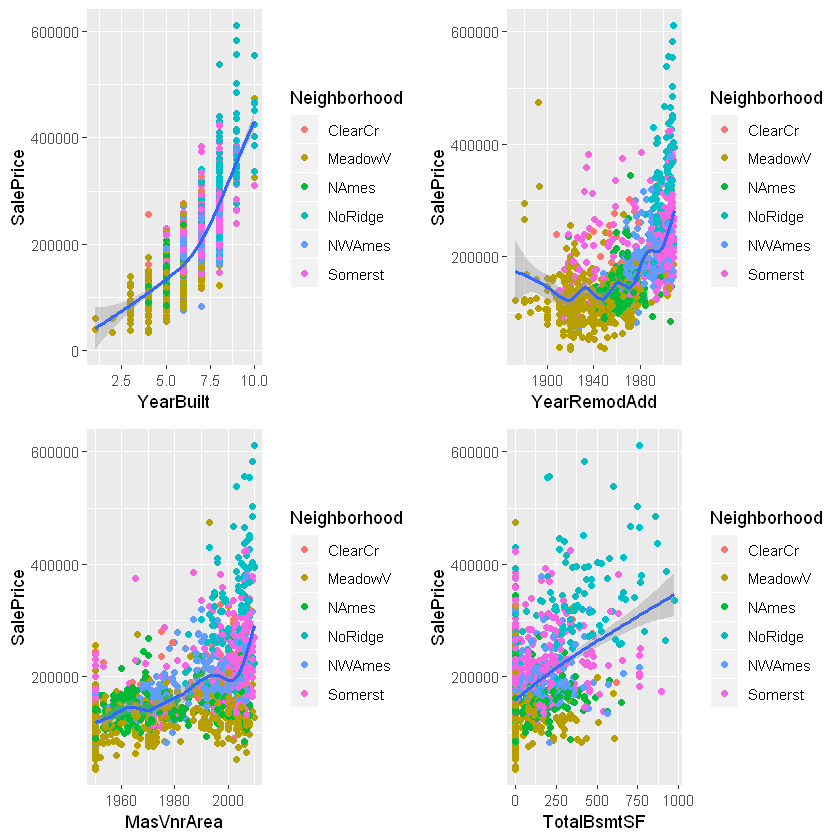

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."

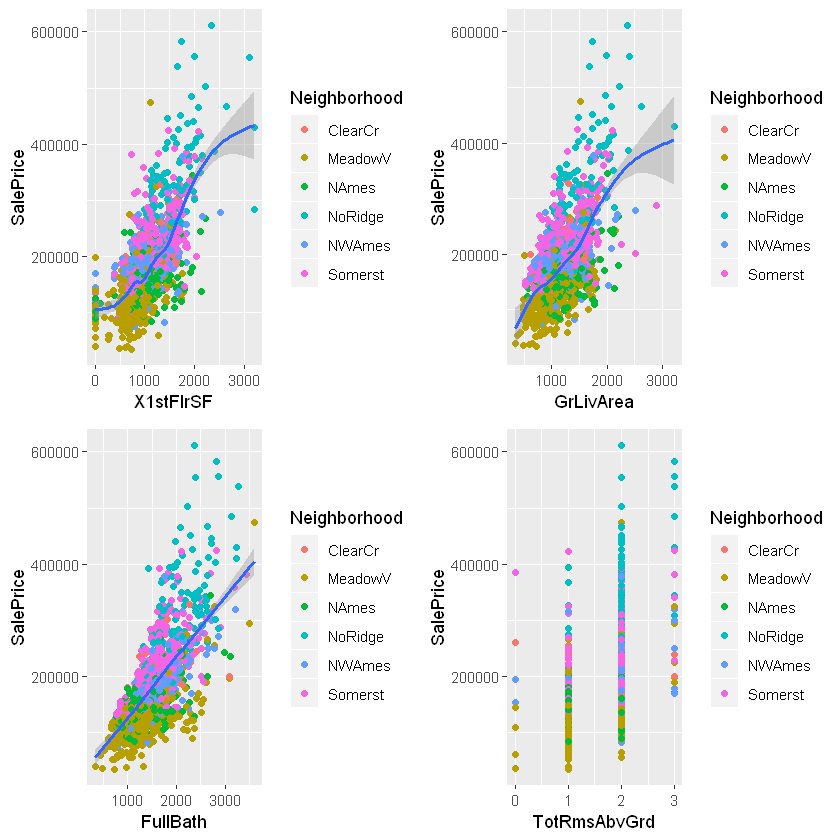

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


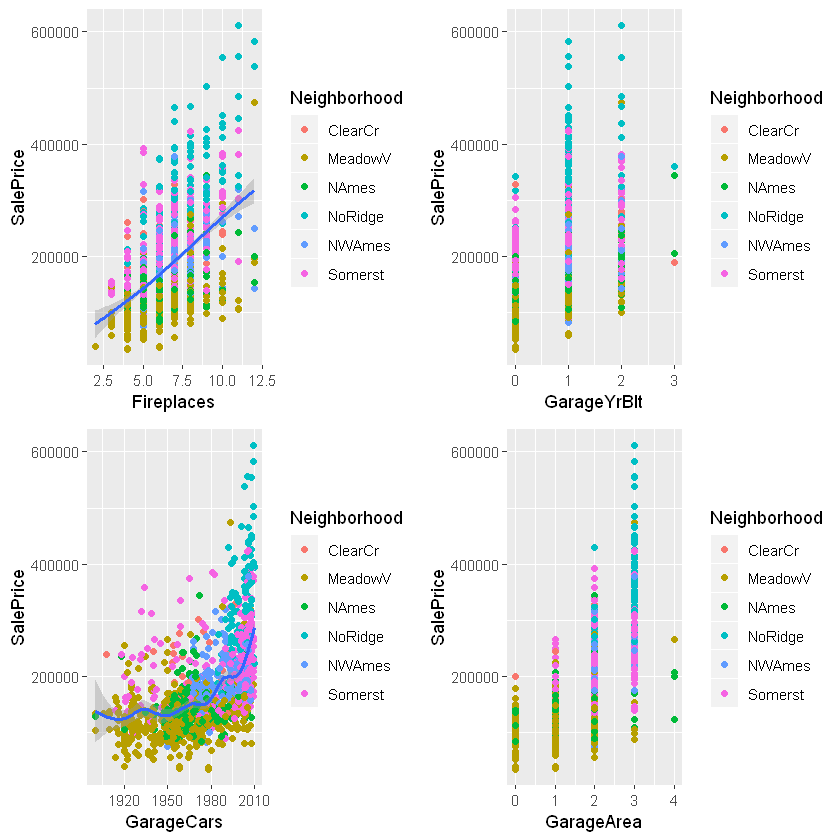

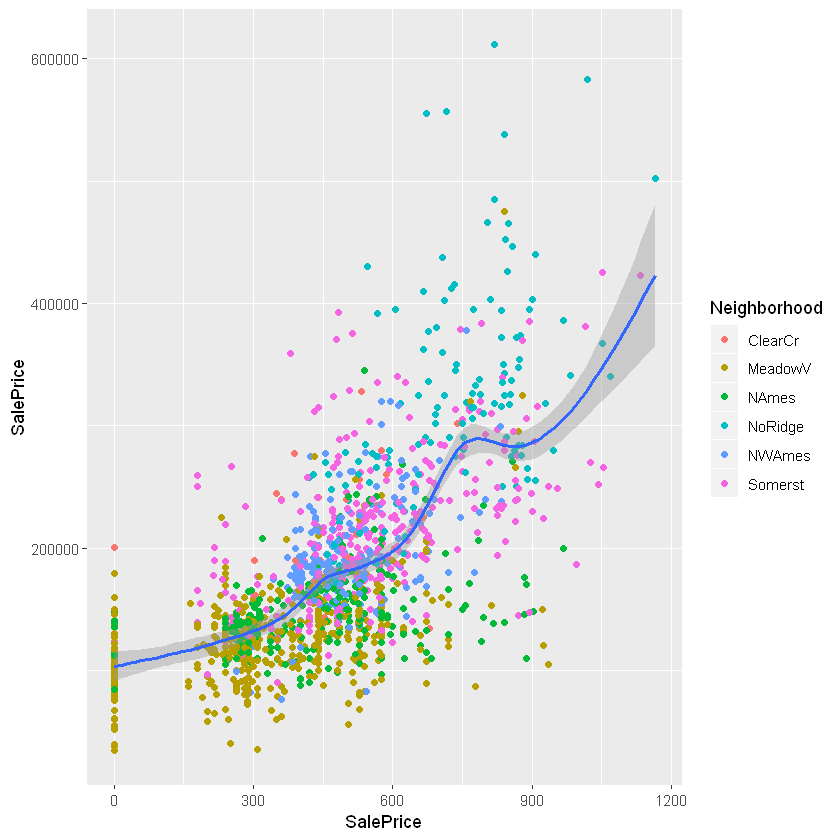

In [150]:
grid.arrange(
  plotscatter(Train_eliminated,Train_eliminated$OverallQual,1),
  plotscatter(Train_eliminated,Train_eliminated$YearBuilt,2),
  plotscatter(Train_eliminated,Train_eliminated$YearRemodAdd,3),
  plotscatter(Train_eliminated,Train_eliminated$MasVnrArea,4),nrow = 2, ncol=2)
grid.arrange(
  plotscatter(Train_eliminated,Train_eliminated$TotalBsmtSF,5),
  plotscatter(Train_eliminated,Train_eliminated$X1stFlrSF,6),
  plotscatter(Train_eliminated,Train_eliminated$GrLivArea,7),
  plotscatter(Train_eliminated,Train_eliminated$FullBath,8),nrow = 2, ncol=2)
grid.arrange(
  plotscatter(Train_eliminated,Train_eliminated$TotRmsAbvGrd,9),
  plotscatter(Train_eliminated,Train_eliminated$Fireplaces,10),
  plotscatter(Train_eliminated,Train_eliminated$GarageYrBlt,11),
  plotscatter(Train_eliminated,Train_eliminated$GarageCars,12),nrow = 2, ncol=2)
plotscatter(Train_eliminated,Train_eliminated$GarageArea,13)

#### 8. Train the model and evaluate the results

In [165]:
inTrain<-createDataPartition(y=Train_eliminated$SalePrice,p=0.7, list=FALSE)
Train<-Train_eliminated[inTrain,]
Validation<-Train_eliminated[-inTrain,] 
length_divisor<-10
iterations<-1000

x_train <- model.matrix( ~ .-1, Train)
x_val <- model.matrix( ~ .-1, Validation)
SalePrice <- x_train[,ncol(x_train)]

In [167]:
rf_fit<-randomForest(SalePrice~.,data=x_train,ntree=100)
rf_predictions_val<-predict(rf_fit,newdata=x_val)
rf_predictions_test<-predict(rf_fit,newdata=x_Test)
error_rf_val<-sqrt((sum((x_val[,ncol(x_val)]-rf_predictions_val)^2))/nrow(x_val))

##### Support Vector Machines

In [168]:
predictions_svm<-foreach(m=1:iterations,.combine=cbind) %do% {
    training_positions <- sample(nrow(x_train), size=floor((nrow(x_train)/length_divisor)))
    train_pos<-1:nrow(x_train) %in% training_positions
    svm_fit<-svm(SalePrice~.,data=x_train[train_pos,])
    predict(svm_fit,newdata=x_val)
  }
svm2_predictions<-rowMeans(predictions_svm)
error_svm_val<-sqrt((sum((Validation$SalePrice-svm2_predictions)^2))/nrow(Validation))

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'FoundationStone' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'NeighborhoodClearCr' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'GarageTypeBasment' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'FoundationStone' and 'FireplaceQuPo' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'FireplaceQuPo' and 'GarageTypeBasment' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'NeighborhoodClearCr' and 'FoundationStone' constant. Cannot scale data."Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):

##### Extreme Gradient Boosting

In [200]:
dtrain <- xgb.DMatrix(data = x_train[,1:ncol(x_train)-1], label = x_train[,ncol(x_train)])
xgboost_fit<-xgboost(data = dtrain, booster = "gblinear",
                     objective = "reg:linear" , max.depth = 100, eta = 0.4, nthread = 30, nround = 3000, verbose = 0)
pred_xgboost <- predict(xgboost_fit, x_val[,1:ncol(x_val)-1])
error_xgboost_val<-sqrt((sum((Validation$SalePrice-pred_xgboost)^2))/nrow(Validation))

In [201]:
cbind(error_rf_val,error_svm_val,error_xgboost_val)

error_rf_val,error_svm_val,error_xgboost_val
26906,67771,26778


According to results extreme gradient boosting is the best model. Let's see if we can improve this with a combination of xgboost and random forest models

In [205]:
predictions_ensemble_final<-(rf_predictions_val*8.18+1.82*pred_xgboost)/10
error_final_ensemble<-sqrt((sum((Validation$SalePrice-predictions_ensemble_final)^2))/nrow(Validation))

In [206]:
error_final_ensemble

[1] 26286

As seen, ensemble one is slightly better than both models, so we created a synergy out of two models.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


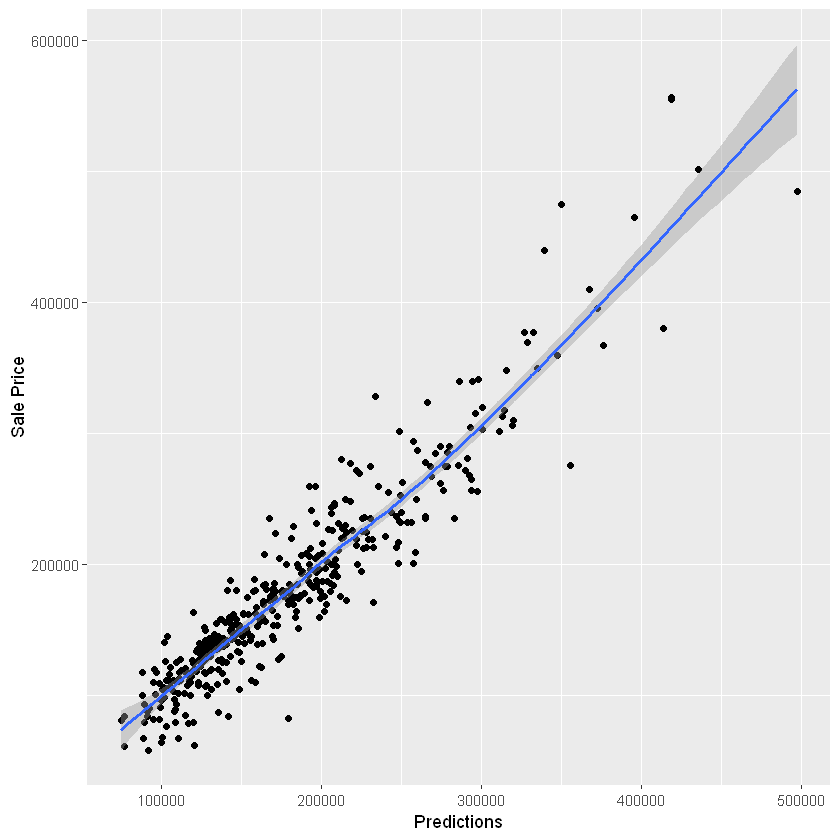

In [207]:
val.results<-as.data.frame(cbind(predictions_ensemble_final,x_val[,ncol(x_val)]))
colnames(val.results)<-c("Predictions","SalePrice")
ggplot(data = val.results, aes(x = Predictions, y = SalePrice)) +
geom_point() +
geom_smooth()+ xlab("Predictions")+ylab("Sale Price")

In [208]:
getwd()

[1] "C:/Users/Engin/Documents"